In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#dataset1

In [4]:
car_specs = pd.read_csv("Car Dataset 1945-2020.csv",low_memory=False)

In [5]:
print(car_specs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id_trim                                   70823 non-null  int64  
 1   Make                                      70823 non-null  object 
 2   Modle                                     70823 non-null  object 
 3   Generation                                70819 non-null  object 
 4   Year_from                                 70586 non-null  float64
 5   Year_to                                   70189 non-null  float64
 6   Series                                    70823 non-null  object 
 7   Trim                                      70823 non-null  object 
 8   Body_type                                 52252 non-null  object 
 9   load_height_mm                            3363 non-null   object 
 10  number_of_seats                   

In [6]:
print(car_specs.describe())

            id_trim    Year_from       Year_to    payload_kg  \
count  70823.000000  70586.00000  70189.000000  23799.000000   
mean   35477.818788   1997.06524   1913.441978    605.546199   
std    20494.213522     14.99201    415.392957    320.441908   
min        1.000000   1904.00000      0.000000    145.000000   
25%    17724.500000   1988.00000   1994.000000    465.000000   
50%    35453.000000   2000.00000   2005.000000    530.000000   
75%    53240.500000   2008.00000   2013.000000    615.000000   
max    70987.000000   2020.00000   2020.000000   3334.000000   

       back_track_width_mm  front_track_width_mm  full_weight_kg  \
count         11198.000000          11204.000000    39682.000000   
mean           1477.303179           1482.623527     2067.129127   
std              96.061918             92.701493      619.628212   
min            1050.000000           1105.000000      690.000000   
25%            1425.000000           1430.000000     1680.000000   
50%            

In [7]:
MaxThresholdtoRemove = len(car_specs) * 0.5
car_specs = car_specs.dropna(thresh=MaxThresholdtoRemove, axis=1)

In [8]:
car_specs = car_specs.drop_duplicates()

In [9]:
ColumnsToConvert = [
    'number_of_seats',
    'length_mm',
    'width_mm',
    'height_mm',
    'wheelbase_mm',
    'front_track_mm',
    'rear_track_mm',
    'curb_weight_kg',
    'ground_clearance_mm',
    'full_weight_kg',
    'max_trunk_capacity_l',
    'maximum_torque_n_m',
    'turnover_of_maximum_torque_rpm',
    'capacity_cm3',
    'engine_hp_rpm',
    'fuel_tank_capacity_l',
    'max_speed_km_per_h',
    'fuel_grade',
    'minimum_trunk_capacity_l',
    'number_of_cylinders',
    'valves_per_cylinder',
    'cylinder_bore_mm',
    'stroke_cycle_mm',
    'number_of_gears',
    'turning_circle_m',
    'mixed_fuel_consumption_per_100_km_l',
    'acceleration_0_100_km/h_s',
    'city_fuel_per_100km_l',
    'highway_fuel_per_100km_l'
]
for col in ColumnsToConvert:
    car_specs[col] = pd.to_numeric(car_specs[col], errors='coerce')

In [10]:
print("Missing Values in Car Specs:\n", car_specs.isnull().sum(), "\n")

Missing Values in Car Specs:
 id_trim                                    0
Make                                       0
Modle                                      0
Generation                                 4
Year_from                                237
Year_to                                  634
Series                                     0
Trim                                       0
Body_type                              18571
number_of_seats                         7805
length_mm                               6168
width_mm                                6201
height_mm                               6227
wheelbase_mm                            6244
front_track_mm                         21443
rear_track_mm                          21394
curb_weight_kg                         17326
ground_clearance_mm                    31438
full_weight_kg                         31141
max_trunk_capacity_l                   28097
minimum_trunk_capacity_l               24870
maximum_torque_n_m       

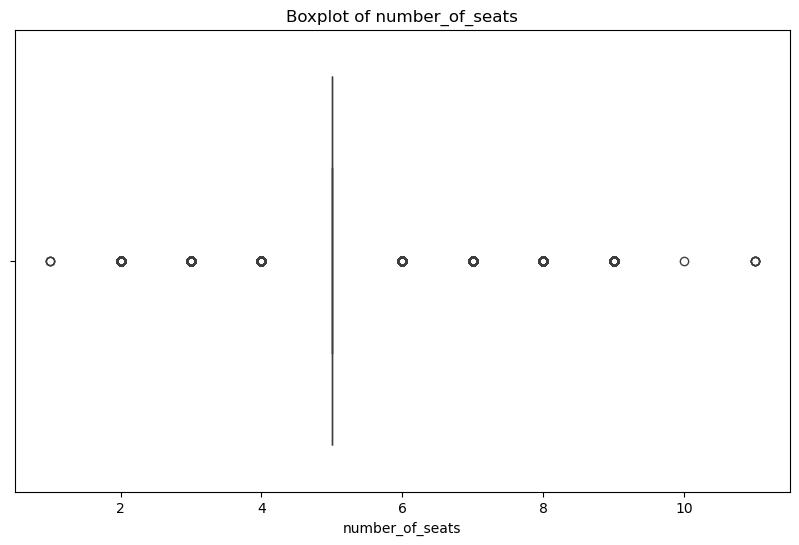

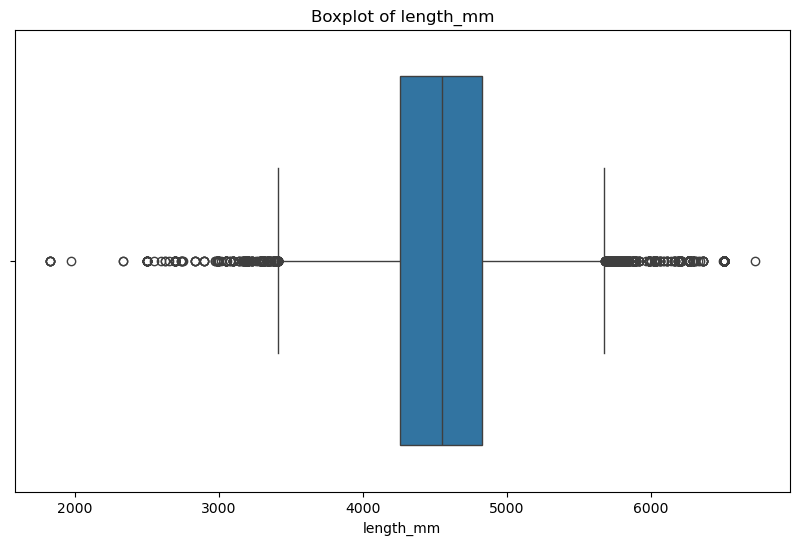

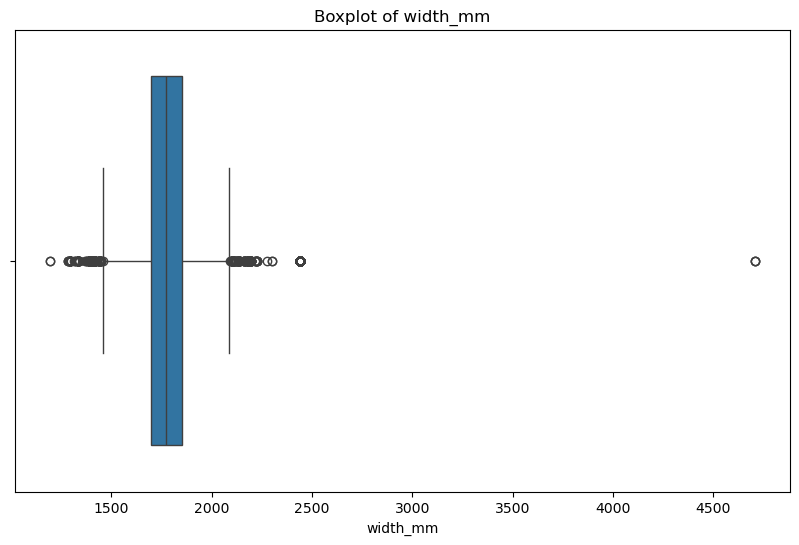

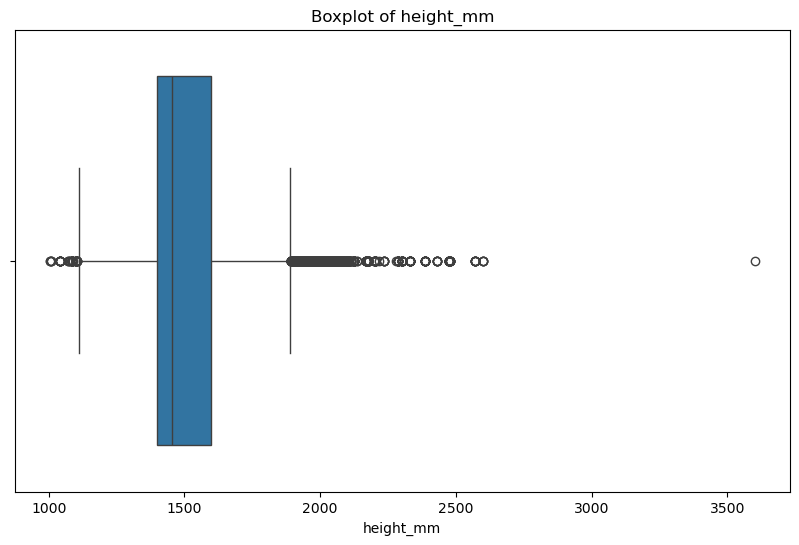

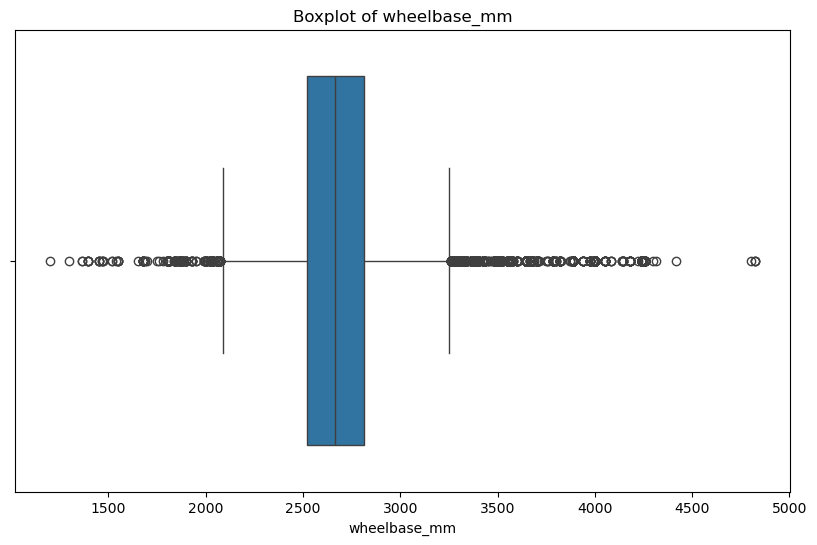

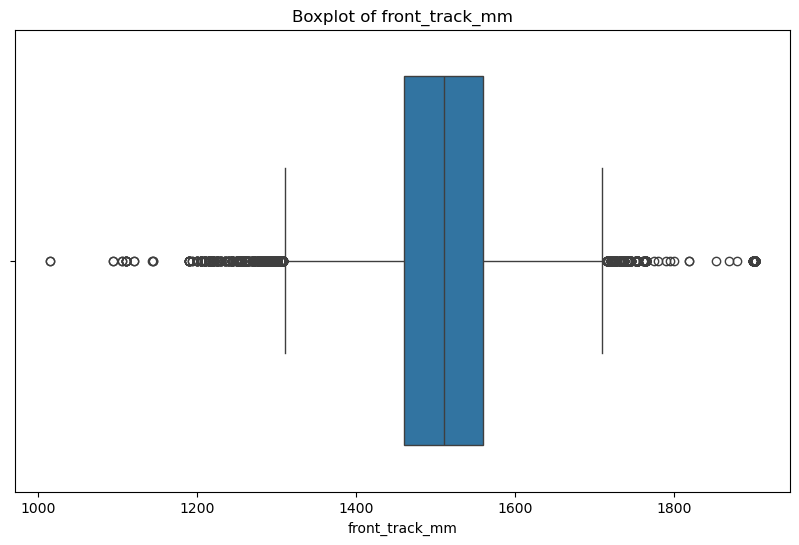

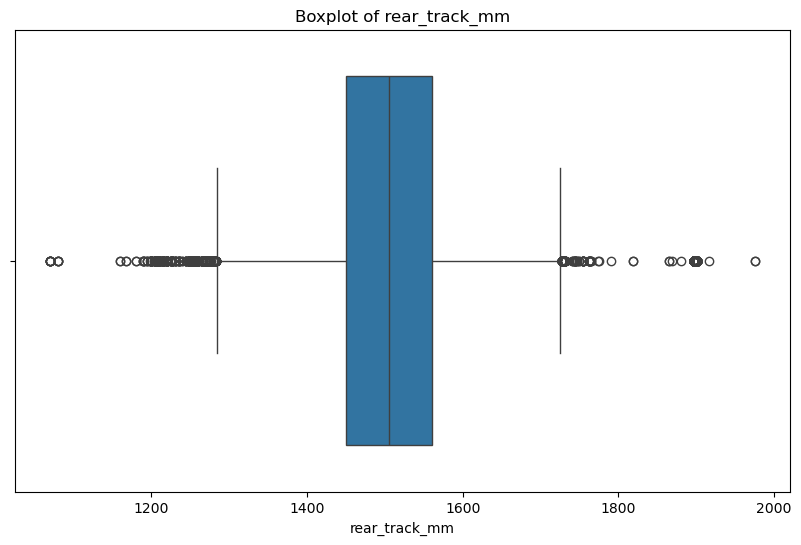

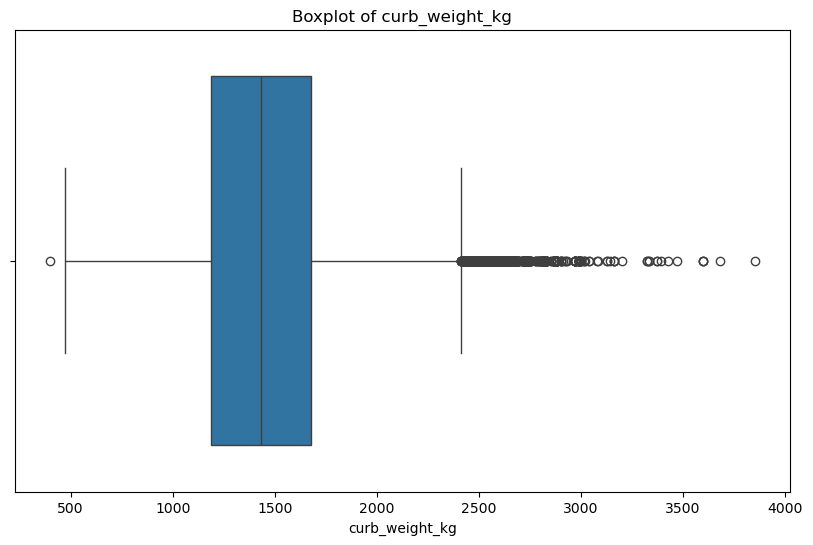

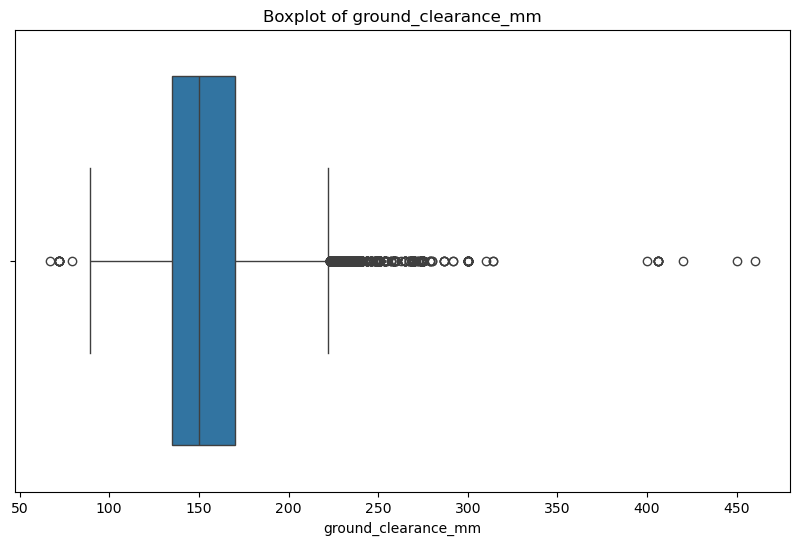

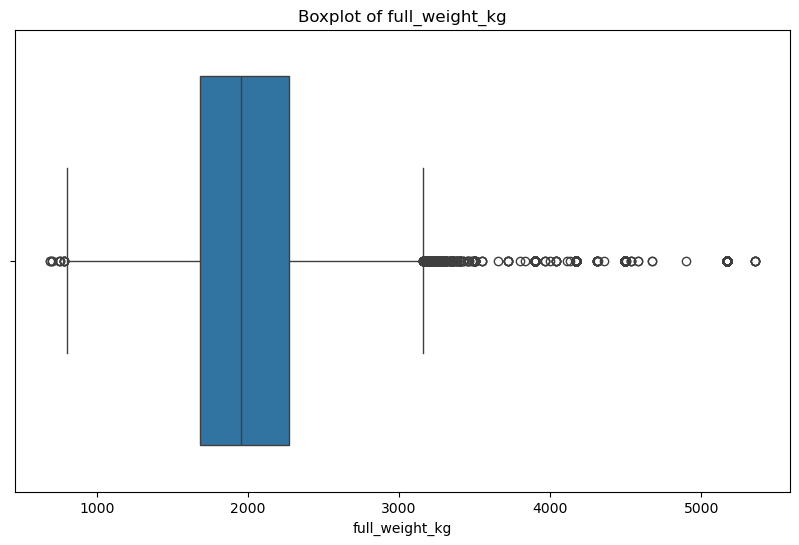

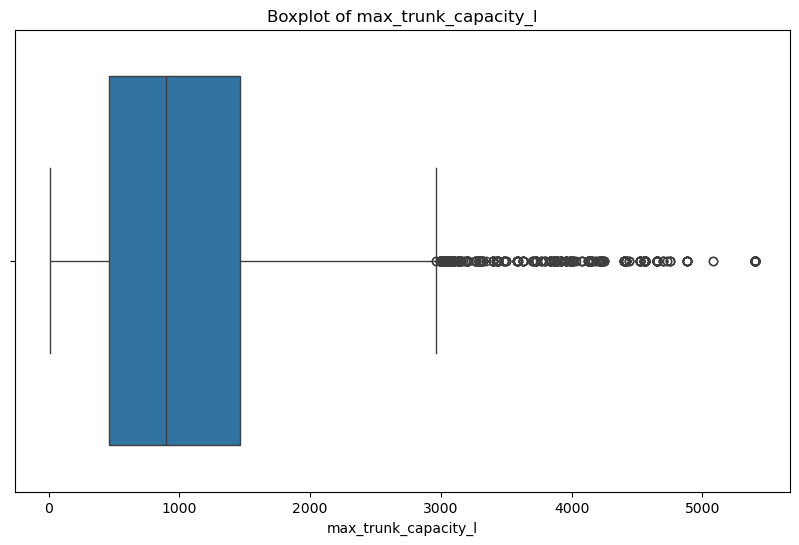

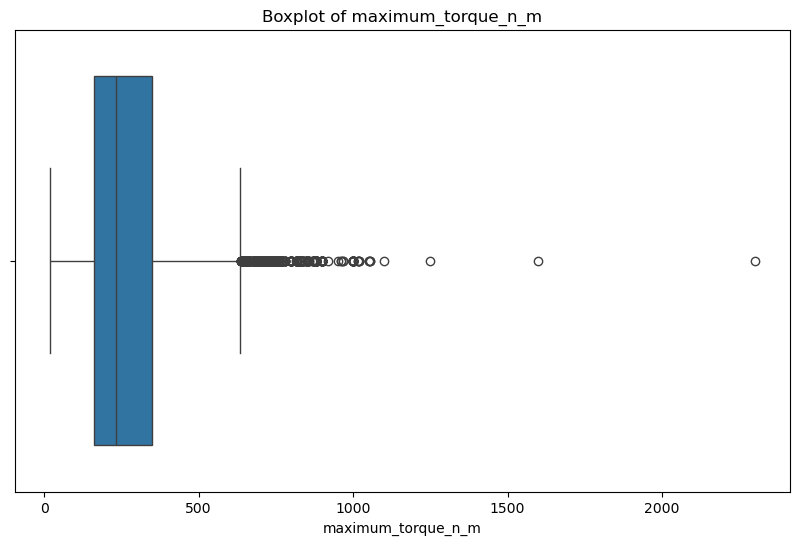

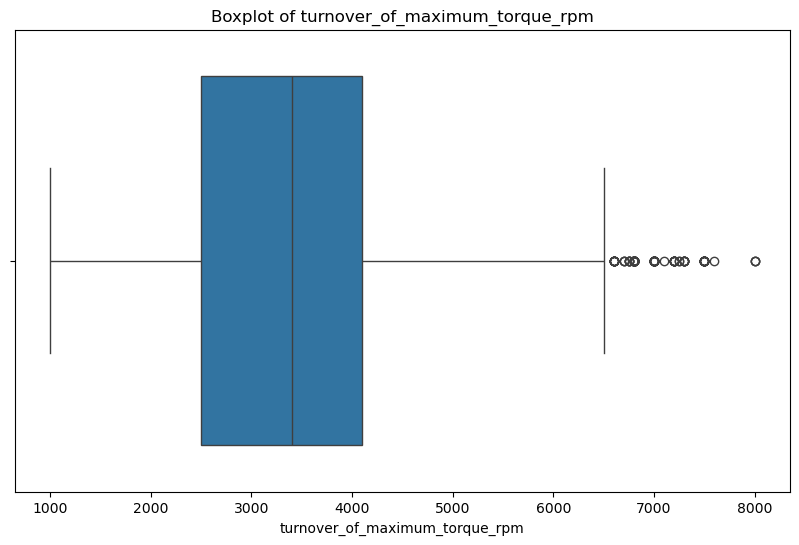

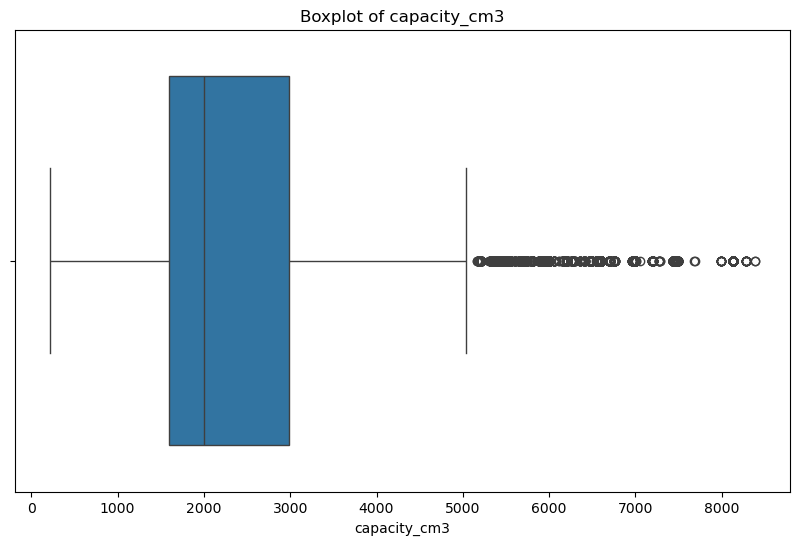

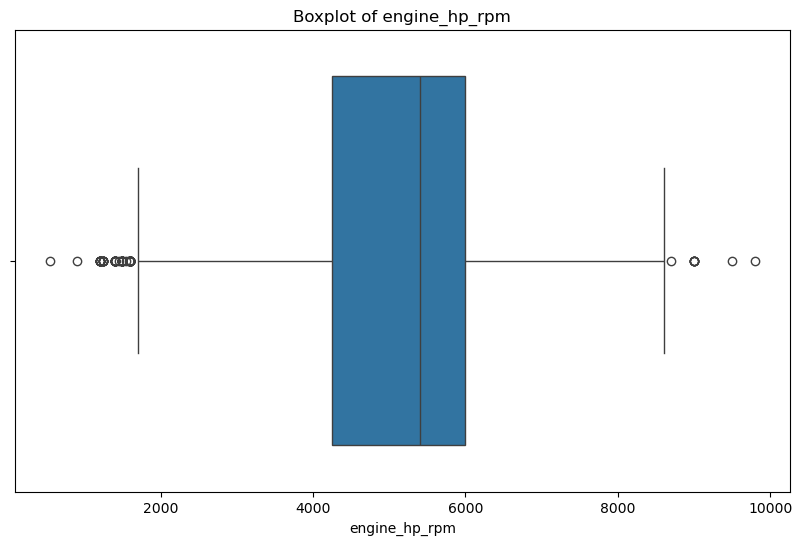

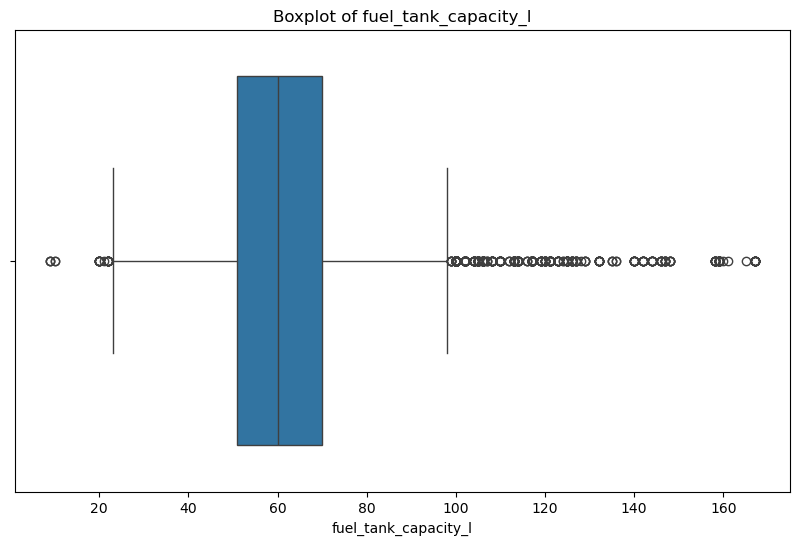

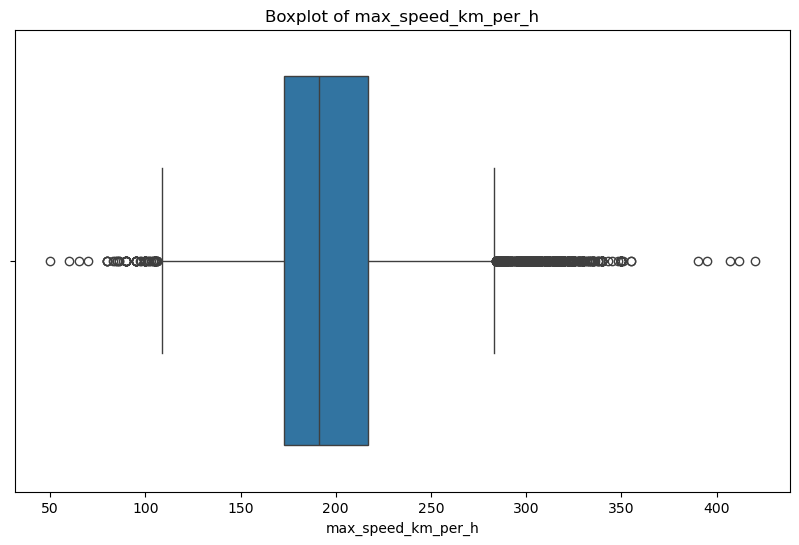

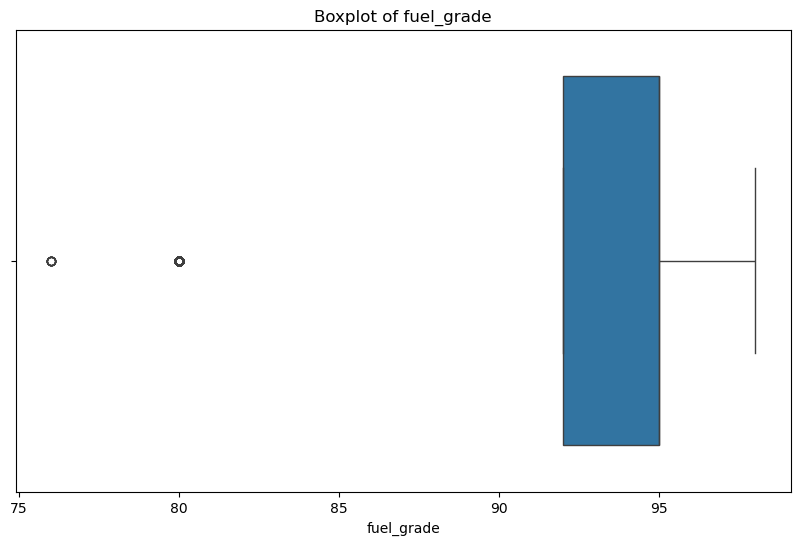

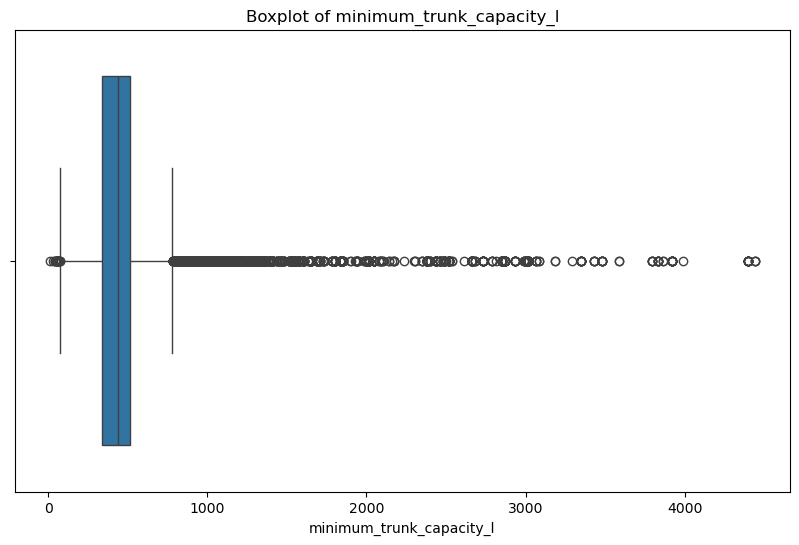

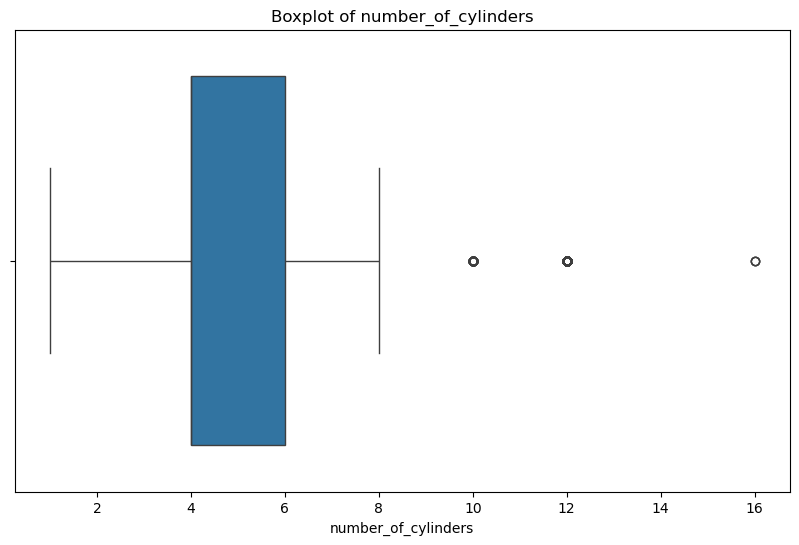

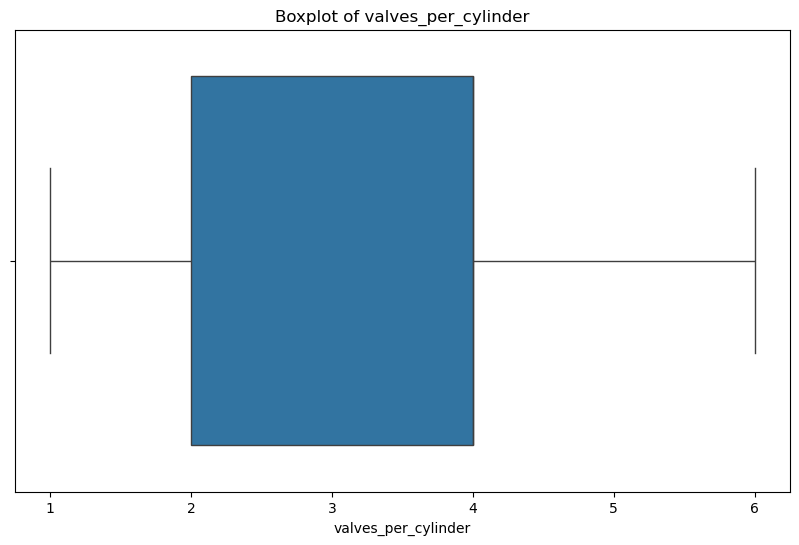

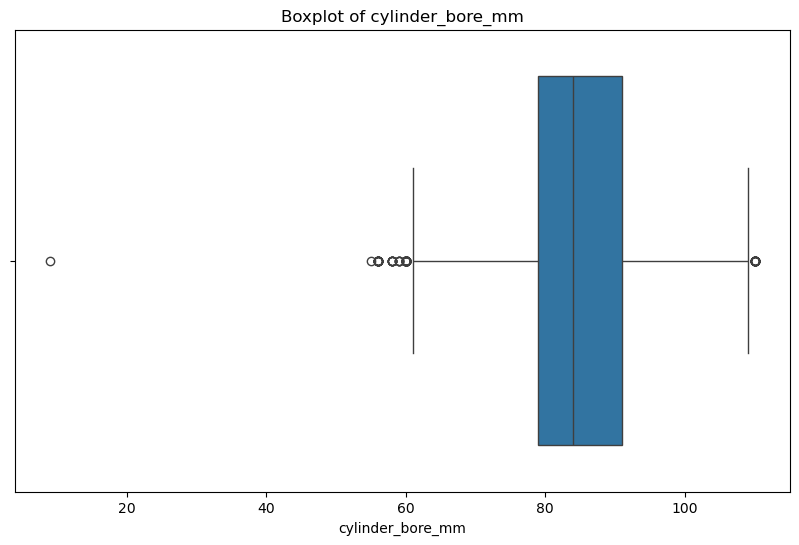

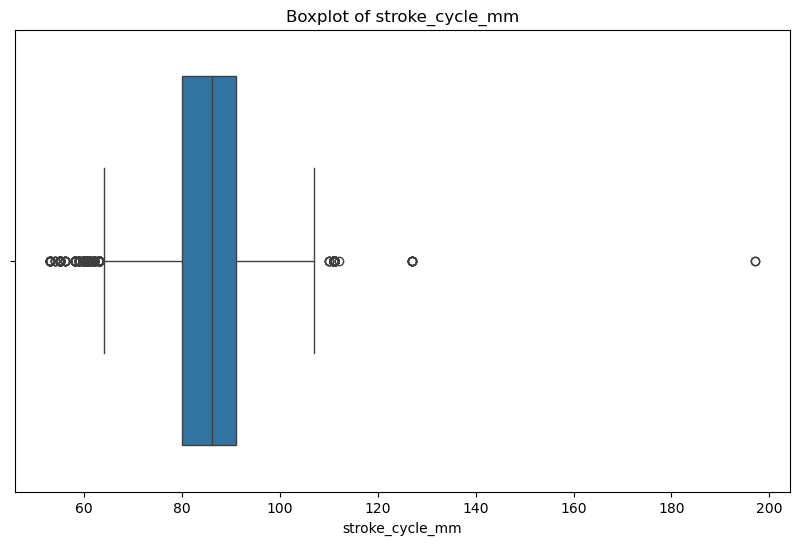

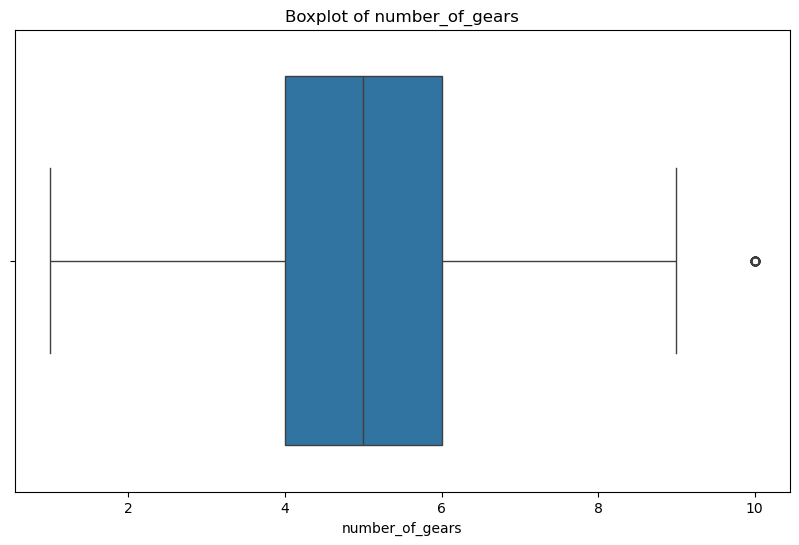

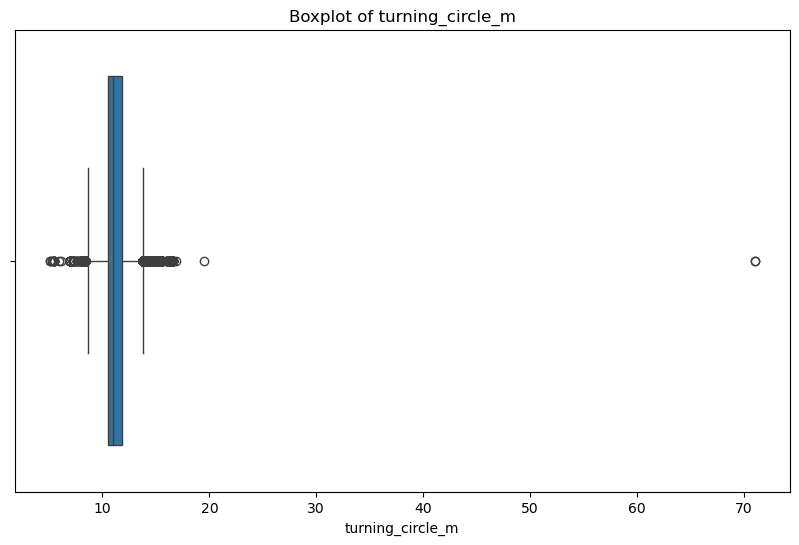

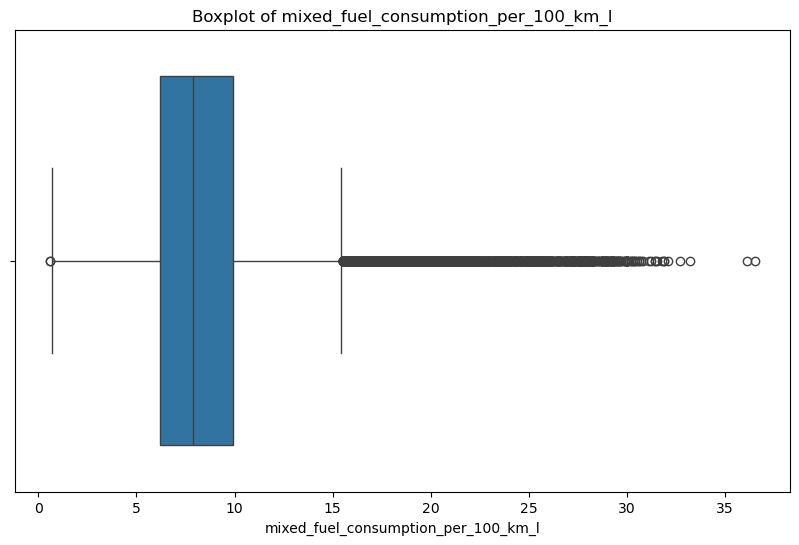

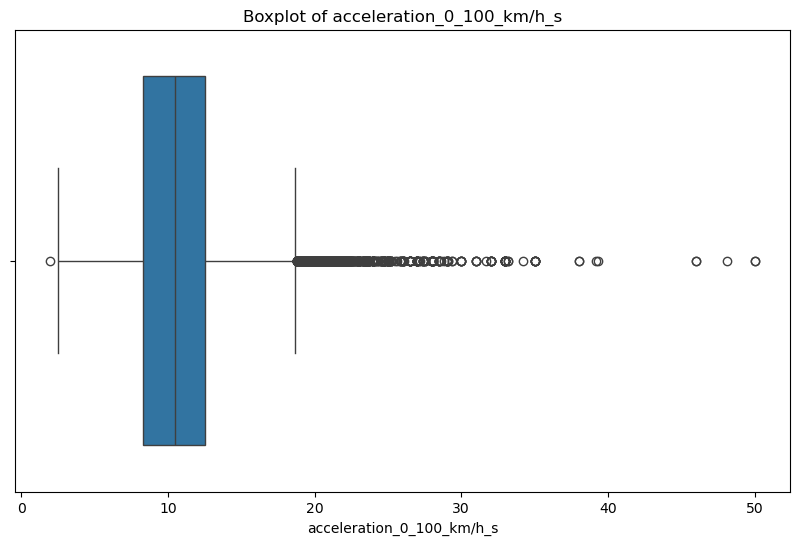

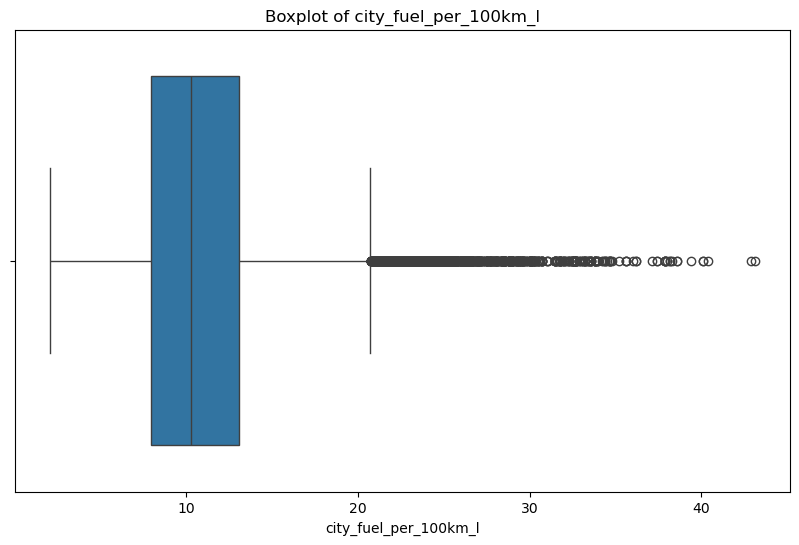

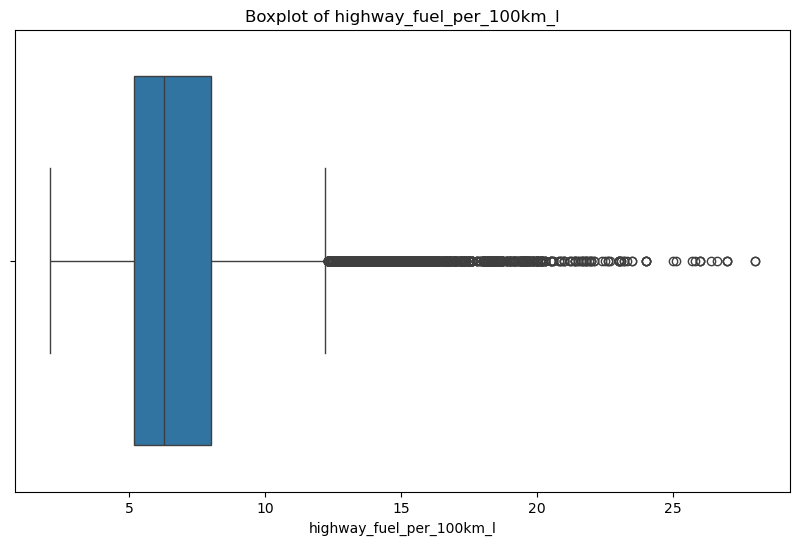

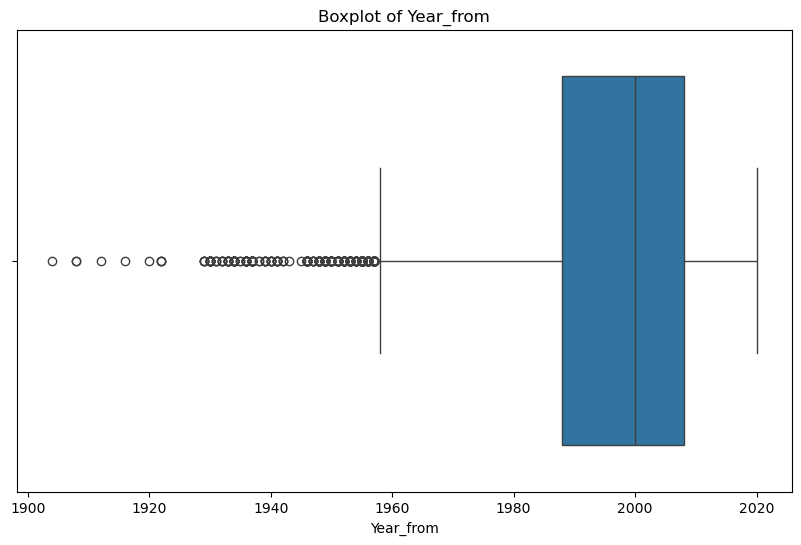

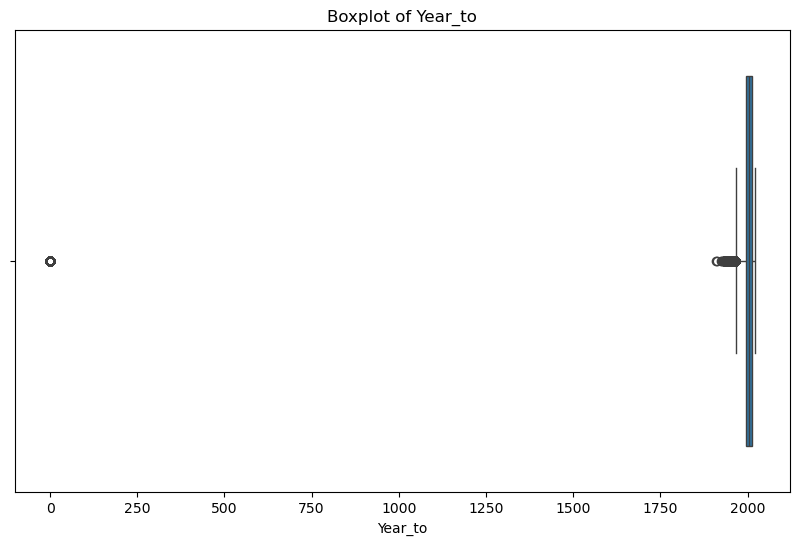

In [11]:

ColumnsToBoxPlots = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm',
    'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 'full_weight_kg', 'max_trunk_capacity_l',
    'maximum_torque_n_m', 'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm',
    'fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade', 'minimum_trunk_capacity_l',
    'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 'stroke_cycle_mm', 'number_of_gears',
    'turning_circle_m', 'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s',
    'city_fuel_per_100km_l', 'highway_fuel_per_100km_l', 'Year_from', 'Year_to']



for col in ColumnsToBoxPlots:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=car_specs, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()  


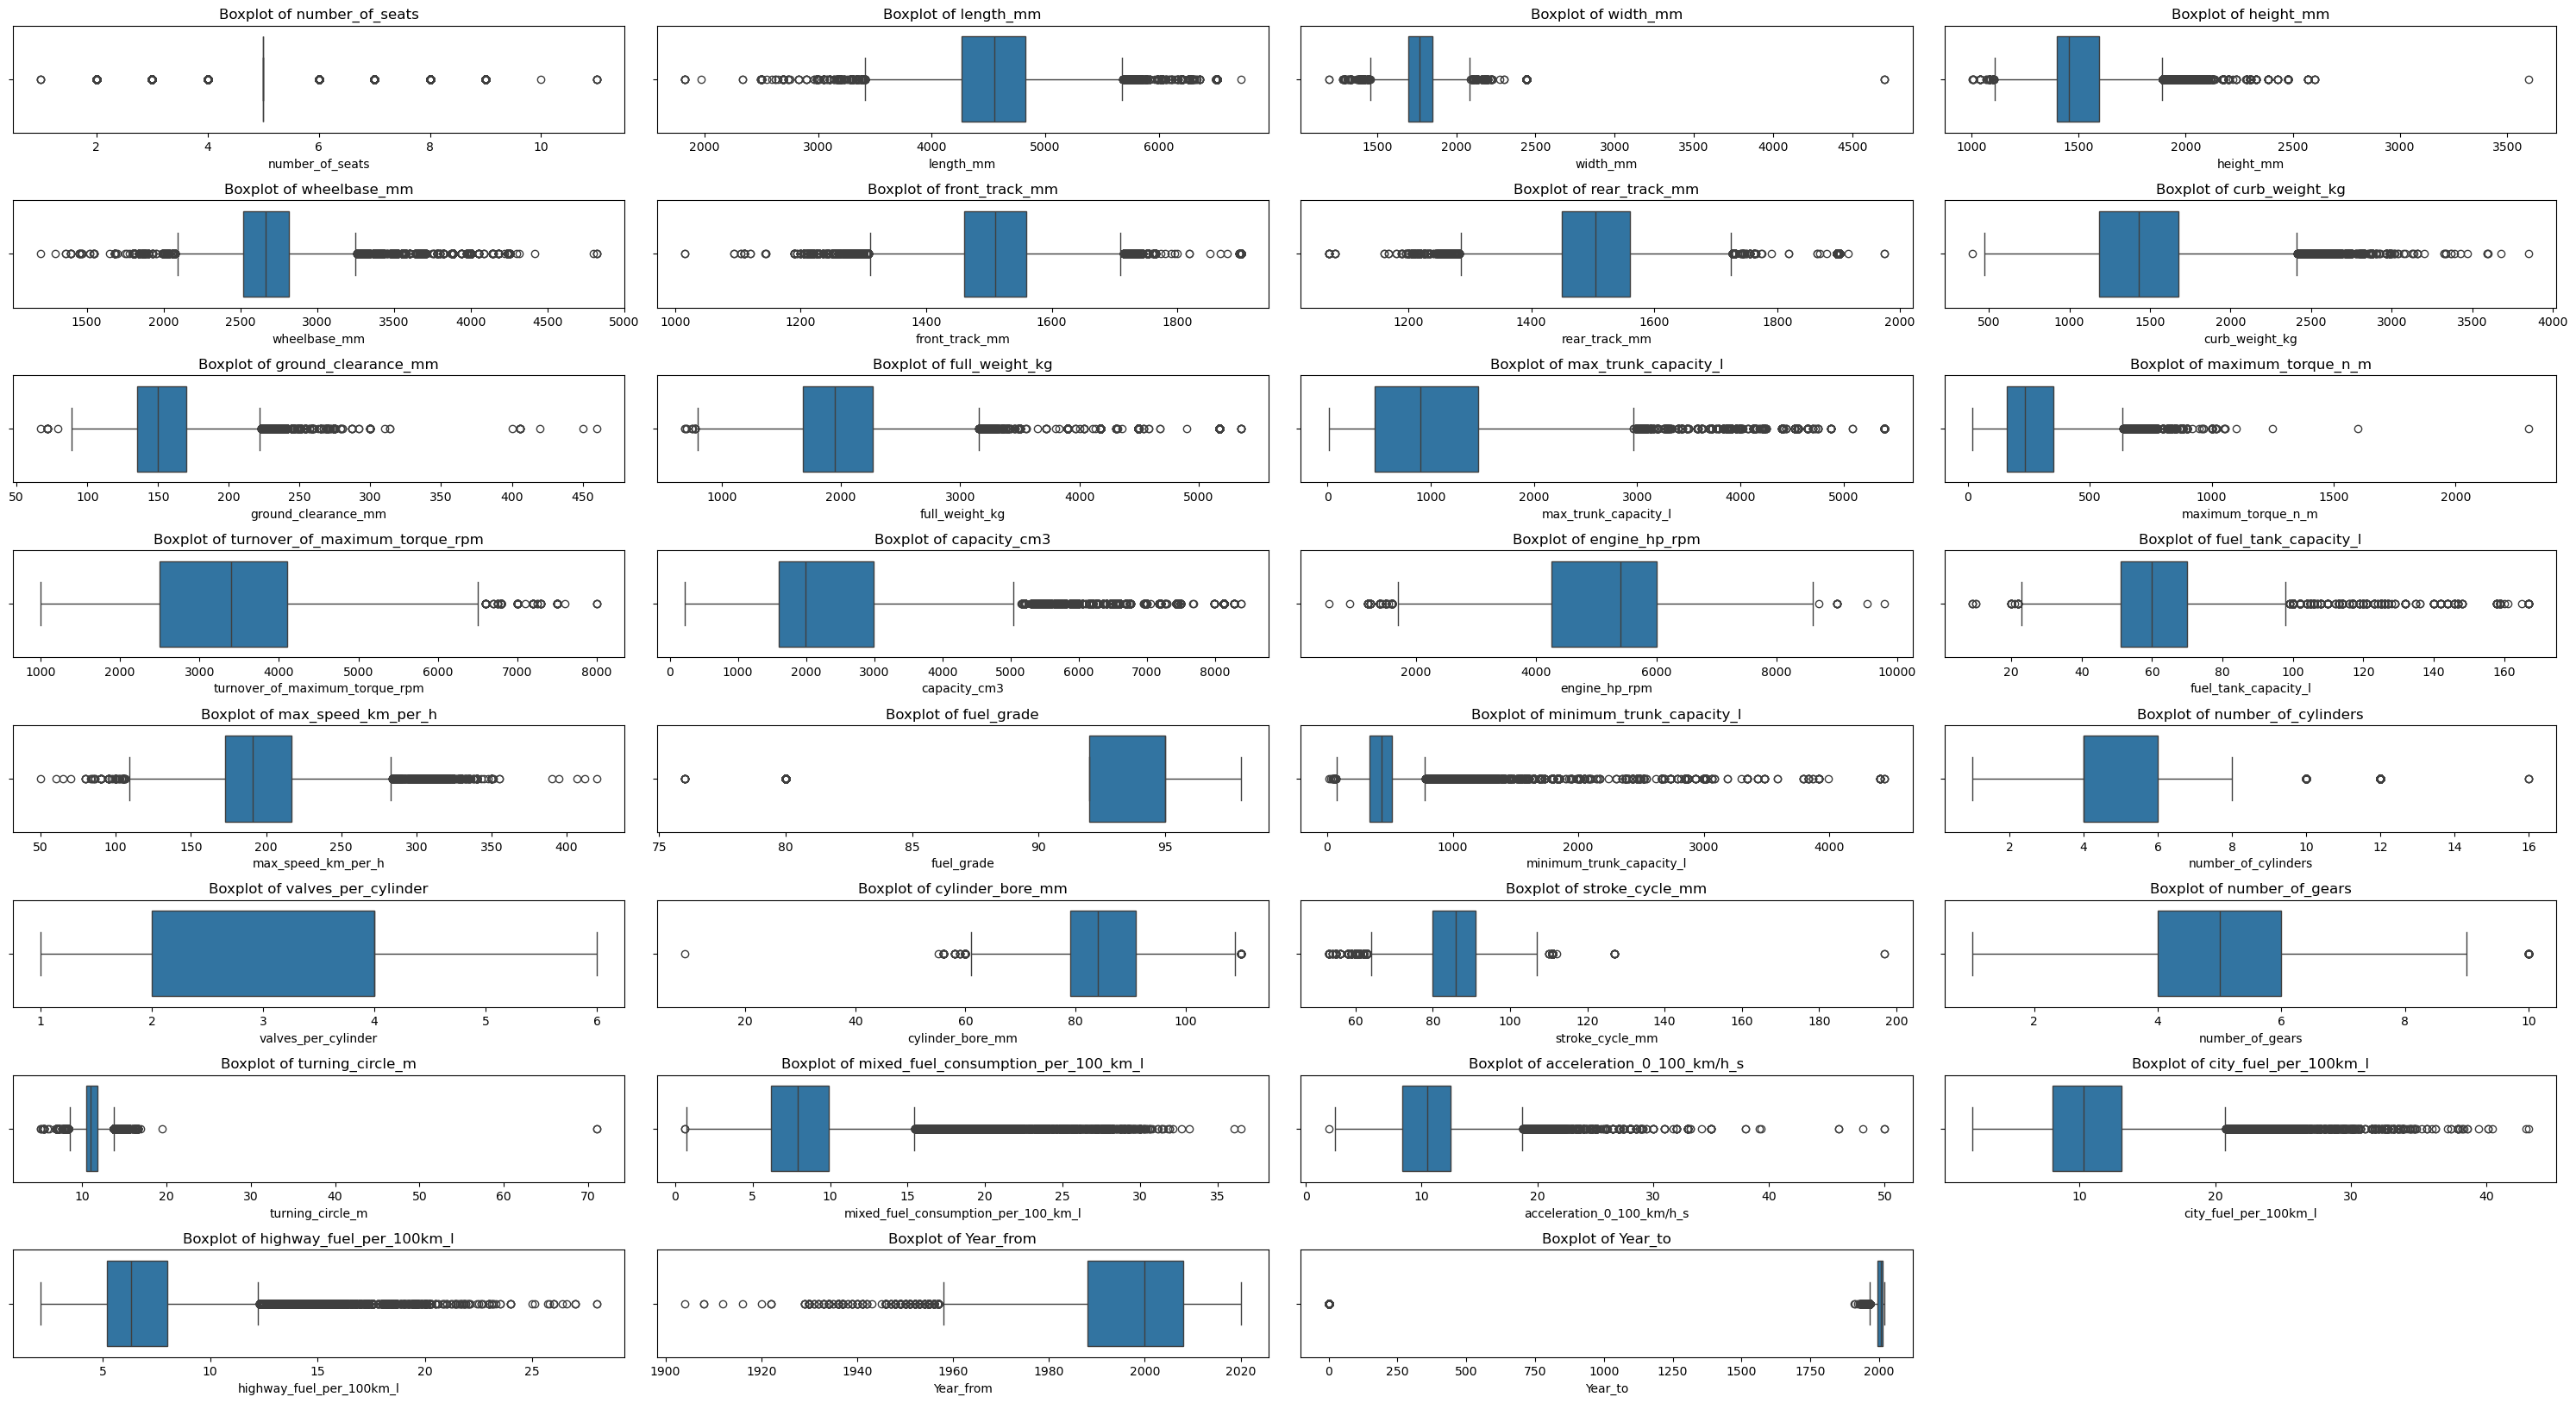

In [12]:
ColumnsToBoxPlots = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm',
    'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 'full_weight_kg', 'max_trunk_capacity_l',
    'maximum_torque_n_m', 'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm',
    'fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade', 'minimum_trunk_capacity_l',
    'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 'stroke_cycle_mm', 'number_of_gears',
    'turning_circle_m', 'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s',
    'city_fuel_per_100km_l', 'highway_fuel_per_100km_l', 'Year_from', 'Year_to']


plt.figure(figsize=(30, 20))


for i, col in enumerate(ColumnsToBoxPlots, 1):         #used chatgpt for this line
    plt.subplot(10, 4, i)  
    sns.boxplot(data=car_specs, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('car_specs_boxplots.png', bbox_inches='tight')
plt.show()


In [13]:
for col in ColumnsToBoxPlots:
    car_specs[col] = car_specs[col].fillna(car_specs[col].median())

In [14]:
print("Missing Values in Car Specs:\n", car_specs.isnull().sum(), "\n")

Missing Values in Car Specs:
 id_trim                                    0
Make                                       0
Modle                                      0
Generation                                 4
Year_from                                  0
Year_to                                    0
Series                                     0
Trim                                       0
Body_type                              18571
number_of_seats                            0
length_mm                                  0
width_mm                                   0
height_mm                                  0
wheelbase_mm                               0
front_track_mm                             0
rear_track_mm                              0
curb_weight_kg                             0
ground_clearance_mm                        0
full_weight_kg                             0
max_trunk_capacity_l                       0
minimum_trunk_capacity_l                   0
maximum_torque_n_m       

In [15]:
ColumnTransformMode =['Generation','Body_type','injection_type','cylinder_layout','engine_type','engine_hp','drive_wheels','transmission','back_suspension','rear_brakes','front_brakes','front_suspension']

for col in ColumnTransformMode:
    car_specs[col] = car_specs[col].fillna(car_specs[col].mode()[0])

In [16]:
print("Missing Values in Car Specs:\n", car_specs.isnull().sum(), "\n")

Missing Values in Car Specs:
 id_trim                                0
Make                                   0
Modle                                  0
Generation                             0
Year_from                              0
Year_to                                0
Series                                 0
Trim                                   0
Body_type                              0
number_of_seats                        0
length_mm                              0
width_mm                               0
height_mm                              0
wheelbase_mm                           0
front_track_mm                         0
rear_track_mm                          0
curb_weight_kg                         0
ground_clearance_mm                    0
full_weight_kg                         0
max_trunk_capacity_l                   0
minimum_trunk_capacity_l               0
maximum_torque_n_m                     0
injection_type                         0
cylinder_layout            

In [17]:
print(car_specs)

       id_trim Make     Modle    Generation  Year_from  Year_to       Series  \
0            1   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
1            2   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
2            3   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
3            4   AC       ACE  1 generation     1993.0   2000.0     Roadster   
4            5   AC       ACE  1 generation     1993.0   2000.0     Roadster   
...        ...  ...       ...           ...        ...      ...          ...   
70818    70983   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70819    70984   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70820    70985   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70821    70986   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70822    70987   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   

             Trim  Body_type  number_of

In [18]:
car_specs = car_specs.rename(columns={
    'Modle': 'Model'
})

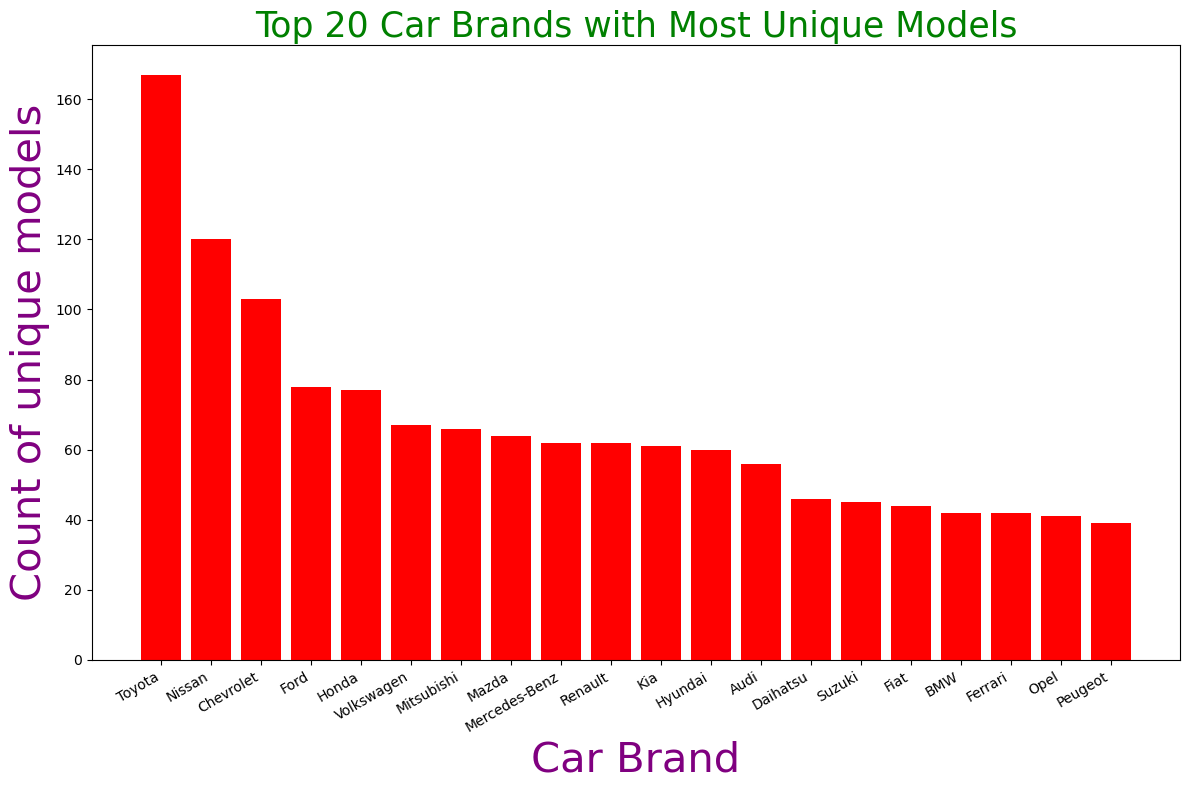

In [19]:
#graphs and plots
countthemodels = car_specs.groupby('Make')['Model'].nunique()
top20 = countthemodels.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
plt.bar(top20.index, top20.values, color='red')
plt.title("Top 20 Car Brands with Most Unique Models",color='green',size='25')
plt.xlabel("Car Brand",size='30',color='purple')
plt.ylabel("Count of unique models",size='30',color='purple')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('carspecs1.png', bbox_inches='tight')
plt.show()


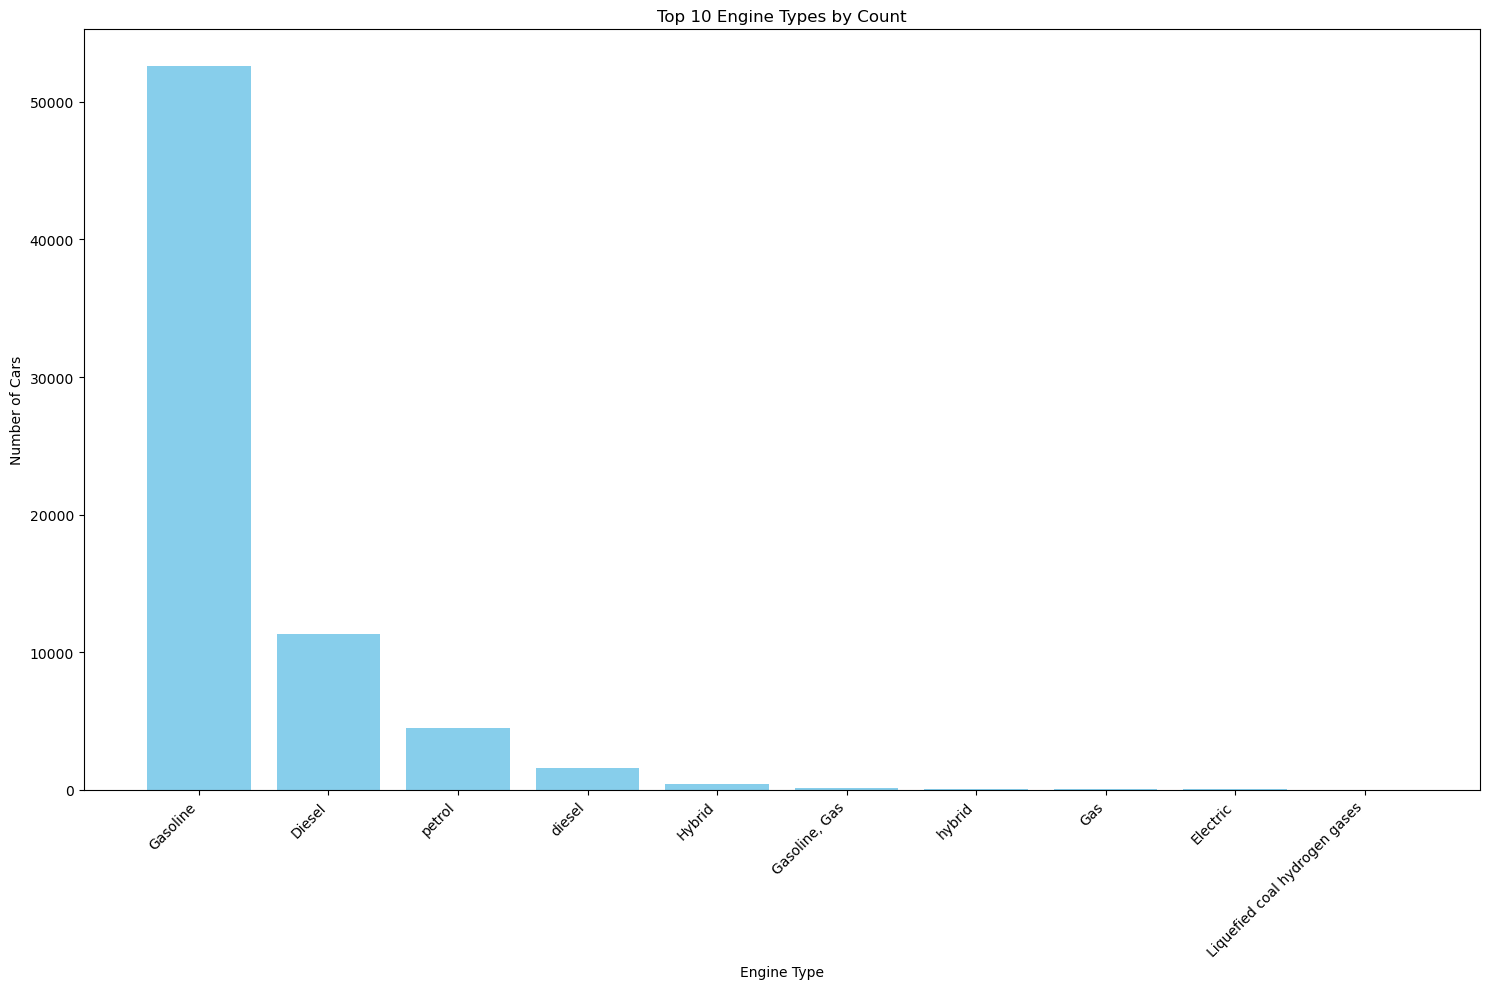

In [20]:
enginecount = car_specs['engine_type'].value_counts().head(10)
plt.figure(figsize=(15, 10))
plt.bar(enginecount.index, enginecount.values, color='skyblue')
plt.title("Top 10 Engine Types by Count")
plt.xlabel("Engine Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('carspecs2.png', bbox_inches='tight')
plt.show()


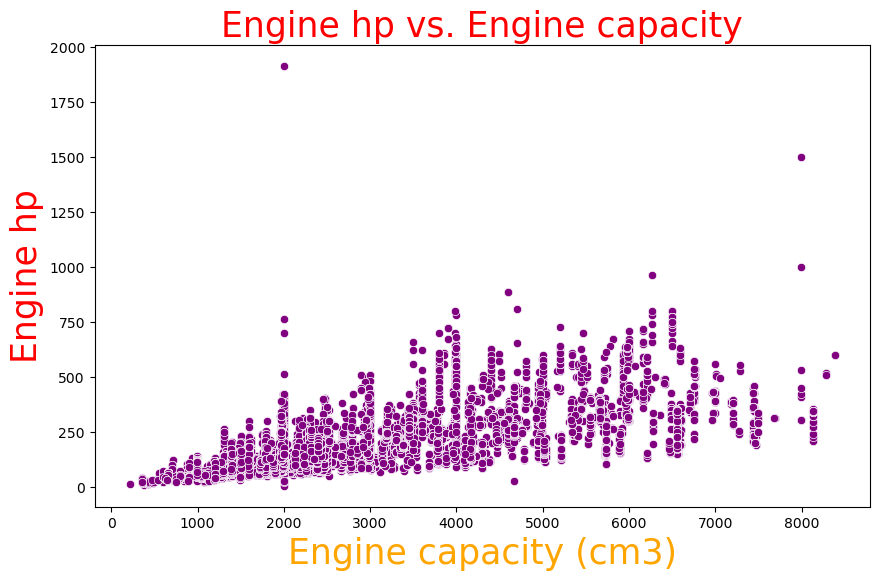

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capacity_cm3', y='engine_hp', data=car_specs,color='purple')
plt.title("Engine hp vs. Engine capacity",color='red',size='25')
plt.xlabel("Engine capacity (cm3)",color='orange',size='25')
plt.ylabel("Engine hp",color ='red',size='25')
plt.savefig('carspecs3.png', bbox_inches='tight')
plt.show()


In [22]:
df_cleaned = car_specs.copy()
outlierremoval = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 
                        'front_track_mm', 'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 
                        'full_weight_kg', 'max_trunk_capacity_l', 'maximum_torque_n_m', 
                        'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm', 
                        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'minimum_trunk_capacity_l', 
                        'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 
                        'stroke_cycle_mm', 'number_of_gears', 'turning_circle_m', 
                        'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s', 
                        'city_fuel_per_100km_l', 'highway_fuel_per_100km_l','Year_from', 'Year_to']
num_outlier_columns = 0  

for col in outlierremoval:
    initial_rows = df_cleaned.shape[0]
        
        
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
        
    outlier_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        
        
    num_removed = outlier_mask.sum()
        
        
    if num_removed > 0:
        num_outlier_columns += 1
        
    print(f"Column '{col}': {num_removed} outlier rows.")
        
       
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nTotal number of columns with outliers : {num_outlier_columns}")

Column 'number_of_seats': 16505 outlier rows.
Column 'length_mm': 2549 outlier rows.
Column 'width_mm': 1678 outlier rows.
Column 'height_mm': 7400 outlier rows.
Column 'wheelbase_mm': 874 outlier rows.
Column 'front_track_mm': 5628 outlier rows.
Column 'rear_track_mm': 4071 outlier rows.
Column 'curb_weight_kg': 1562 outlier rows.
Column 'ground_clearance_mm': 10315 outlier rows.
Column 'full_weight_kg': 5490 outlier rows.
Column 'max_trunk_capacity_l': 4030 outlier rows.
Column 'maximum_torque_n_m': 2174 outlier rows.
Column 'turnover_of_maximum_torque_rpm': 6 outlier rows.
Column 'capacity_cm3': 108 outlier rows.
Column 'engine_hp_rpm': 0 outlier rows.
Column 'fuel_tank_capacity_l': 3 outlier rows.
Column 'max_speed_km_per_h': 1 outlier rows.
Column 'minimum_trunk_capacity_l': 1 outlier rows.
Column 'number_of_cylinders': 0 outlier rows.
Column 'valves_per_cylinder': 0 outlier rows.
Column 'cylinder_bore_mm': 0 outlier rows.
Column 'stroke_cycle_mm': 0 outlier rows.
Column 'number_o

In [23]:
car_specs_numeric = car_specs[outlierremoval]

In [24]:
import numpy as np

columns_to_transform = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 
                        'front_track_mm', 'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 
                        'full_weight_kg', 'max_trunk_capacity_l', 'maximum_torque_n_m', 
                        'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm', 
                        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'minimum_trunk_capacity_l', 
                        'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 
                        'stroke_cycle_mm', 'number_of_gears', 'turning_circle_m', 
                        'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s', 
                        'city_fuel_per_100km_l', 'highway_fuel_per_100km_l','Year_from', 'Year_to']


for col in columns_to_transform:
    car_specs_numeric.loc[:, col] = car_specs_numeric[col].apply(lambda x: np.log(x + 1) if x > 0 else 0) #used chatgpt for this line


print(car_specs_numeric[columns_to_transform].head())


   number_of_seats  length_mm  width_mm  height_mm  wheelbase_mm  \
0         1.098612   8.394121  7.534228   7.170888      7.812378   
1         1.098612   8.394121  7.534228   7.170888      7.812378   
2         1.098612   8.394121  7.534228   7.170888      7.813187   
3         1.791759   8.422883  7.479300   7.283448      7.888335   
4         1.791759   8.422883  7.479300   7.283448      7.888335   

   front_track_mm  rear_track_mm  curb_weight_kg  ground_clearance_mm  \
0        7.372118       7.359468        7.320527             4.875197   
1        7.372118       7.359468        7.320527             5.017280   
2        7.372118       7.359468        7.273093             5.017280   
3        7.320527       7.317212        7.266129             5.017280   
4        7.320527       7.317212        7.266129             5.017280   

   full_weight_kg  ...  cylinder_bore_mm  stroke_cycle_mm  number_of_gears  \
0        7.576097  ...          4.430817         4.406719         1.945910

In [25]:
car_specs_numeric = car_specs_numeric.copy()

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
car_specs_numeric.loc[:, outlierremoval] = minmax_scaler.fit_transform(car_specs_numeric[outlierremoval]) #used chatgpt for this line

In [26]:
print(car_specs_numeric)

       number_of_seats  length_mm  width_mm  height_mm  wheelbase_mm  \
0             0.226294   0.678425  0.327081   0.201651      0.519029   
1             0.226294   0.678425  0.327081   0.201651      0.519029   
2             0.226294   0.678425  0.327081   0.201651      0.519611   
3             0.613147   0.700506  0.287007   0.289917      0.573673   
4             0.613147   0.700506  0.287007   0.289917      0.573673   
...                ...        ...       ...        ...           ...   
70818         0.613147   0.733693  0.295200   0.427846      0.621938   
70819         0.613147   0.733693  0.295200   0.427846      0.621938   
70820         0.613147   0.733693  0.295200   0.427846      0.621938   
70821         0.613147   0.733693  0.295200   0.427846      0.621938   
70822         0.613147   0.733693  0.295200   0.427846      0.621938   

       front_track_mm  rear_track_mm  curb_weight_kg  ground_clearance_mm  \
0            0.715257        0.62552        0.586880      

In [27]:
corr_matrix_specs = car_specs_numeric.corr()
print(corr_matrix_specs)

                                     number_of_seats  length_mm  width_mm  \
number_of_seats                             1.000000   0.103015  0.031140   
length_mm                                   0.103015   1.000000  0.811785   
width_mm                                    0.031140   0.811785  1.000000   
height_mm                                   0.300225   0.249414  0.319530   
wheelbase_mm                                0.128122   0.872376  0.769326   
front_track_mm                              0.052528   0.627591  0.728055   
rear_track_mm                               0.030221   0.614504  0.738870   
curb_weight_kg                              0.072598   0.722015  0.727818   
ground_clearance_mm                         0.049813   0.234618  0.246754   
full_weight_kg                              0.066135   0.628959  0.615775   
max_trunk_capacity_l                        0.246318   0.068701  0.103683   
maximum_torque_n_m                         -0.104267   0.670554  0.711644   

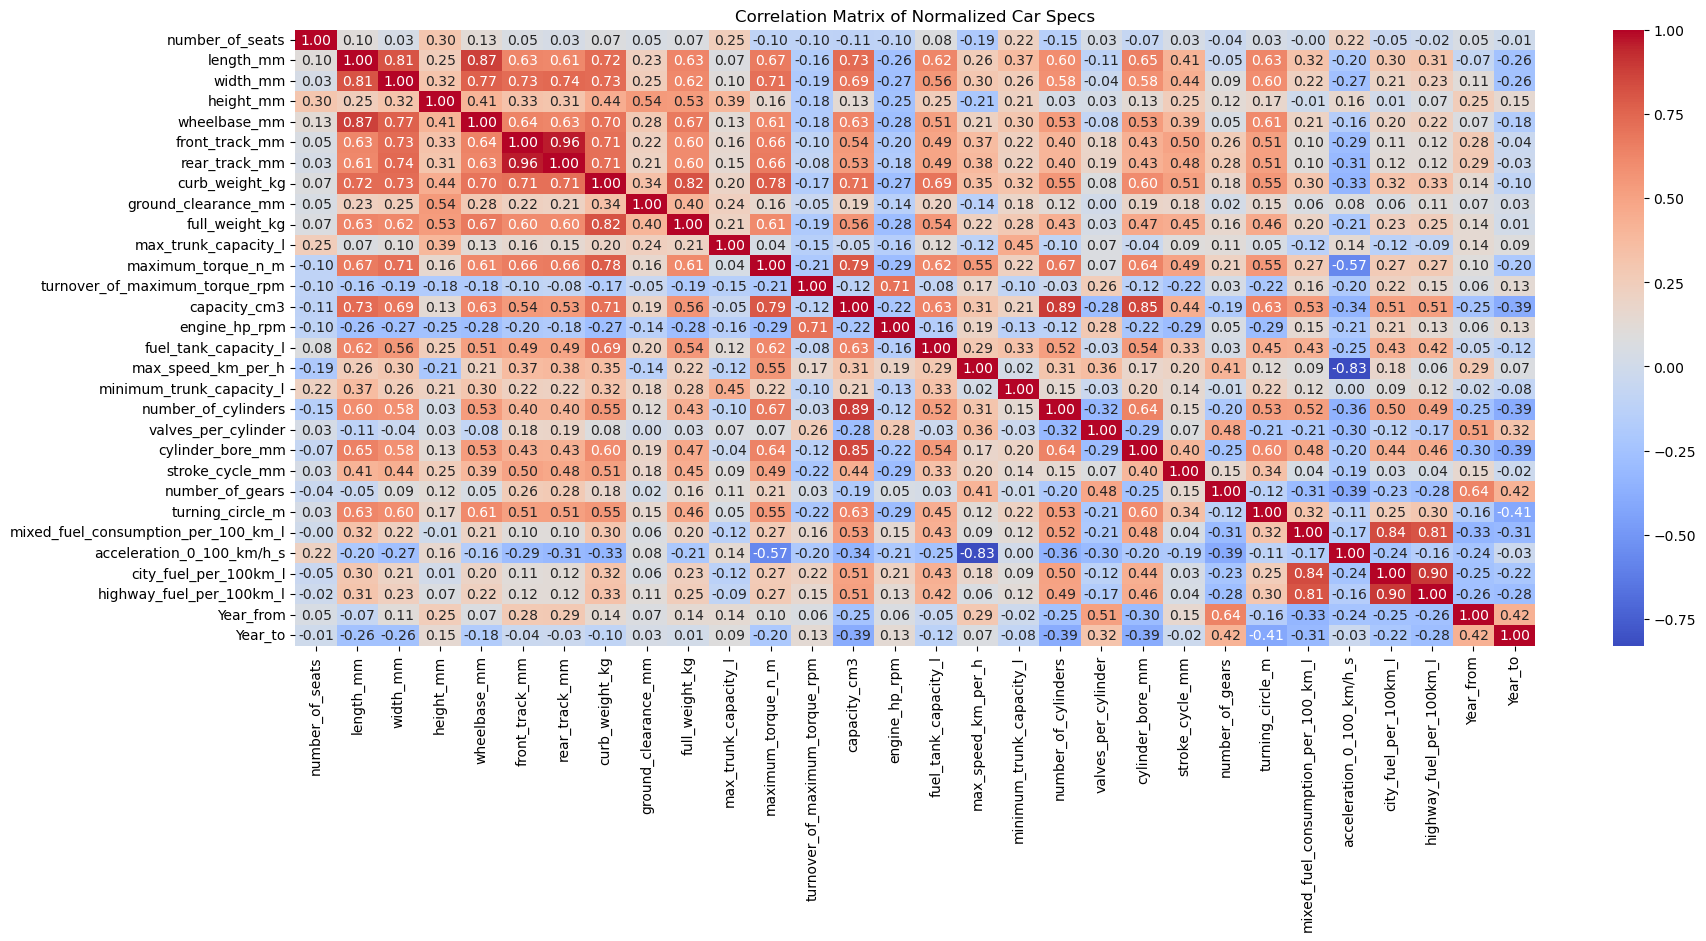

In [28]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_specs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Normalized Car Specs")
plt.savefig('carspecs4.png', bbox_inches='tight')
plt.show()


In [29]:
corr_matrix = car_specs_numeric.corr()

high_corr_vars = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_vars) if i != j]

for pair in high_corr_pairs:
    print(f"High correlation: {pair[0]} and {pair[1]} (corr = {corr_matrix.loc[pair[0], pair[1]]:.2f})")

High correlation: length_mm and width_mm (corr = 0.81)
High correlation: length_mm and wheelbase_mm (corr = 0.87)
High correlation: width_mm and length_mm (corr = 0.81)
High correlation: wheelbase_mm and length_mm (corr = 0.87)
High correlation: front_track_mm and rear_track_mm (corr = 0.96)
High correlation: rear_track_mm and front_track_mm (corr = 0.96)
High correlation: curb_weight_kg and full_weight_kg (corr = 0.82)
High correlation: full_weight_kg and curb_weight_kg (corr = 0.82)
High correlation: capacity_cm3 and number_of_cylinders (corr = 0.89)
High correlation: capacity_cm3 and cylinder_bore_mm (corr = 0.85)
High correlation: max_speed_km_per_h and acceleration_0_100_km/h_s (corr = -0.83)
High correlation: number_of_cylinders and capacity_cm3 (corr = 0.89)
High correlation: cylinder_bore_mm and capacity_cm3 (corr = 0.85)
High correlation: mixed_fuel_consumption_per_100_km_l and city_fuel_per_100km_l (corr = 0.84)
High correlation: mixed_fuel_consumption_per_100_km_l and highwa

In [30]:
#Dataset2

In [31]:
car_sales = pd.read_csv("Car Sales.xlsx - car_data.csv")

In [32]:
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


In [33]:
print(car_sales.describe())

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


In [34]:
MaxThresholdtoRemove = len(car_sales) * 0.5
car_sales = car_sales.dropna(thresh=MaxThresholdtoRemove, axis=1)

In [35]:
car_sales = car_sales.drop_duplicates()

In [36]:
print("Missing Values in Car Sales:\n", car_sales.isnull().sum(), "\n")

Missing Values in Car Sales:
 Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64 



In [37]:
car_sales = car_sales.dropna(subset=["Customer Name"])

In [38]:
print("Missing Values in Car Sales:\n", car_sales.isnull().sum(), "\n")

Missing Values in Car Sales:
 Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64 



In [39]:
print(car_sales)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

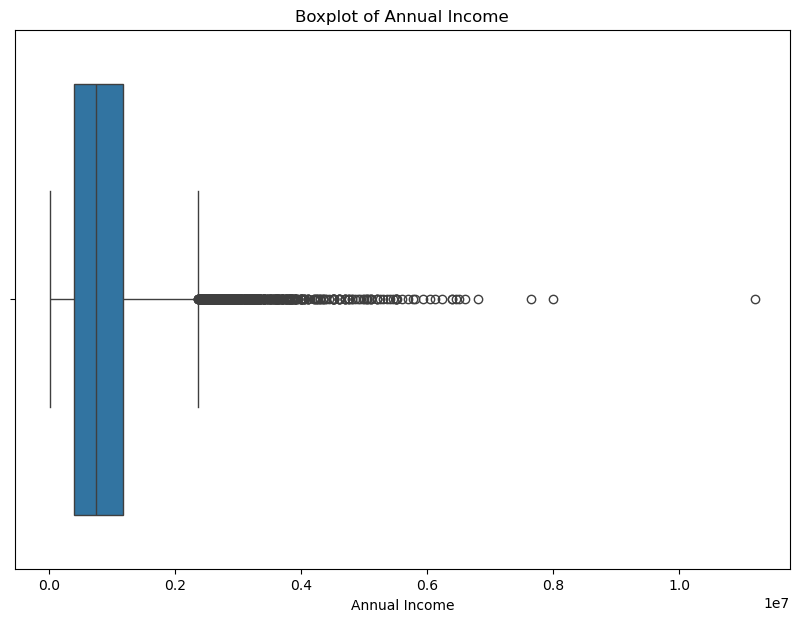

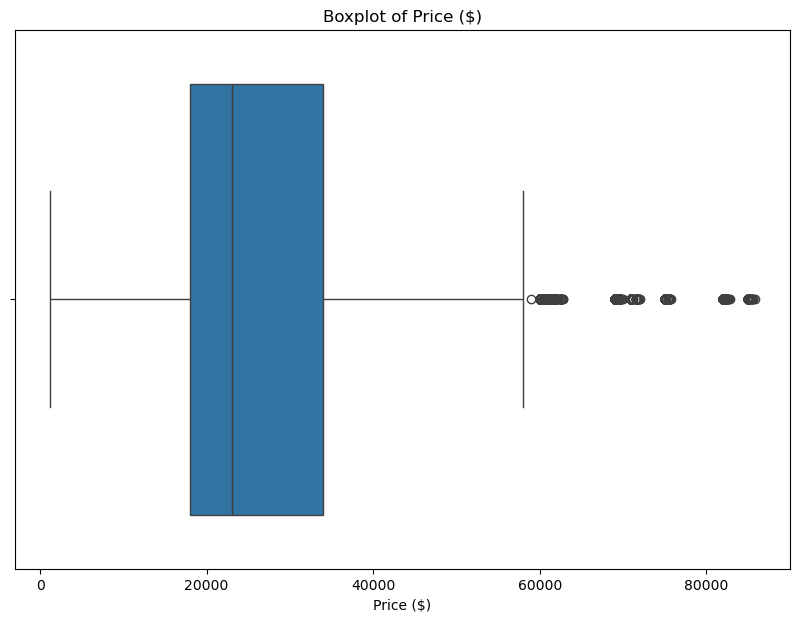

In [40]:
ColumnsToBoxPlots =['Annual Income','Price ($)']
for col in ColumnsToBoxPlots:
    plt.figure(figsize=(10, 7)) 
    sns.boxplot(data=car_sales, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


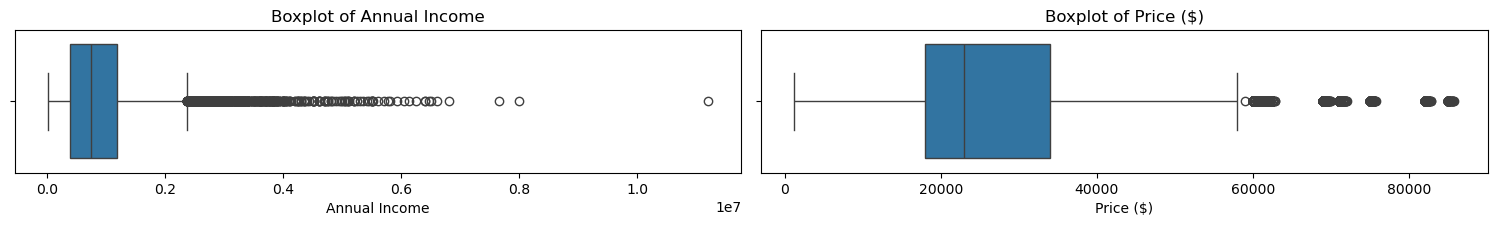

In [41]:
plt.figure(figsize=(30, 20))


for i, col in enumerate(ColumnsToBoxPlots, 1):
    plt.subplot(10, 4, i)  
    sns.boxplot(data=car_sales, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('car_sales_boxplots.png', bbox_inches='tight')
plt.show()


In [42]:
#graphs

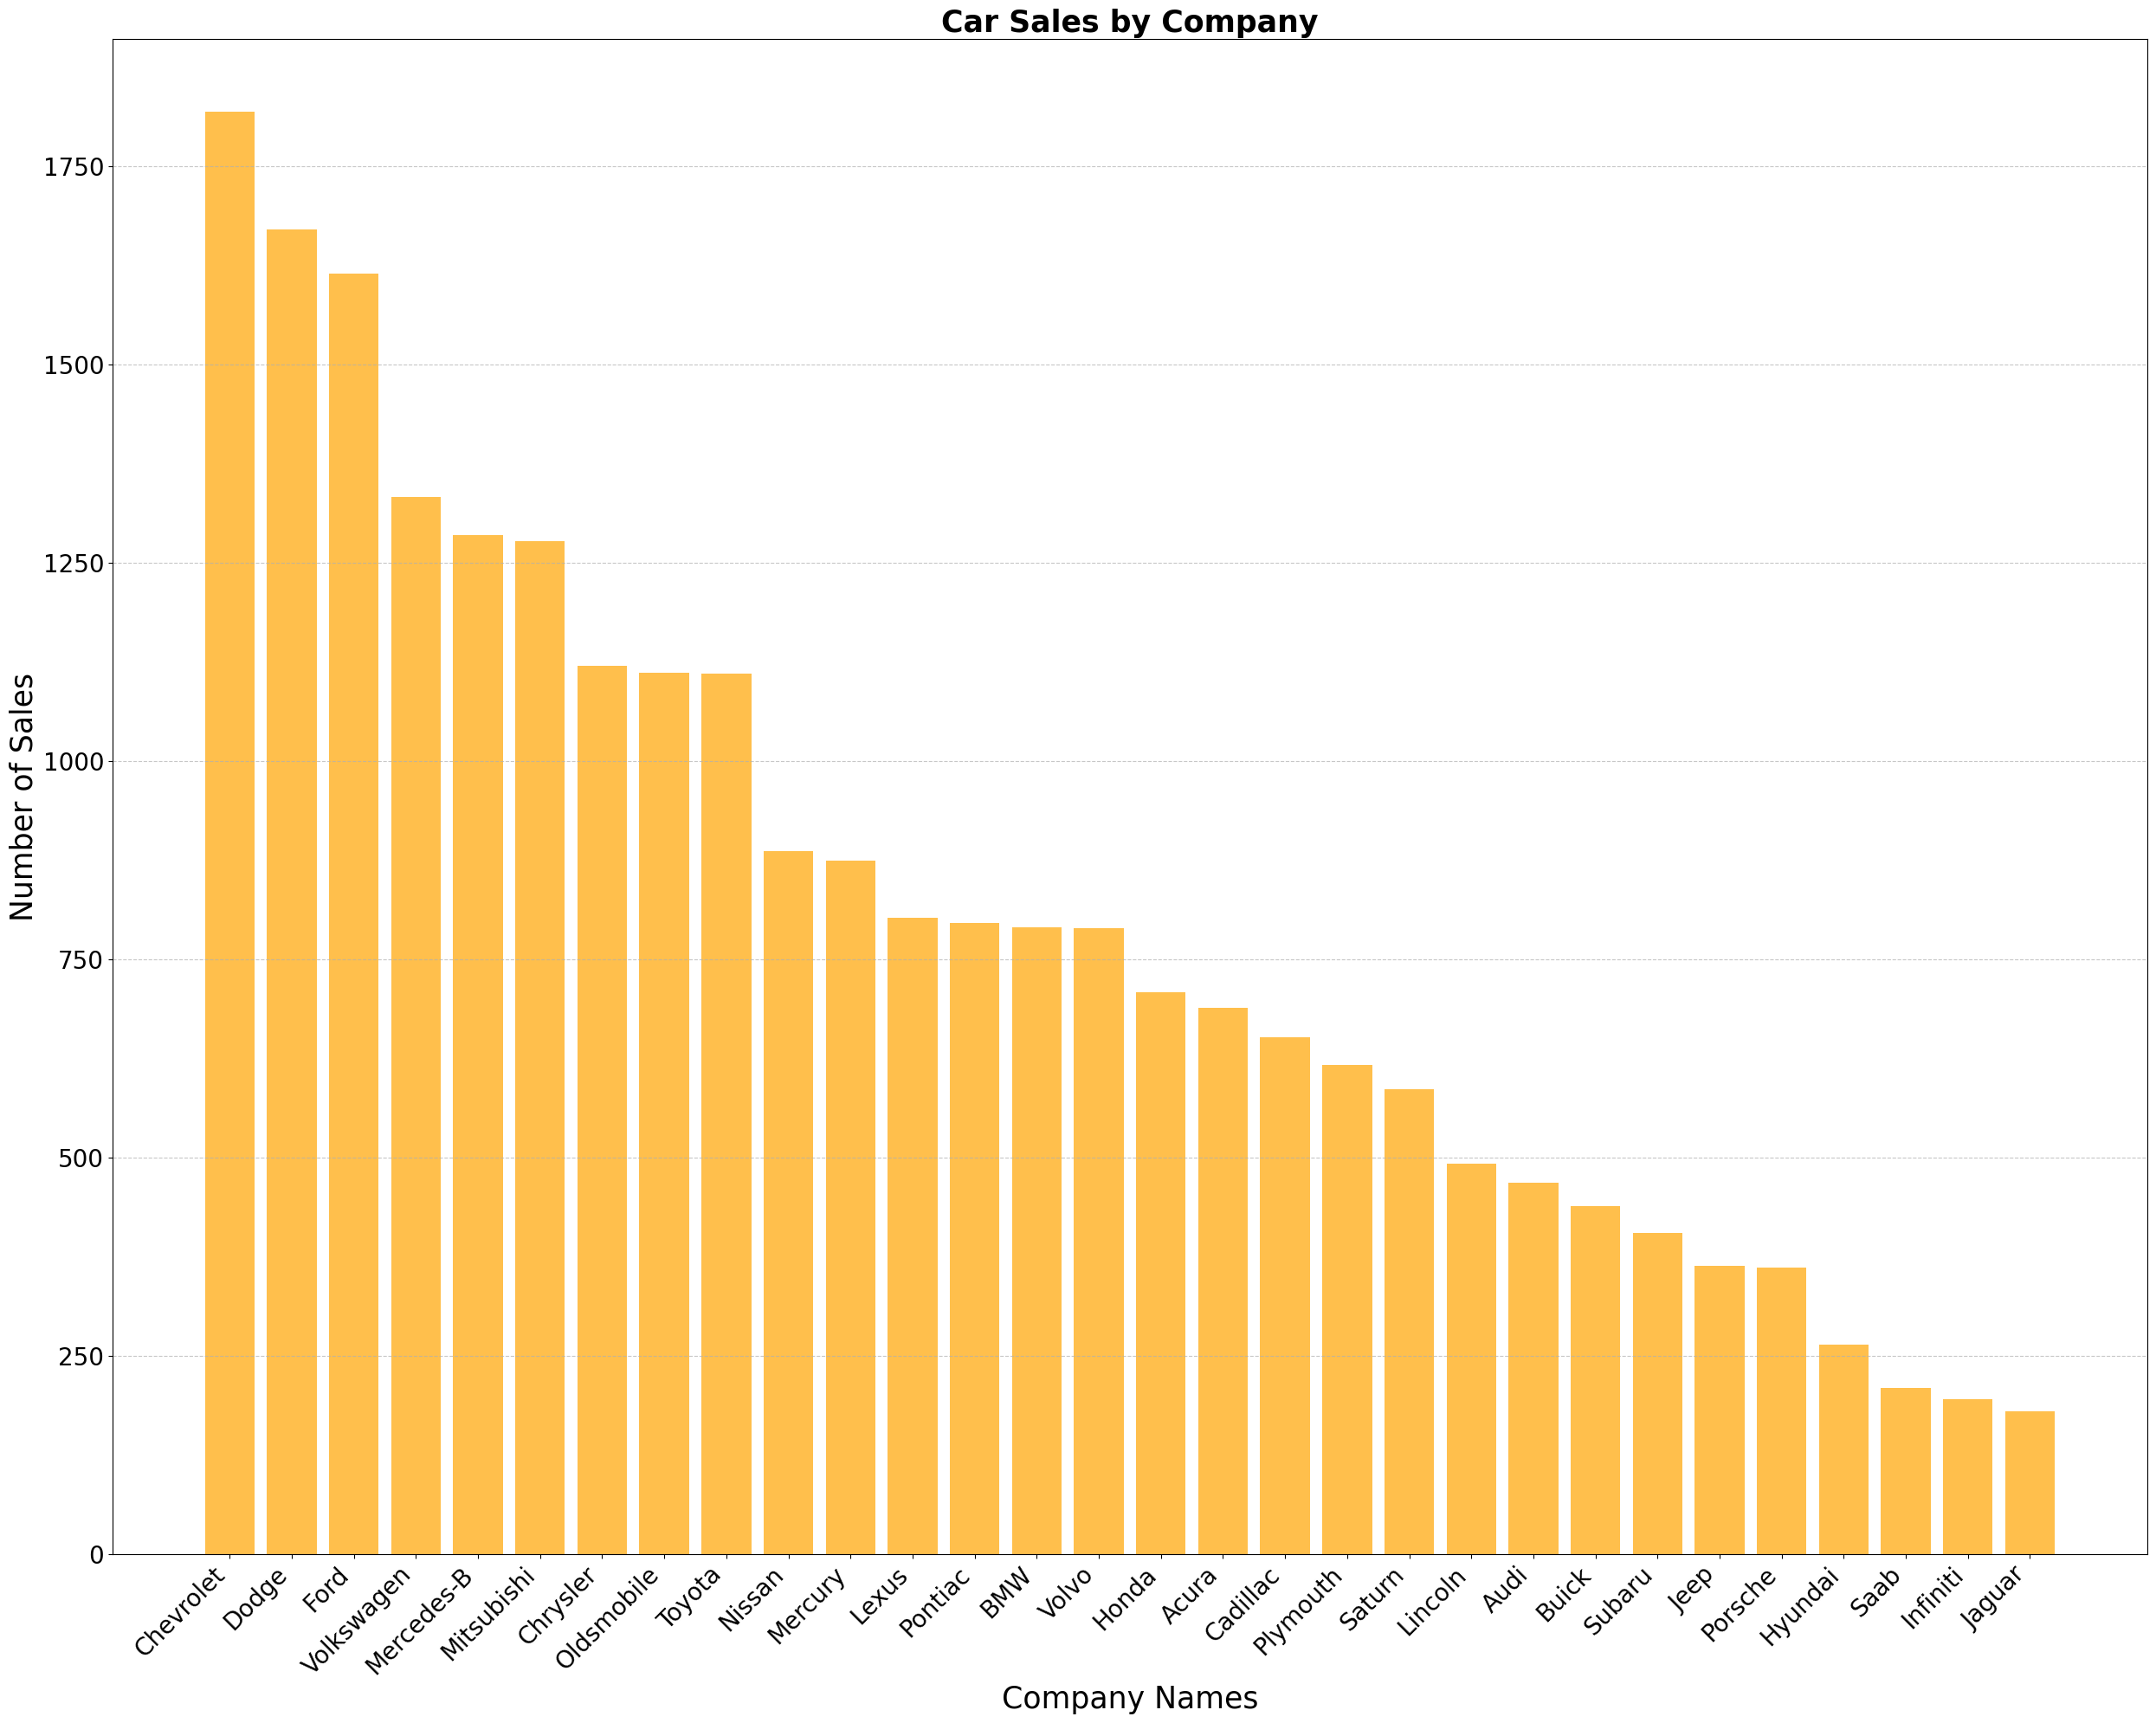

In [43]:
company_sales = car_sales['Company'].value_counts()

plt.figure(figsize=(25, 20))  # Set the figure size
plt.bar(company_sales.index, company_sales.values, color='orange', alpha=0.7)
plt.xlabel('Company Names', fontsize=25)  
plt.ylabel('Number of Sales', fontsize=25)  
plt.title('Car Sales by Company', fontsize=25, fontweight='bold')  
plt.xticks(rotation=45, ha='right',size='20') 
plt.yticks(size='20') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.savefig('carsales1.png', bbox_inches='tight')
plt.show()  


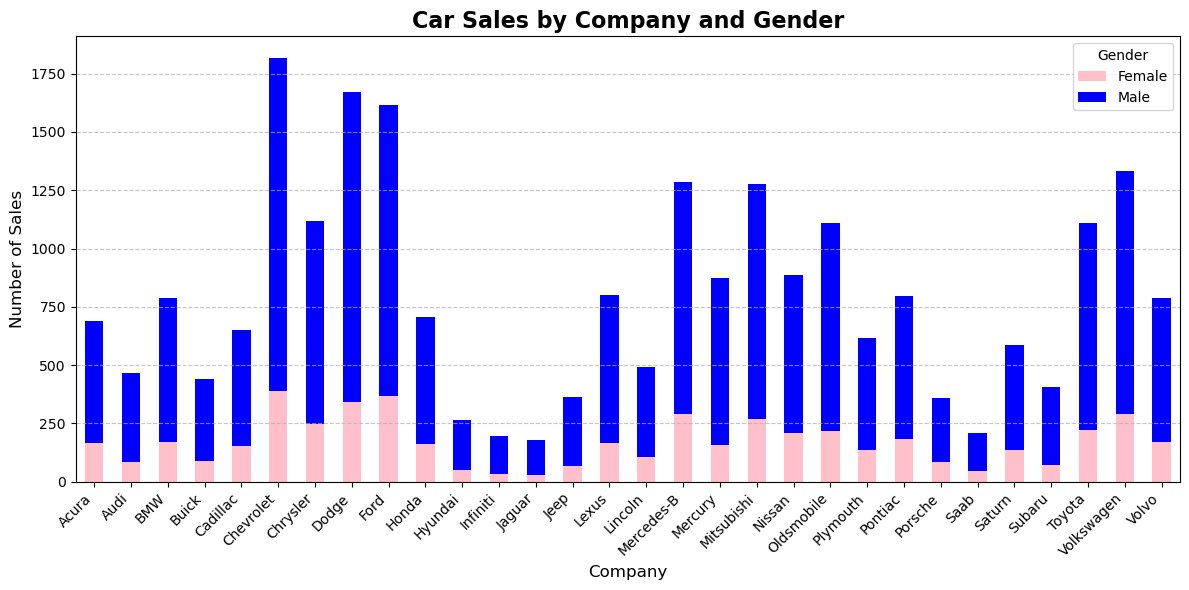

In [44]:

gender_companysales = car_sales.groupby(['Company', 'Gender']).size().unstack()

gender_companysales.plot(kind='bar', stacked=True, figsize=(12, 6), color=['pink', 'blue'])
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Car Sales by Company and Gender', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('carsales2.png', bbox_inches='tight')
plt.show()


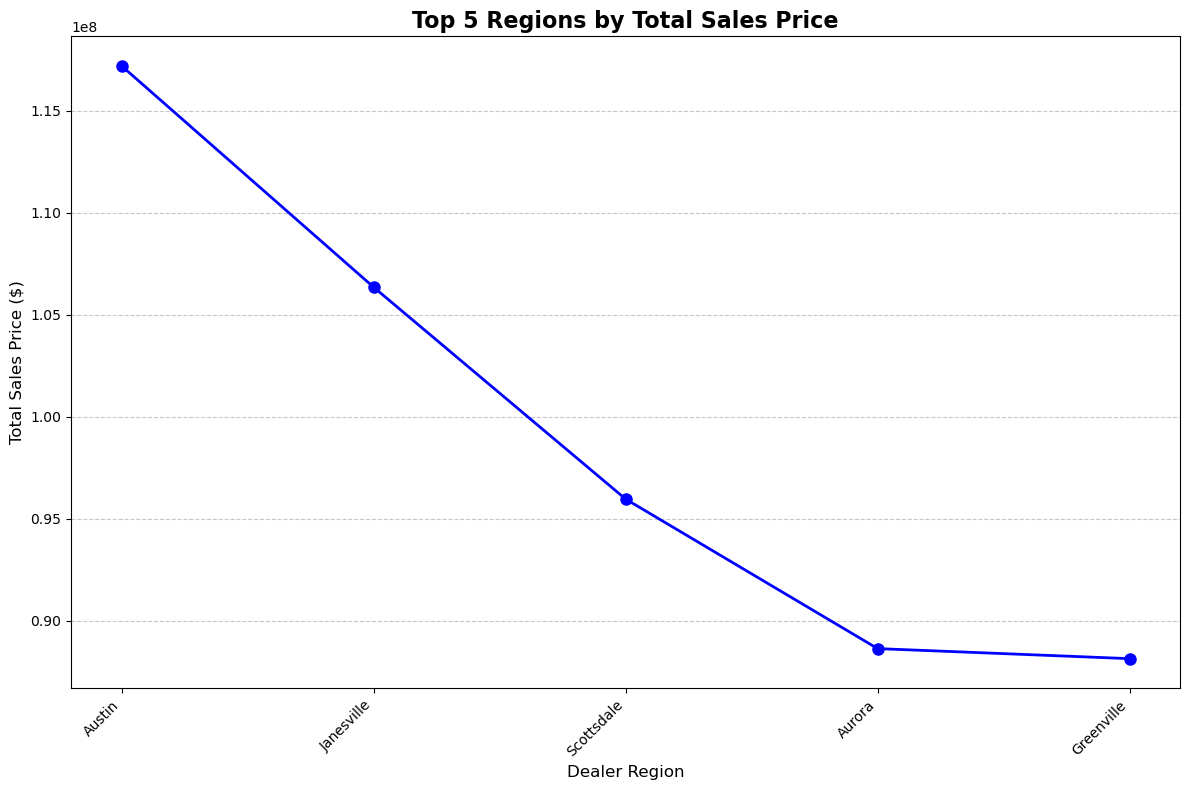

In [45]:
salesbyregion = car_sales.groupby('Dealer_Region')['Price ($)'].sum()

topsalesbyregion = salesbyregion.nlargest(5)

topsalesbyregion = topsalesbyregion.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
plt.plot(topsalesbyregion.index, topsalesbyregion.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Total Sales Price ($)', fontsize=12)
plt.title('Top 5 Regions by Total Sales Price', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('carsales3.png', bbox_inches='tight')
plt.show()


In [46]:
df_cleaned = car_sales.copy()
outlierremoval = ['Annual Income','Price ($)']
num_outlier_columns = 0

for col in outlierremoval:
    initial_rows = df_cleaned.shape[0]
        
        
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
        
    outlier_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        
        
    num_removed = outlier_mask.sum()
        
        
    if num_removed > 0:
        num_outlier_columns += 1
        
    print(f"Column '{col}': {num_removed} outlier rows.")
        
       
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nTotal number of columns with outliers : {num_outlier_columns}")

Column 'Annual Income': 815 outlier rows.
Column 'Price ($)': 1393 outlier rows.

Total number of columns with outliers : 2


In [47]:
car_sales_numeric = car_sales[outlierremoval]

In [48]:
car_sales_numeric = car_sales_numeric.copy()
columns_to_transform = ['Annual Income','Price ($)']

for col in columns_to_transform:
    car_sales_numeric[col] = car_sales_numeric[col].astype(float).apply(lambda x: np.log(x + 1) if x > 0 else 0)


print(car_sales_numeric[columns_to_transform].head())

   Annual Income  Price ($)
0       9.510519  10.165890
1      14.207553   9.852247
2      13.849913  10.357775
3       9.510519   9.546884
4      14.197366  10.106469


In [49]:
car_sales_numeric = car_sales_numeric.copy()
minmax_scaler = MinMaxScaler()
car_sales_numeric.loc[:, outlierremoval] = minmax_scaler.fit_transform(car_sales_numeric[outlierremoval])

In [50]:
print(car_sales_numeric)

       Annual Income  Price ($)
0           0.041653   0.720326
1           0.711412   0.646853
2           0.660416   0.765275
3           0.041653   0.575321
4           0.709960   0.706406
...              ...        ...
23901       0.041653   0.539213
23902       0.640487   0.606599
23903       0.605666   0.670297
23904       0.041653   0.761527
23905       0.684448   0.733464

[23905 rows x 2 columns]


In [51]:
corr_matrix_sales = car_sales_numeric.corr()
print(corr_matrix_sales)

               Annual Income  Price ($)
Annual Income       1.000000   0.013962
Price ($)           0.013962   1.000000


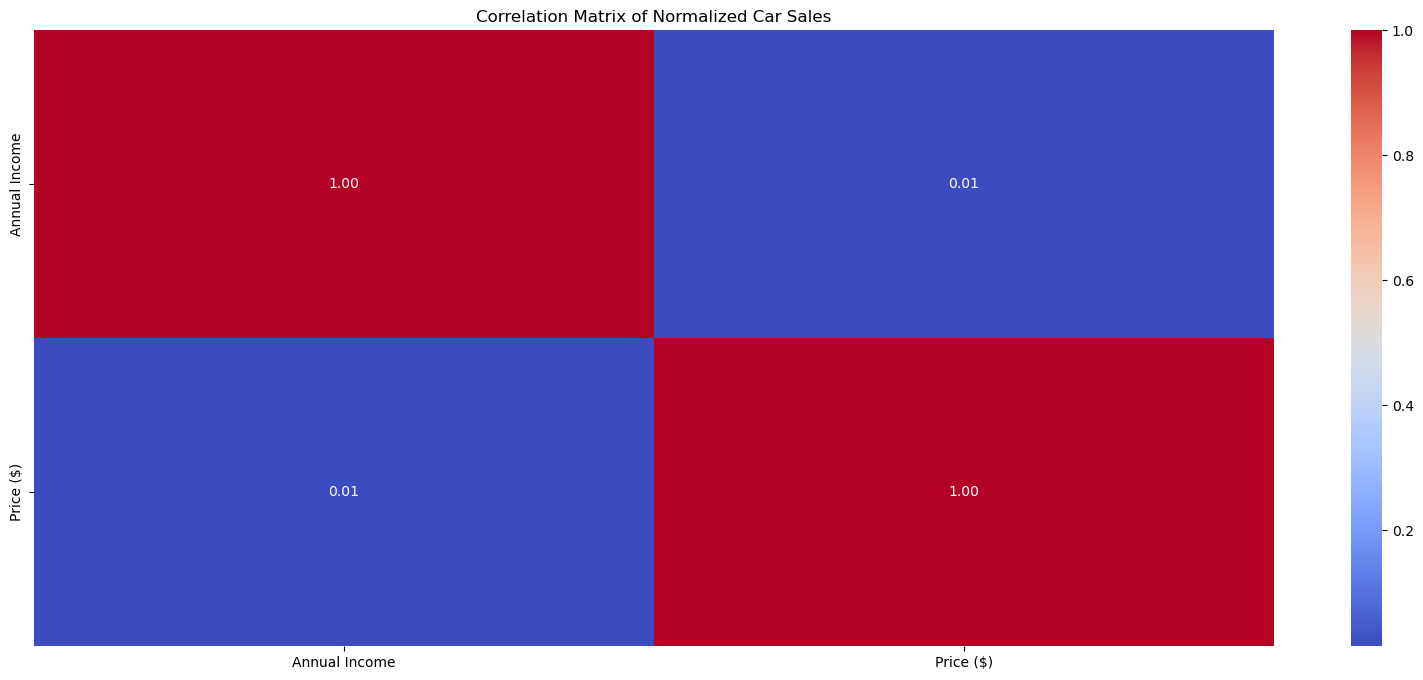

In [52]:
plt.figure(figsize=(20, 8))

sns.heatmap(corr_matrix_sales, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Normalized Car Sales")
plt.savefig('carsales4.png', bbox_inches='tight')
plt.show()


In [53]:
#Dataset3

In [54]:
car_ratings = pd.read_csv("Review.csv")

In [55]:
print(car_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299045 entries, 0 to 299044
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Company   299045 non-null  object
 1   Model     299045 non-null  object
 2   Year      299045 non-null  int64 
 3   Reviewer  298938 non-null  object
 4   Date      299028 non-null  object
 5   Title     299010 non-null  object
 6   Rating    299045 non-null  int64 
 7   Review    299040 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.3+ MB
None


In [56]:
print(car_ratings.describe())

                Year         Rating
count  299045.000000  299045.000000
mean     2007.492247       3.980886
std         5.330847       0.993001
min      2000.000000       0.000000
25%      2003.000000       4.000000
50%      2006.000000       4.000000
75%      2011.000000       5.000000
max      2020.000000       5.000000


In [57]:
MaxThresholdtoRemove = len(car_specs) * 0.5
car_ratings = car_ratings.dropna(thresh=MaxThresholdtoRemove, axis=1)

In [58]:
car_ratings = car_ratings.drop_duplicates()

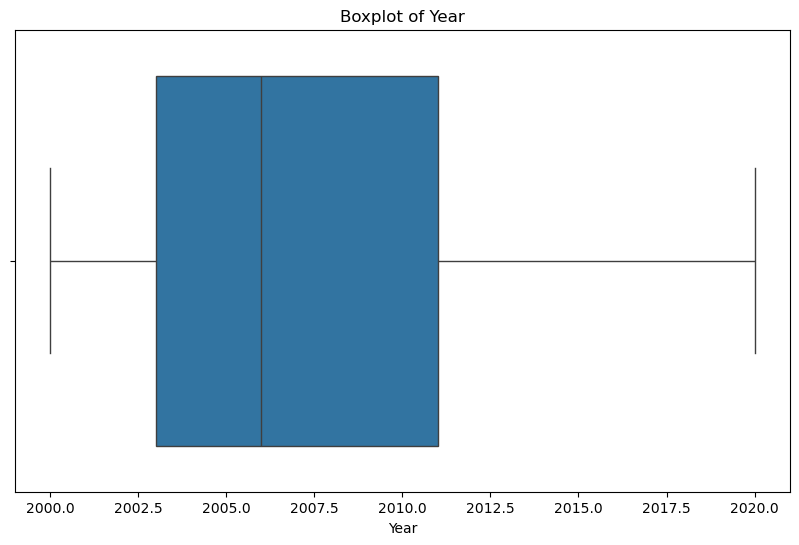

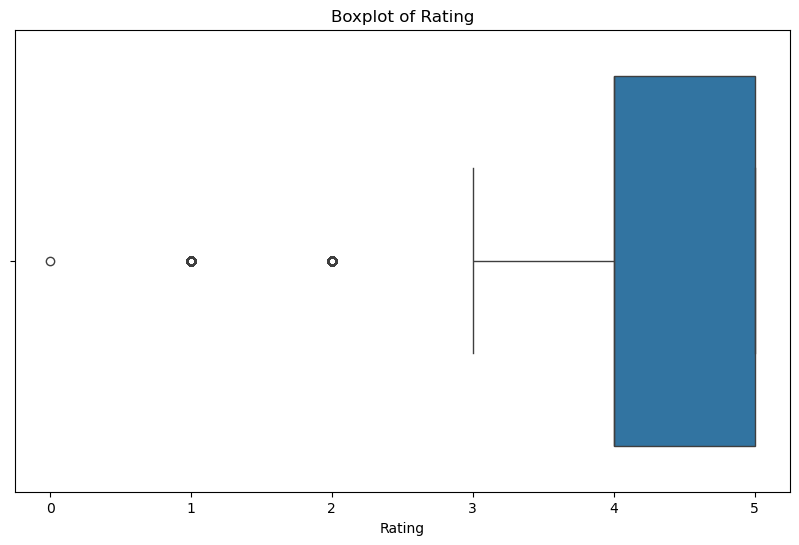

In [59]:
ColumnsToBoxPlots = ['Year','Rating']



for col in ColumnsToBoxPlots:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=car_ratings, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()  

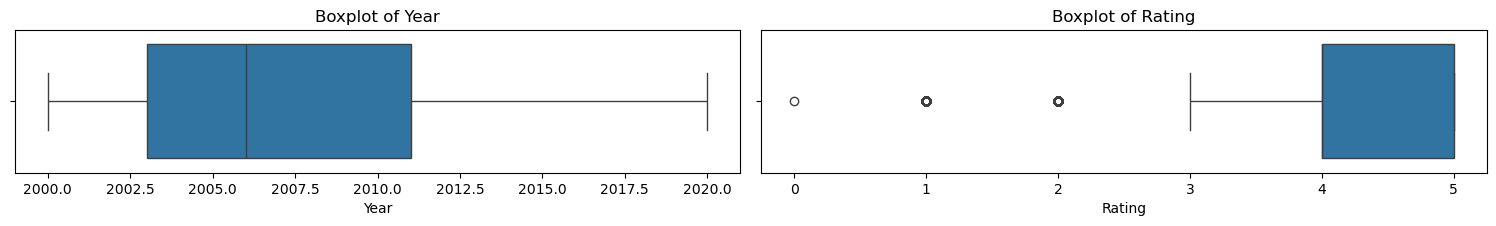

In [60]:
plt.figure(figsize=(30, 20))


for i, col in enumerate(ColumnsToBoxPlots, 1):
    plt.subplot(10, 4, i)  
    sns.boxplot(data=car_ratings, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('car_ratings_boxplots.png', bbox_inches='tight')
plt.show()


In [61]:
print("Missing Values in Car Ratings:\n", car_ratings.isnull().sum(), "\n")

Missing Values in Car Ratings:
 Company       0
Model         0
Year          0
Reviewer    107
Date         17
Title        35
Rating        0
Review        5
dtype: int64 



In [62]:
car_ratings = car_ratings.rename(columns={
    'Reviewer': 'Reviewer_Name'
})

In [63]:
car_ratings['Reviewer_Name']=car_ratings['Reviewer_Name'].fillna('Anonymous')
car_ratings['Date']=car_ratings['Date'].fillna('Unknown')
car_ratings['Title']=car_ratings['Title'].fillna('No title')
car_ratings['Review']=car_ratings['Review'].fillna('Review not given')

In [64]:
print("Missing Values in Car Ratings:\n", car_ratings.isnull().sum(), "\n")

Missing Values in Car Ratings:
 Company          0
Model            0
Year             0
Reviewer_Name    0
Date             0
Title            0
Rating           0
Review           0
dtype: int64 



In [65]:
print(car_ratings)

       Company Model  Year Reviewer_Name         Date  \
0        acura   ilx  2013      mahowald   08/12/2012   
1        acura   ilx  2013           VIP   07/26/2016   
2        acura   ilx  2013     bybchucky   09/14/2013   
3        acura   ilx  2013    bayareamom   01/26/2015   
4        acura   ilx  2013   Kerry Olson   03/26/2016   
...        ...   ...   ...           ...          ...   
299040   volvo  xc70  2016    FirstVolvo   03/18/2017   
299041   volvo  xc70  2016           Dhp   01/26/2016   
299042   volvo  xc70  2016        Lisa B   05/03/2016   
299043   volvo  xc70  2016         Milan   05/04/2019   
299044   volvo  xc70  2016  Irving Gates   03/05/2019   

                                         Title  Rating  \
0              Getting 43 Mpg on daily commute       5   
1                                New to me ILX       5   
2                        Excellet Commuter Car       4   
3                Peppy Hybrid that Turns Heads       4   
4        2013 Acura ILX H

/var/folders/3d/ybqkjf7x3ts4l77xlcln52l40000gn/T/ipykernel_39990/1090606160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avgratingofcompany.index, y=avgratingofcompany.values, palette="icefire")


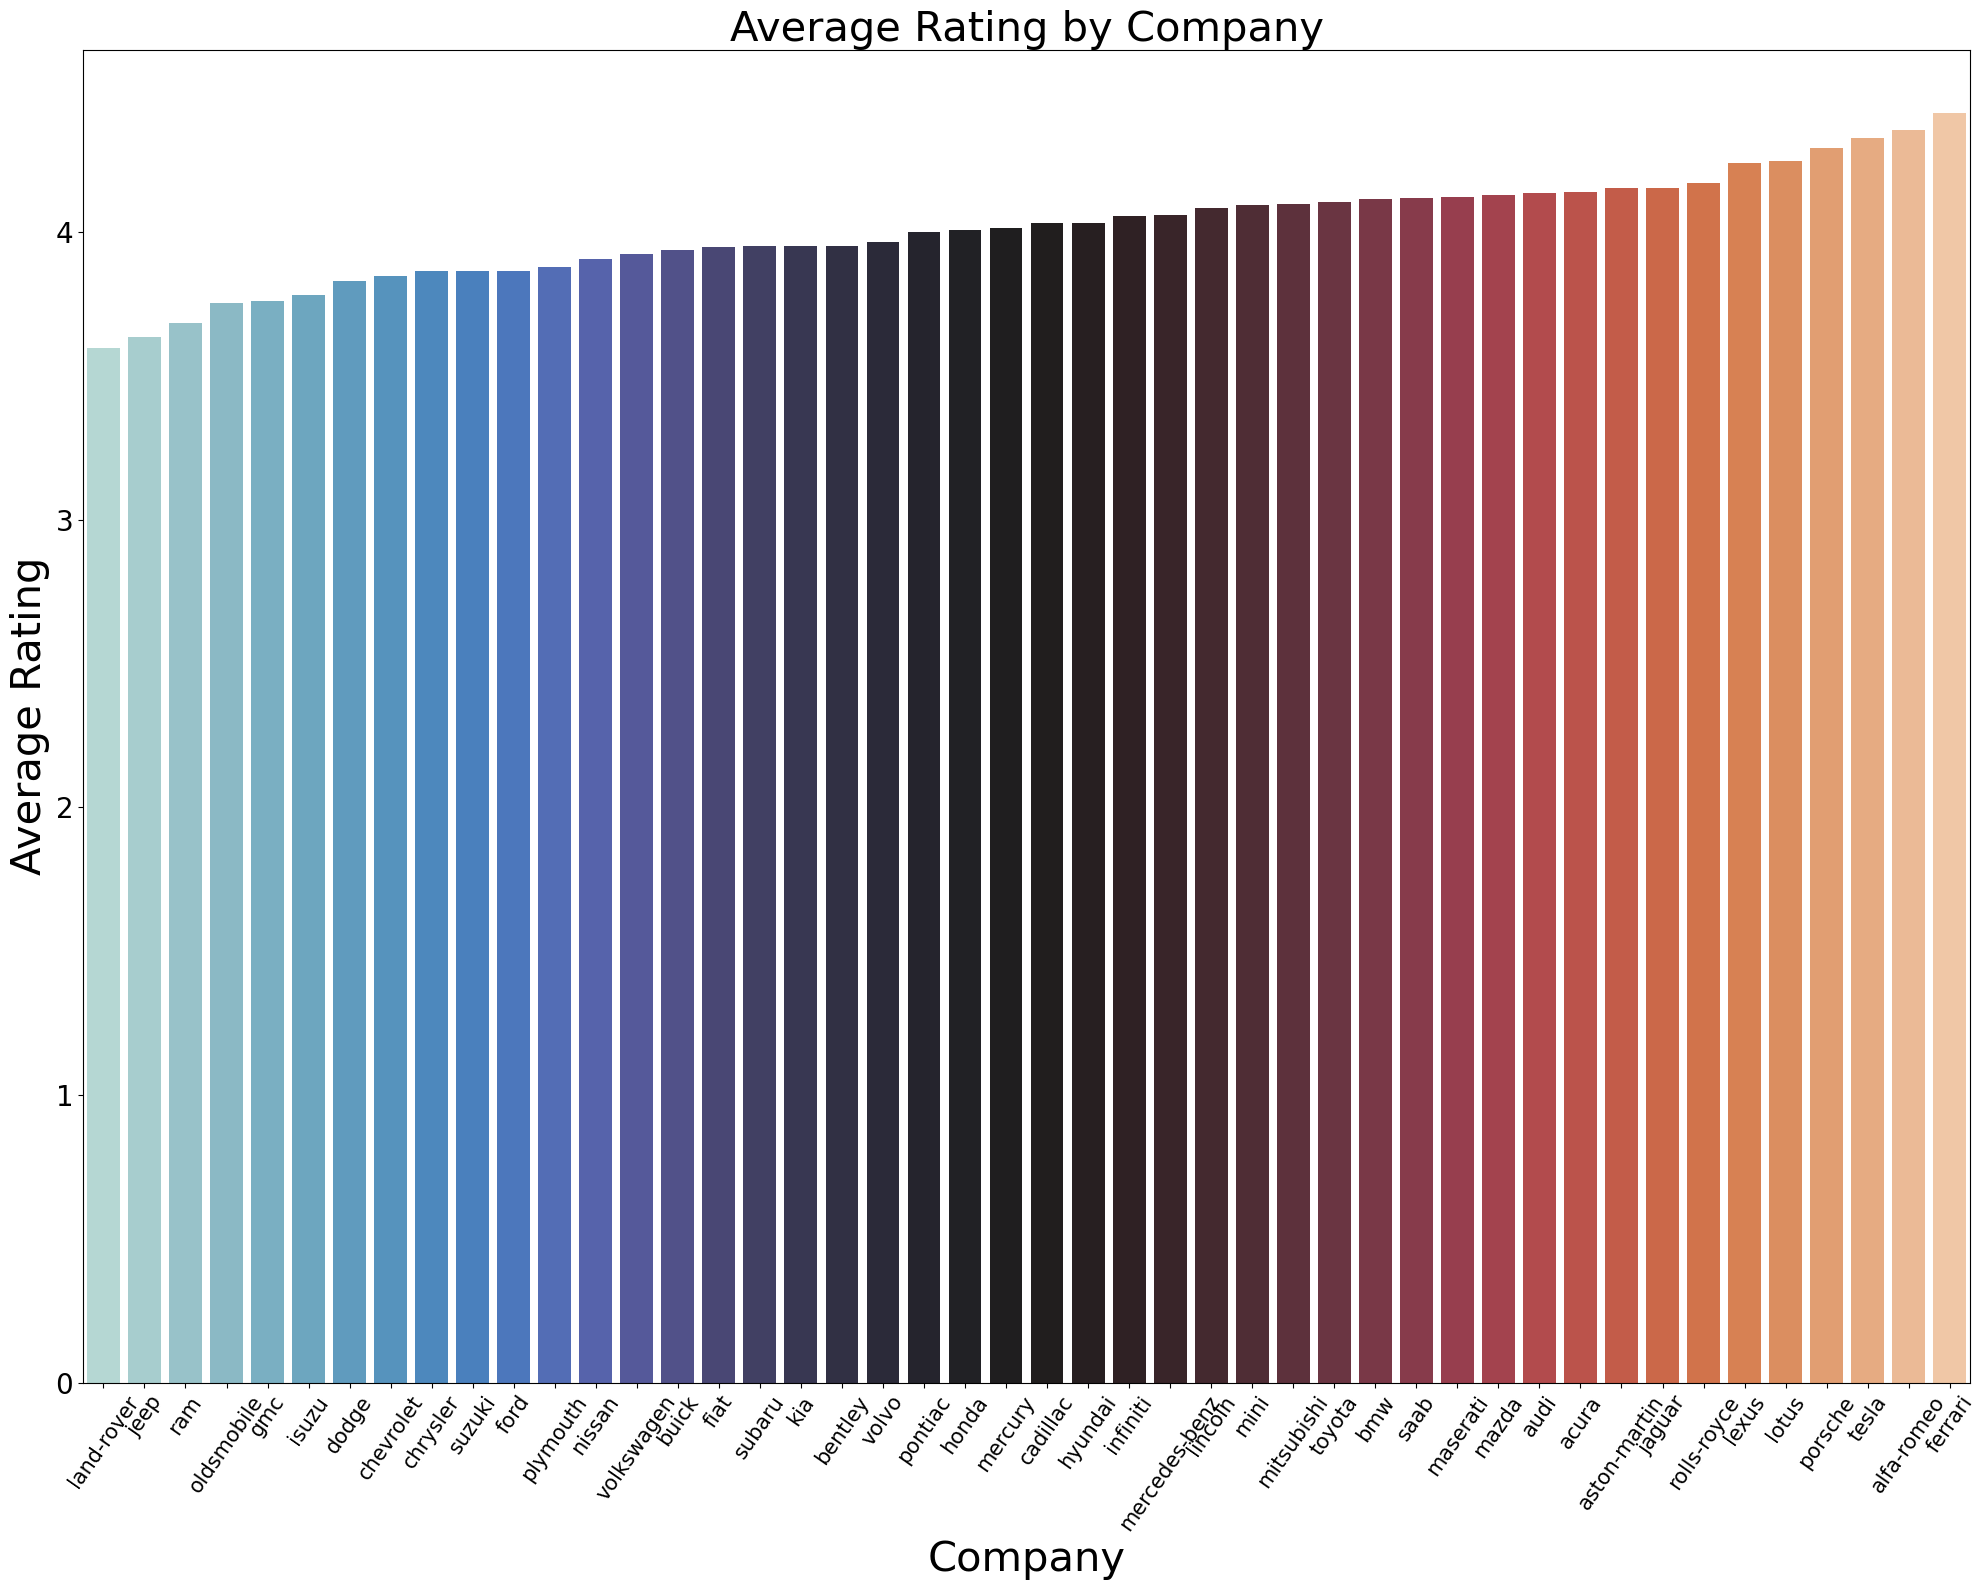

In [66]:
avgratingofcompany = car_ratings.groupby("Company")["Rating"].mean().sort_values()

plt.figure(figsize=(20, 16))
sns.barplot(x=avgratingofcompany.index, y=avgratingofcompany.values, palette="icefire")
plt.xticks(rotation=55,size='15')
plt.yticks(size='20')
plt.xlabel("Company",size='30')
plt.title("Average Rating by Company",size='30')
plt.ylabel("Average Rating",size='30')
plt.tight_layout()
plt.savefig('carratings1.png', bbox_inches='tight')
plt.show()


/var/folders/3d/ybqkjf7x3ts4l77xlcln52l40000gn/T/ipykernel_39990/2749887231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="magma")


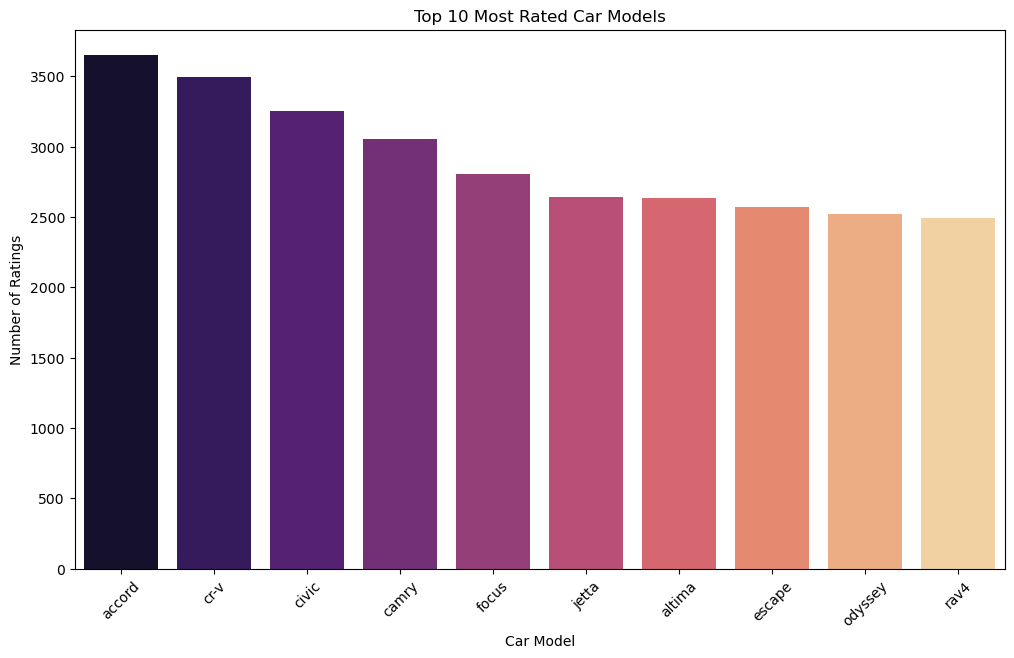

In [67]:
top_models = car_ratings["Model"].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_models.index, y=top_models.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Car Model")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Rated Car Models")
plt.savefig('carratings2.png', bbox_inches='tight')
plt.show()


In [68]:
columns_to_transform=['Year','Rating']
car_ratings_numeric= car_ratings[columns_to_transform]
car_ratings_numeric = car_ratings_numeric.copy()
car_ratings_numeric[columns_to_transform] = car_ratings_numeric[columns_to_transform].astype('float64')
minmax_scaler = MinMaxScaler()
car_ratings_numeric.loc[:, columns_to_transform] = minmax_scaler.fit_transform(car_ratings_numeric[columns_to_transform]) 

In [69]:
print(car_ratings_numeric)

        Year  Rating
0       0.65     1.0
1       0.65     1.0
2       0.65     0.8
3       0.65     0.8
4       0.65     1.0
...      ...     ...
299040  0.80     1.0
299041  0.80     1.0
299042  0.80     1.0
299043  0.80     1.0
299044  0.80     1.0

[298735 rows x 2 columns]


In [70]:
corr_matrix_ratings = car_ratings_numeric.corr()
print(corr_matrix_ratings)

            Year    Rating
Year    1.000000  0.021376
Rating  0.021376  1.000000


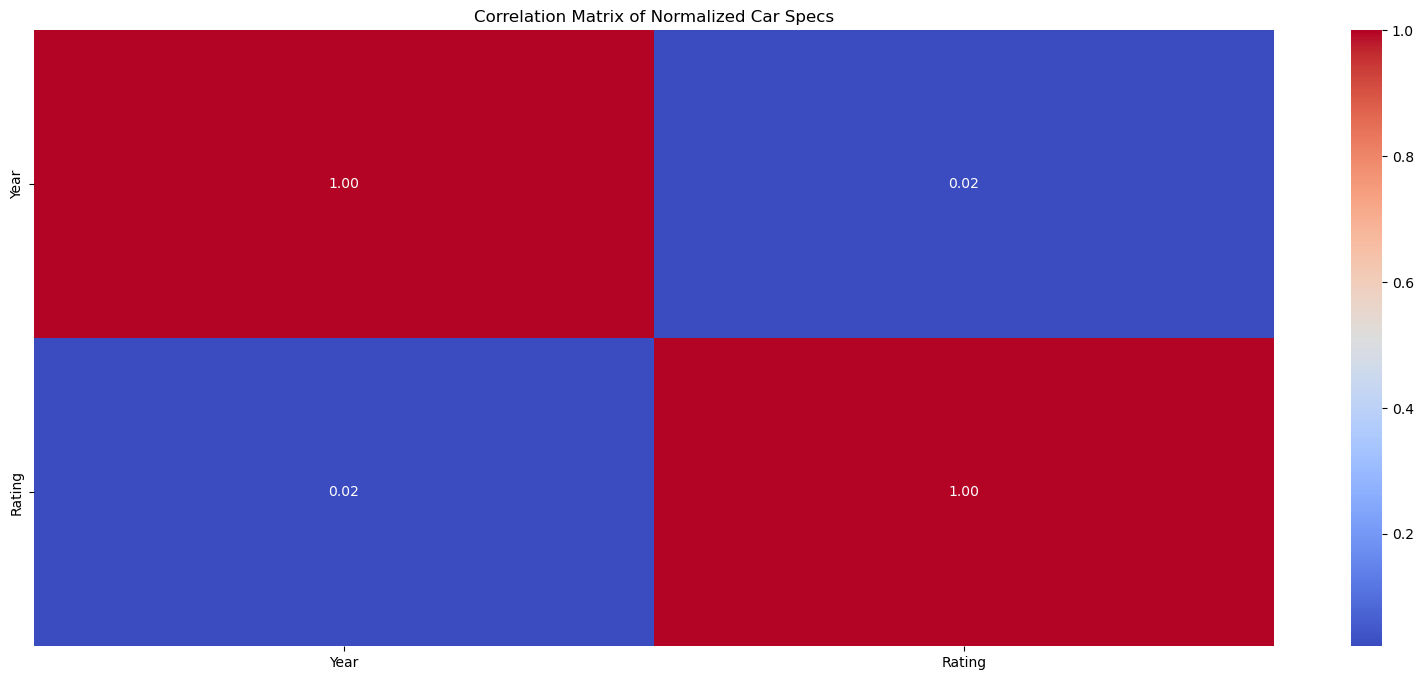

In [71]:
plt.figure(figsize=(20, 8))

sns.heatmap(corr_matrix_ratings, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Normalized Car Specs")
plt.savefig('carratings3.png', bbox_inches='tight')
plt.show()


In [72]:
# Milestone 2 from here

In [73]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Dataframes merging and 
# Feature engineering

In [75]:
print(car_specs)

       id_trim Make     Model    Generation  Year_from  Year_to       Series  \
0            1   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
1            2   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
2            3   AC       ACE  1 generation     1993.0   2000.0    Cabriolet   
3            4   AC       ACE  1 generation     1993.0   2000.0     Roadster   
4            5   AC       ACE  1 generation     1993.0   2000.0     Roadster   
...        ...  ...       ...           ...        ...      ...          ...   
70818    70983   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70819    70984   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70820    70985   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70821    70986   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   
70822    70987   ZX  Landmark  1 generation     2007.0   2009.0  SUV 5 doors   

             Trim  Body_type  number_of

In [76]:
# Display column types and null value counts
print(car_specs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_trim                              70823 non-null  int64  
 1   Make                                 70823 non-null  object 
 2   Model                                70823 non-null  object 
 3   Generation                           70823 non-null  object 
 4   Year_from                            70823 non-null  float64
 5   Year_to                              70823 non-null  float64
 6   Series                               70823 non-null  object 
 7   Trim                                 70823 non-null  object 
 8   Body_type                            70823 non-null  object 
 9   number_of_seats                      70823 non-null  float64
 10  length_mm                            70823 non-null  float64
 11  width_mm                    

In [77]:
print(car_sales)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

In [78]:
# Rename Make column in car_specs to company
car_specs =car_specs.rename(columns={'Make':'Company'})

In [79]:
print(car_specs)

       id_trim Company     Model    Generation  Year_from  Year_to  \
0            1      AC       ACE  1 generation     1993.0   2000.0   
1            2      AC       ACE  1 generation     1993.0   2000.0   
2            3      AC       ACE  1 generation     1993.0   2000.0   
3            4      AC       ACE  1 generation     1993.0   2000.0   
4            5      AC       ACE  1 generation     1993.0   2000.0   
...        ...     ...       ...           ...        ...      ...   
70818    70983      ZX  Landmark  1 generation     2007.0   2009.0   
70819    70984      ZX  Landmark  1 generation     2007.0   2009.0   
70820    70985      ZX  Landmark  1 generation     2007.0   2009.0   
70821    70986      ZX  Landmark  1 generation     2007.0   2009.0   
70822    70987      ZX  Landmark  1 generation     2007.0   2009.0   

            Series        Trim  Body_type  number_of_seats  ...  \
0        Cabriolet      3.5 MT  Cabriolet              2.0  ...   
1        Cabriolet      4

In [80]:
# Display column types
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB
None


In [81]:
# standardize the columns in car_specs and car_sales for merge
for i in [car_specs,car_sales]:
    i["Model"]=i["Model"].str.lower().str.strip()
    i["Company"] = i["Company"].str.lower().str.strip()

In [82]:
#Convert Dates in car_sales dataframe
car_sales["Date"] = pd.to_datetime(car_sales["Date"], errors="coerce")

In [83]:
# New column added to get year
car_sales["Sale_Year"] = car_sales["Date"].dt.year

In [84]:
# merge car_sales and car_specs

rowsmerged = []

for idx, sale in car_sales.iterrows():
    sale_company = sale["Company"]
    sale_model = sale["Model"]
    sale_year = sale["Sale_Year"]

    if pd.isna(sale_year):
        continue  

    # Get specs for this company and model
    specsgroup = car_specs[
        (car_specs["Company"] == sale_company) &
        (car_specs["Model"] == sale_model)
    ]

    if specsgroup.empty:
        continue

    # Check for active generation
    activespecs = specsgroup[
        (specsgroup["Year_from"] <= sale_year) &
        (specsgroup["Year_to"] >= sale_year)
    ]

    if not activespecs.empty:
        selectedspec = active_specs.iloc[0]  # take the first active one
    else:
        # Fallback to closest Year_to
        specsgroup = specsgroup.copy()
        specsgroup["Year_to_diff"] = (specsgroup["Year_to"] - sale_year).abs()
        selectedspec = specsgroup.sort_values("Year_to_diff").iloc[0]

    # Drop any duplicate columns
    sale_cleaned = sale.drop(labels=selectedspec.index.intersection(sale.index), errors='ignore')
    merged_row = pd.concat([sale_cleaned, selectedspec])
    rowsmerged.append(merged_row)

# Build the merged DataFrame
merged_df = pd.DataFrame(rowsmerged)

print("Merged shape:", merged_df.shape)
print(merged_df[["Company", "Model", "Date", "Sale_Year", "Year_from", "Year_to"]].head())

Merged shape: (18956, 64)
    Company       Model       Date  Sale_Year  Year_from  Year_to
0      ford  expedition 2022-01-02       2022     2017.0   2020.0
1     dodge     durango 2022-01-02       2022     2013.0   2020.0
2  cadillac    eldorado 2022-01-02       2022     1992.0   2002.0
3    toyota      celica 2022-01-02       2022     2002.0   2006.0
4     acura          tl 2022-01-02       2022     2008.0   2011.0


In [85]:
print(merged_df)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [86]:
# standardize car_ratings dataframe
car_ratings["Company"] = car_ratings["Company"].str.lower().str.strip()
car_ratings["Model"] = car_ratings["Model"].str.lower().str.strip()

In [87]:
print(car_ratings)

       Company Model  Year Reviewer_Name         Date  \
0        acura   ilx  2013      mahowald   08/12/2012   
1        acura   ilx  2013           VIP   07/26/2016   
2        acura   ilx  2013     bybchucky   09/14/2013   
3        acura   ilx  2013    bayareamom   01/26/2015   
4        acura   ilx  2013   Kerry Olson   03/26/2016   
...        ...   ...   ...           ...          ...   
299040   volvo  xc70  2016    FirstVolvo   03/18/2017   
299041   volvo  xc70  2016           Dhp   01/26/2016   
299042   volvo  xc70  2016        Lisa B   05/03/2016   
299043   volvo  xc70  2016         Milan   05/04/2019   
299044   volvo  xc70  2016  Irving Gates   03/05/2019   

                                         Title  Rating  \
0              Getting 43 Mpg on daily commute       5   
1                                New to me ILX       5   
2                        Excellet Commuter Car       4   
3                Peppy Hybrid that Turns Heads       4   
4        2013 Acura ILX H

In [88]:
#Create new aggregate features initially by grouping model and company on car_ratings dataframe
ratings_agg = car_ratings.groupby(["Company", "Model"]).agg(
    avg_rating=("Rating", "mean"),
    max_rating=("Rating", "max"),
    min_rating=("Rating", "min"),
    num_reviews=("Rating", "count")
).reset_index()

# also have a set for company alone
ratings_agg_company = car_ratings.groupby("Company").agg(
    comp_avg_rating=("Rating", "mean"),
    comp_max_rating=("Rating", "max"),
    comp_min_rating=("Rating", "min"),
    comp_num_reviews=("Rating", "count")
).reset_index()


In [89]:
# Now merging the 3rd dataframe car_ratings

# First do merge on company and model
merged_full = pd.merge(
    merged_df,
    ratings_agg,
    on=["Company", "Model"],
    how="left"  
)

# Also maintain data for company level as well
merged_full = pd.merge(
    merged_full,
    ratings_agg_company,
    on="Company",
    how="left"
)

In [90]:
# Incase the data is not present for company and model combo impute by company ratings

merged_full["avg_rating"] = merged_full["avg_rating"].fillna(merged_full["comp_avg_rating"])
merged_full["max_rating"] = merged_full["max_rating"].fillna(merged_full["comp_max_rating"])
merged_full["min_rating"] = merged_full["min_rating"].fillna(merged_full["comp_min_rating"])
merged_full["num_reviews"] = merged_full["num_reviews"].fillna(merged_full["comp_num_reviews"])

# drop the company-level columns if no longer needed
merged_full.drop(columns=["comp_avg_rating", "comp_max_rating", "comp_min_rating", "comp_num_reviews"], inplace=True)

In [91]:
print(merged_full)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [92]:
car_full = merged_full.copy()

In [93]:
# Has reviews to get boolean reviews present or not

car_full["has_reviews"] = car_full["num_reviews"].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

In [94]:
print(car_full)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [95]:
print(car_full.isnull().sum())

Car_id             0
Date               0
Customer Name      0
Gender             0
Annual Income      0
                ... 
avg_rating       586
max_rating       586
min_rating       586
num_reviews      586
has_reviews        0
Length: 69, dtype: int64


In [96]:
car_full = car_full[car_full['has_reviews'] != 0].reset_index(drop=True)

In [97]:
car_full.to_csv('FullyMerged.csv')

In [98]:
# New features added

In [99]:
car_full["popularity_score"] = car_full["avg_rating"] * np.log1p(car_full["num_reviews"])

In [100]:
car_full["fuel_eff_score"] = (car_full["city_fuel_per_100km_l"].astype(float) + 
                              car_full["highway_fuel_per_100km_l"].astype(float)) / 2

In [101]:
car_full["avg_track_mm"] = (car_full["front_track_mm"] + car_full["rear_track_mm"]) / 2

In [102]:
car_full["displacement_per_cylinder"] = (car_full["capacity_cm3"])/car_full["number_of_cylinders"]

In [103]:
car_full["power_to_weight"] = car_full["engine_hp"] / car_full["curb_weight_kg"]

In [104]:
car_full["volume_mm3"] = (
    car_full["length_mm"] *
    car_full["width_mm"] *
    car_full["height_mm"]
)

In [105]:
# Create a joint target variable
car_full["company_model"] = car_full["Company"] + "_" + car_full["Model"]

# Check the number of unique classes
print("Unique classes:", car_full["company_model"].nunique())


Unique classes: 120


In [106]:
# Encoding and Feature Selection

In [107]:
car_full_analysis = car_full.copy()

In [108]:
car_full.to_csv('main.csv')
car_raw = car_full.copy()

In [109]:
dropcolumns = ["Customer Name","Car_id","Phone", "Dealer_Name", "id_trim","Trim","Dealer_No ","Body Style","Date","Company","Model","Generation"]
car_full_analysis = car_full_analysis.drop(columns=dropcolumns)


In [110]:
# Analyzing unique values to decide the encoding type for categorical data
categorical_cols = car_full_analysis.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    unique_count = car_full_analysis[col].nunique()
    print(f"{col}: {unique_count} unique values")

Gender: 2 unique values
Engine: 2 unique values
Transmission: 2 unique values
Color: 3 unique values
Dealer_Region: 7 unique values
Series: 40 unique values
Body_type: 9 unique values
injection_type: 6 unique values
cylinder_layout: 4 unique values
engine_type: 3 unique values
drive_wheels: 5 unique values
transmission: 4 unique values
back_suspension: 43 unique values
rear_brakes: 3 unique values
front_brakes: 3 unique values
front_suspension: 29 unique values
company_model: 120 unique values


In [111]:
from sklearn.preprocessing import LabelEncoder

# Take categorical columns and exclude company_model target columns
categorical_cols = car_full_analysis.select_dtypes(include=['object']).columns.tolist()
exclude_cols = ["company_model"]
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Label encoding
encoders = {}  # Dictionary to store encoders
for col in categorical_cols:
    le = LabelEncoder()
    car_full_analysis[col] = le.fit_transform(car_full_analysis[col].astype(str))
    encoders[col] = le
print("Encoded Categorical Columns:", categorical_cols)


Encoded Categorical Columns: ['Gender', 'Engine', 'Transmission', 'Color', 'Dealer_Region', 'Series', 'Body_type', 'injection_type', 'cylinder_layout', 'engine_type', 'drive_wheels', 'transmission', 'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension']


In [112]:

# Take numeric columns excluding identifiers
numeric_cols = car_full_analysis.select_dtypes(include=[float, int]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Apply log1p transformation
car_full_analysis[numeric_cols] = car_full_analysis[numeric_cols].apply(lambda col: np.log1p(col))




In [113]:
car_full_analysis

Gender  Annual Income    Engine  Transmission     Color  Price ($)  \
0      0.693147       9.510519  0.000000      0.000000  0.000000  10.165890   
1      0.693147      14.207553  0.000000      0.000000  0.000000   9.852247   
2      0.693147      13.849913  0.693147      0.693147  1.098612  10.357775   
3      0.693147       9.510519  0.693147      0.693147  0.693147   9.546884   
4      0.693147      14.197366  0.000000      0.000000  1.098612  10.106469   
...         ...            ...       ...           ...       ...        ...   
18365  0.693147       9.510519  0.000000      0.000000  0.693147  11.034906   
18366  0.000000      13.555445  0.000000      0.000000  1.098612   9.852247   
18367  0.693147       9.510519  0.693147      0.693147  1.098612   9.392745   
18368  0.000000      13.710151  0.000000      0.000000  0.000000   9.680406   
18369  0.693147       9.510519  0.000000      0.000000  0.000000  10.341775   

       Dealer_Region  Sale_Year  Year_from   Year_to  ...  min_rating  \
0           1.609438   7.612337   7.609862  7.611348  ...    0.693147   
1           0.000000   7.612337   7.607878  7.611348  ...    0.693147   
2           1.098612   7.612337   7.597396  7.602401  ...    0.693147   
3           1.791759   7.612337   7.602401  7.604396  ...    0.693147   
4           1.386294   7.612337   7.605392  7.606885  ...    0.693147   
...              ...        ...        ...       ...  ...         ...   
18365       0.000000   7.612831   7.604894  7.607381  ...    0.693147   
18366       1.098612   7.612831   7.599902  7.601402  ...    0.693147   
18367       1.791759   7.612831   7.598900  7.601902  ...    0.693147   
18368       1.609438   7.612831   7.599902  7.602401  ...    0.693147   
18369       0.693147   7.612831   7.600402  7.601902  ...    1.098612   

       num_reviews  has_reviews  popularity_score  fuel_eff_score  \
0         7.013915     0.693147          3.331802        2.583998   
1         7.183112     0.693147          3.375392        2.691243   
2         4.025352     0.693147          2.872825        2.230014   
3         6.124683     0.693147          3.303383        2.307573   
4         7.506592     0.693147          3.474476        2.489065   
...            ...          ...               ...             ...   
18365     8.467162     0.693147          3.536201        2.341806   
18366     3.806662     0.693147          2.573536        2.240710   
18367     2.639057     0.693147          2.210489        2.429218   
18368     4.990433     0.693147          2.999377        2.282382   
18369     3.663562     0.693147          2.725799        1.871802   

       avg_track_mm  displacement_per_cylinder  power_to_weight  volume_mm3  \
0          7.446001                   6.369330         0.141058   23.823187   
1          7.393878                   6.562091         0.138625   23.596658   
2          7.318871                   6.348483         0.148198   23.325634   
3          7.318871                   6.109248         0.146716   23.018627   
4          7.386471                   6.362166         0.132393   23.330094   
...             ...                        ...              ...         ...   
18365      7.385231                   6.144901         0.101834   23.400475   
18366      7.318871                   6.210600         0.097803   23.152086   
18367      7.386471                   6.207248         0.084920   23.552817   
18368      7.290975                   6.108136         0.104625   23.048050   
18369      7.318871                   6.502790         0.061992   23.076913   

           company_model  
0        ford_expedition  
1          dodge_durango  
2      cadillac_eldorado  
3          toyota_celica  
4               acura_tl  
...                  ...  
18365  buick_park avenue  
18366       ford_contour  
18367   plymouth_voyager  
18368    chevrolet_prizm  
18369    chevrolet_metro  

[18370 rows x 64 columns]

In [114]:
car_full_analysis_f = car_full_analysis.copy()

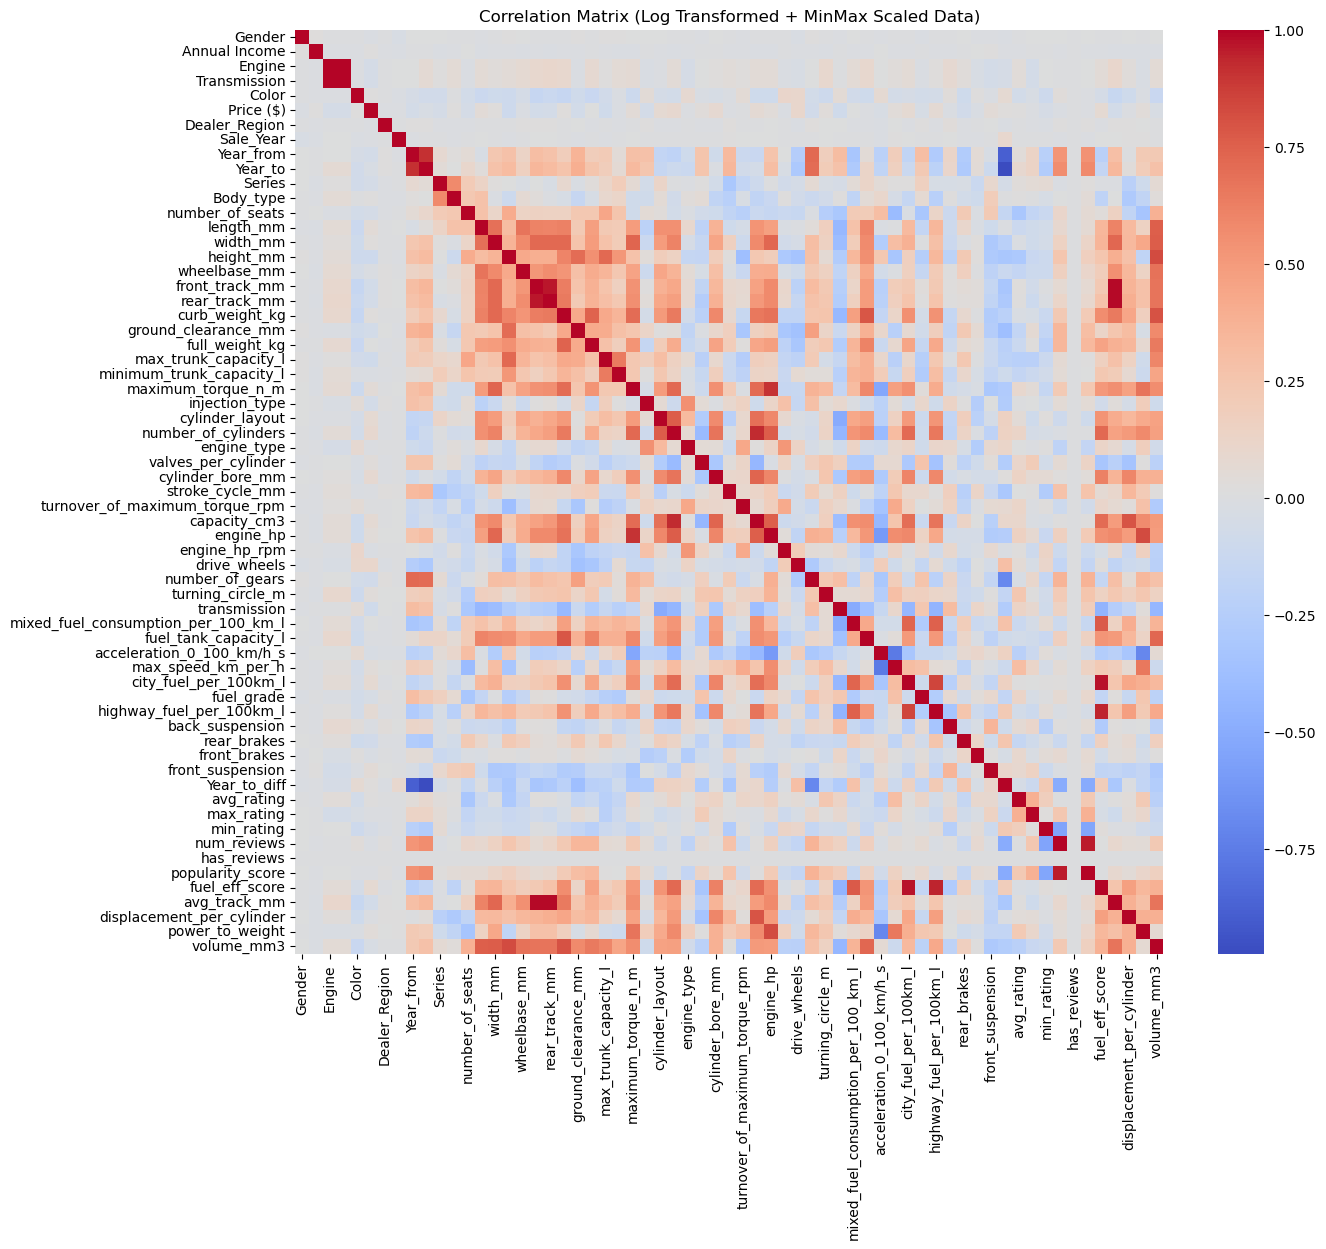

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop identifier columns
df_corr = car_full_analysis.drop(columns=exclude_cols)
corr_matrix = df_corr.corr().fillna(0)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix (Log Transformed + MinMax Scaled Data)")
plt.show()


In [116]:
# Set correlation threshold
threshold = 0.8

# Get the correlation matrix
corr_matrix = car_full_analysis.corr(numeric_only=True)

# Find highly correlated pairs
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr.append({
                "Feature 1": corr_matrix.columns[i],
                "Correlation": corr_value,
                "Feature 2": corr_matrix.columns[j]
                
            })

# Convert to DataFrame
high_corr_df = pd.DataFrame(high_corr).sort_values(by="Correlation", ascending=False)

# Results
print(f"\nHighly Correlated Pairs (|correlation| > {threshold}):")
print(high_corr_df)



Highly Correlated Pairs (|correlation| > 0.8):
                   Feature 1  Correlation                 Feature 2
0                     Engine     1.000000              Transmission
7              rear_track_mm     0.991648              avg_track_mm
6             front_track_mm     0.990118              avg_track_mm
13     city_fuel_per_100km_l     0.976215            fuel_eff_score
5             front_track_mm     0.963764             rear_track_mm
15               num_reviews     0.956753          popularity_score
14  highway_fuel_per_100km_l     0.944854            fuel_eff_score
10       number_of_cylinders     0.926164              capacity_cm3
1                  Year_from     0.915151                   Year_to
9         maximum_torque_n_m     0.900108                 engine_hp
12     city_fuel_per_100km_l     0.851691  highway_fuel_per_100km_l
4                  height_mm     0.824555                volume_mm3
11                 engine_hp     0.823648           power_to_weight


In [117]:
# Chi-Square Test 

from scipy.stats import chi2_contingency
import pandas as pd

print("\nChi-Square Test Results (Categorical Features vs company_model):")

chi_square_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(car_full_analysis[col], car_full_analysis["company_model"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append((col, chi2, p))

# Create results DataFrame
chi_square_df = pd.DataFrame(chi_square_results, columns=["Feature", "Chi2 Statistic", "P-Value"])
chi_square_df.sort_values(by="P-Value", inplace=True)

print("\nAll Chi-Square Test Results:")
print(chi_square_df)



Chi-Square Test Results (Categorical Features vs company_model):

All Chi-Square Test Results:
             Feature  Chi2 Statistic   P-Value
1             Engine     6058.326584  0.000000
2       Transmission     6058.326584  0.000000
3              Color     7102.810845  0.000000
5             Series   716430.000000  0.000000
6          Body_type   146960.000000  0.000000
7     injection_type    91850.000000  0.000000
8    cylinder_layout    55110.000000  0.000000
9        engine_type    36740.000000  0.000000
10      drive_wheels    73480.000000  0.000000
11      transmission    55110.000000  0.000000
12   back_suspension   771540.000000  0.000000
13       rear_brakes    36740.000000  0.000000
14      front_brakes    36740.000000  0.000000
15  front_suspension   514360.000000  0.000000
4      Dealer_Region      857.671106  0.000165
0             Gender      125.771603  0.317783


In [118]:
print("\nSignificant Categorical Features (p < 0.05):")
significant_features = chi_square_df[chi_square_df["P-Value"] < 0.05]
print(significant_features)


Significant Categorical Features (p < 0.05):
             Feature  Chi2 Statistic   P-Value
1             Engine     6058.326584  0.000000
2       Transmission     6058.326584  0.000000
3              Color     7102.810845  0.000000
5             Series   716430.000000  0.000000
6          Body_type   146960.000000  0.000000
7     injection_type    91850.000000  0.000000
8    cylinder_layout    55110.000000  0.000000
9        engine_type    36740.000000  0.000000
10      drive_wheels    73480.000000  0.000000
11      transmission    55110.000000  0.000000
12   back_suspension   771540.000000  0.000000
13       rear_brakes    36740.000000  0.000000
14      front_brakes    36740.000000  0.000000
15  front_suspension   514360.000000  0.000000
4      Dealer_Region      857.671106  0.000165


In [119]:
# Based on the correlation, chi square test and new features

columns_to_drop = ["Engine","maximum_torque_n_m","engine_hp","rear_track_mm","front_track_mm","num_reviews","curb_weight_kg","Year_from","length_mm","width_mm","height_mm","Year_to","Year_to_diff","maximum_torque_n_m","Dealer_Region","number_of_cylinders","capacity_cm3","city_fuel_per_100km_l","highway_fuel_per_100km_l","Gender"]
car_full_analysis = car_full_analysis.drop(columns=columns_to_drop)

In [120]:
car_full_analysis

Annual Income  Transmission     Color  Price ($)  Sale_Year    Series  \
0           9.510519      0.000000  0.000000  10.165890   7.612337  3.218876   
1          14.207553      0.000000  0.000000   9.852247   7.612337  3.218876   
2          13.849913      0.693147  1.098612  10.357775   7.612337  2.079442   
3           9.510519      0.693147  0.693147   9.546884   7.612337  2.772589   
4          14.197366      0.000000  1.098612  10.106469   7.612337  3.367296   
...              ...           ...       ...        ...        ...       ...   
18365       9.510519      0.000000  0.693147  11.034906   7.612831  3.367296   
18366      13.555445      0.000000  1.098612   9.852247   7.612831  3.367296   
18367       9.510519      0.693147  1.098612   9.392745   7.612831  2.639057   
18368      13.710151      0.000000  0.000000   9.680406   7.612831  3.367296   
18369       9.510519      0.000000  0.000000  10.341775   7.612831  2.708050   

       Body_type  number_of_seats  wheelbase_mm  ground_clearance_mm  ...  \
0       1.098612         2.079442      8.114923             5.517453  ...   
1       1.098612         1.945910      8.020599             5.337538  ...   
2       1.945910         1.791759      7.917172             5.017280  ...   
3       1.945910         1.609438      7.863651             5.017280  ...   
4       1.945910         1.791759      7.928766             5.017280  ...   
...          ...              ...           ...                  ...  ...   
18365   1.945910         1.791759      8.009695             5.017280  ...   
18366   1.945910         1.791759      7.902857             5.017280  ...   
18367   1.609438         2.079442      8.016648             4.948760  ...   
18368   1.945910         1.791759      7.809947             4.795791  ...   
18369   1.386294         1.791759      7.888335             5.081404  ...   

       max_rating  min_rating  has_reviews  popularity_score  fuel_eff_score  \
0        1.791759    0.693147     0.693147          3.331802        2.583998   
1        1.791759    0.693147     0.693147          3.375392        2.691243   
2        1.791759    0.693147     0.693147          2.872825        2.230014   
3        1.791759    0.693147     0.693147          3.303383        2.307573   
4        1.791759    0.693147     0.693147          3.474476        2.489065   
...           ...         ...          ...               ...             ...   
18365    1.791759    0.693147     0.693147          3.536201        2.341806   
18366    1.791759    0.693147     0.693147          2.573536        2.240710   
18367    1.609438    0.693147     0.693147          2.210489        2.429218   
18368    1.791759    0.693147     0.693147          2.999377        2.282382   
18369    1.791759    1.098612     0.693147          2.725799        1.871802   

       avg_track_mm  displacement_per_cylinder  power_to_weight  volume_mm3  \
0          7.446001                   6.369330         0.141058   23.823187   
1          7.393878                   6.562091         0.138625   23.596658   
2          7.318871                   6.348483         0.148198   23.325634   
3          7.318871                   6.109248         0.146716   23.018627   
4          7.386471                   6.362166         0.132393   23.330094   
...             ...                        ...              ...         ...   
18365      7.385231                   6.144901         0.101834   23.400475   
18366      7.318871                   6.210600         0.097803   23.152086   
18367      7.386471                   6.207248         0.084920   23.552817   
18368      7.290975                   6.108136         0.104625   23.048050   
18369      7.318871                   6.502790         0.061992   23.076913   

           company_model  
0        ford_expedition  
1          dodge_durango  
2      cadillac_eldorado  
3          toyota_celica  
4               acura_tl  
...                  ...  
18365  buick_park aven

In [121]:
car_full_analysis.to_csv('car_full_after.csv')


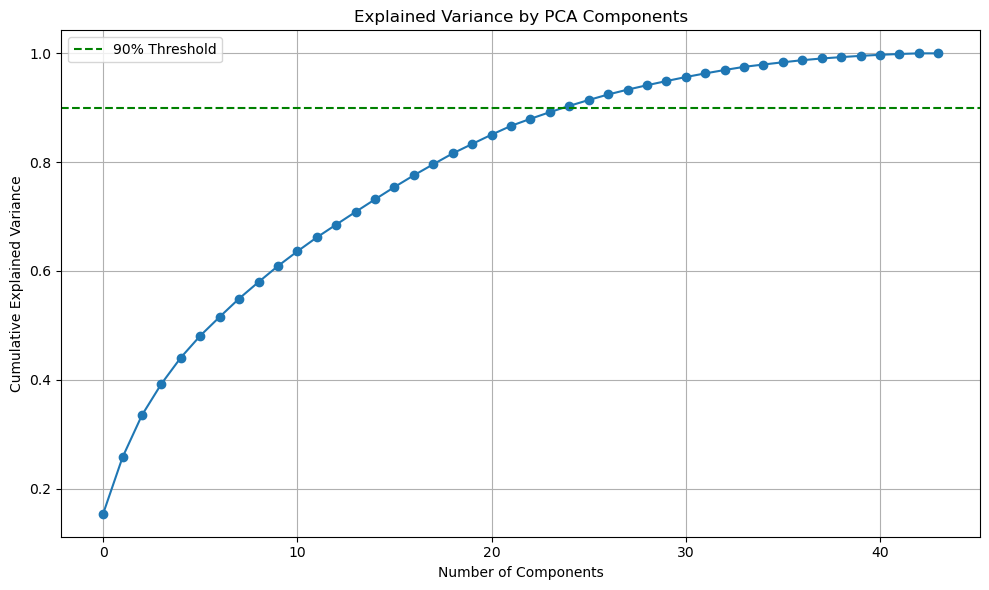

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define target & feature columns
targetcol = 'company_model'
featurecols = [
    'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year', 'Series', 
    'Body_type', 'number_of_seats', 'wheelbase_mm', 'ground_clearance_mm', 'full_weight_kg', 
    'max_trunk_capacity_l', 'minimum_trunk_capacity_l', 'injection_type', 'cylinder_layout', 
    'engine_type', 'valves_per_cylinder', 'cylinder_bore_mm', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm', 
    'engine_hp_rpm', 'drive_wheels', 'number_of_gears', 'turning_circle_m', "transmission",
    'mixed_fuel_consumption_per_100_km_l', 'fuel_tank_capacity_l', 'acceleration_0_100_km/h_s', 
    'max_speed_km_per_h', 'fuel_grade', 'back_suspension', 'rear_brakes', 'front_brakes', 
    'front_suspension', 'avg_rating', 'max_rating', 'min_rating', 'has_reviews', 'power_to_weight',
    'popularity_score', 'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder', 'volume_mm3'
]

# Standardize features
X = car_full_analysis[featurecols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
# Get feature contributions to each component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(featurecols))], index=featurecols)

# Sum of absolute contributions across top N components
top_n = 25
featureimportance = loadings.iloc[:, :top_n].abs().sum(axis=1).sort_values(ascending=False)

# Show top and bottom contributing features
print("\n Top contributing features:")
print(featureimportance.head(15))

print("\n Least contributing features:")
print(featureimportance.tail(15))



 Top contributing features:
Color                  4.025011
turning_circle_m       3.852478
back_suspension        3.540400
Price ($)              3.538462
Transmission           3.485036
stroke_cycle_mm        3.446047
max_rating             3.419310
front_brakes           3.346994
rear_brakes            3.344755
front_suspension       3.194417
transmission           3.164847
valves_per_cylinder    3.124046
wheelbase_mm           3.087477
engine_hp_rpm          3.080328
fuel_grade             3.075723
dtype: float64

 Least contributing features:
mixed_fuel_consumption_per_100_km_l    2.475112e+00
injection_type                         2.470964e+00
cylinder_layout                        2.450558e+00
fuel_eff_score                         2.398878e+00
Annual Income                          2.387674e+00
max_speed_km_per_h                     2.331226e+00
cylinder_bore_mm                       2.295983e+00
engine_type                            2.277315e+00
acceleration_0_100_km/h_s    

In [124]:
# Removing few more features after PCA
columns_to_drop = ["acceleration_0_100_km/h_s","Series","number_of_gears","has_reviews","ground_clearance_mm","cylinder_bore_mm","mixed_fuel_consumption_per_100_km_l","cylinder_layout","minimum_trunk_capacity_l"]
car_full_analysis = car_full_analysis.drop(columns=columns_to_drop)

In [125]:
car_full_analysis

Annual Income  Transmission     Color  Price ($)  Sale_Year  Body_type  \
0           9.510519      0.000000  0.000000  10.165890   7.612337   1.098612   
1          14.207553      0.000000  0.000000   9.852247   7.612337   1.098612   
2          13.849913      0.693147  1.098612  10.357775   7.612337   1.945910   
3           9.510519      0.693147  0.693147   9.546884   7.612337   1.945910   
4          14.197366      0.000000  1.098612  10.106469   7.612337   1.945910   
...              ...           ...       ...        ...        ...        ...   
18365       9.510519      0.000000  0.693147  11.034906   7.612831   1.945910   
18366      13.555445      0.000000  1.098612   9.852247   7.612831   1.945910   
18367       9.510519      0.693147  1.098612   9.392745   7.612831   1.609438   
18368      13.710151      0.000000  0.000000   9.680406   7.612831   1.945910   
18369       9.510519      0.000000  0.000000  10.341775   7.612831   1.386294   

       number_of_seats  wheelbase_mm  full_weight_kg  max_trunk_capacity_l  \
0             2.079442      8.114923        7.576097              8.143517   
1             1.945910      8.020599        8.077758              7.780721   
2             1.791759      7.917172        7.576097              6.803505   
3             1.609438      7.863651        7.356280              6.803505   
4             1.791759      7.928766        7.576097              6.803505   
...                ...           ...             ...                   ...   
18365         1.791759      8.009695        7.576097              6.226537   
18366         1.791759      7.902857        7.313887              6.803505   
18367         2.079442      8.016648        7.576097              8.339501   
18368         1.791759      7.809947        7.576097              5.840642   
18369         1.791759      7.888335        7.069874              6.458338   

       ...  avg_rating  max_rating  min_rating  popularity_score  \
0      ...    1.578542    1.791759    0.693147          3.331802   
1      ...    1.595512    1.791759    0.693147          3.375392   
2      ...    1.638114    1.791759    0.693147          2.872825   
3      ...    1.663644    1.791759    0.693147          3.303383   
4      ...    1.642316    1.791759    0.693147          3.474476   
...    ...         ...         ...         ...               ...   
18365  ...    1.596782    1.791759    0.693147          3.536201   
18366  ...    1.430746    1.791759    0.693147          2.573536   
18367  ...    1.405343    1.609438    0.693147          2.210489   
18368  ...    1.573172    1.791759    0.693147          2.999377   
18369  ...    1.588161    1.791759    1.098612          2.725799   

       fuel_eff_score  avg_track_mm  displacement_per_cylinder  \
0            2.583998      7.446001                   6.369330   
1            2.691243      7.393878                   6.562091   
2            2.230014      7.318871                   6.348483   
3            2.307573      7.318871                   6.109248   
4            2.489065      7.386471                   6.362166   
...               ...           ...                        ...   
18365        2.341806      7.385231                   6.144901   
18366        2.240710      7.318871                   6.210600   
18367        2.429218      7.386471                   6.207248   
18368        2.282382      7.290975                   6.108136   
18369        1.871802      7.318871                   6.502790   

       power_to_weight  volume_mm3      company_model  
0             0.141058   23.823187    ford_expedition  
1             0.138625   23.596658      dodge_durango  
2             0.148198   23.325634  cadillac_eldorado  
3             0.146716   23.018627      toyota_celica  
4             0.132393   23.330094           acura_tl  
...                ...         ...                ...  
18365         0.101834   23.400475  buick_park avenue  
18366         0.097803   23.152086     

In [126]:
car_full_analysis.to_csv('car_full_analysis_final.csv')

In [127]:
car_full_analysis_m = car_full_analysis.copy()

In [128]:
numeric_cols = car_full_analysis.select_dtypes(include=[float, int]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

In [129]:
# Apply MinMax scaling
scaler_m = MinMaxScaler()


car_full_analysis[numeric_cols] = scaler_m.fit_transform(car_full_analysis[numeric_cols])
car_full_analysis

Annual Income  Transmission    Color  Price ($)  Sale_Year  Body_type  \
0           0.000000           0.0  0.00000   0.720326        0.0   0.500000   
1           0.698869           0.0  0.00000   0.646853        0.0   0.500000   
2           0.645656           1.0  1.00000   0.765275        0.0   0.885622   
3           0.000000           1.0  0.63093   0.575321        0.0   0.885622   
4           0.697354           0.0  1.00000   0.706406        0.0   0.885622   
...              ...           ...      ...        ...        ...        ...   
18365       0.000000           0.0  0.63093   0.923896        1.0   0.885622   
18366       0.601842           0.0  1.00000   0.646853        1.0   0.885622   
18367       0.000000           1.0  1.00000   0.539213        1.0   0.732487   
18368       0.624861           0.0  0.00000   0.606599        1.0   0.885622   
18369       0.000000           0.0  0.00000   0.761527        1.0   0.630930   

       number_of_seats  wheelbase_mm  full_weight_kg  max_trunk_capacity_l  \
0             1.000000      0.889177        0.479488              0.940022   
1             0.863859      0.782715        0.954655              0.831629   
2             0.706695      0.665979        0.479488              0.539666   
3             0.520810      0.605571        0.271280              0.539666   
4             0.706695      0.679065        0.479488              0.539666   
...                ...           ...             ...                   ...   
18365         0.706695      0.770408        0.479488              0.367285   
18366         0.706695      0.649822        0.231126              0.539666   
18367         1.000000      0.778256        0.479488              0.998576   
18368         0.706695      0.544956        0.479488              0.251991   
18369         0.706695      0.633430        0.000000              0.436541   

       ...  avg_rating  max_rating  min_rating  popularity_score  \
0      ...    0.535619         1.0    0.500000          0.720442   
1      ...    0.587911         1.0    0.500000          0.748449   
2      ...    0.719192         1.0    0.500000          0.425550   
3      ...    0.797864         1.0    0.500000          0.702183   
4      ...    0.732143         1.0    0.500000          0.812110   
...    ...         ...         ...         ...               ...   
18365  ...    0.591825         1.0    0.500000          0.851768   
18366  ...    0.080176         1.0    0.500000          0.233257   
18367  ...    0.001894         0.0    0.500000          0.000000   
18368  ...    0.519069         1.0    0.500000          0.506859   
18369  ...    0.565258         1.0    0.792481          0.331086   

       fuel_eff_score  avg_track_mm  displacement_per_cylinder  \
0            0.770225      0.686668                   0.586806   
1            0.876712      0.500426                   0.806149   
2            0.418744      0.232419                   0.563085   
3            0.495754      0.232419                   0.290858   
4            0.675963      0.473959                   0.578654   
...               ...           ...                        ...   
18365        0.529745      0.469529                   0.331428   
18366        0.429364      0.232419                   0.406187   
18367        0.616539      0.473959                   0.402373   
18368        0.470742      0.132743                   0.289593   
18369        0.063064      0.232419                   0.738671   

       power_to_weight  volume_mm3      company_model  
0             0.298518    0.846851    ford_expedition  
1             0.289332    0.611861      dodge_durango  
2             0.325477    0.330714  cadillac_eldorado  
3             0.319880    0.012239      toyota_celica  
4             0.265805    0.335340           acura_tl  
...                ...         ...                ...  
18365         0.150428    0.408350  buick_park avenue  
18366         0.135206    0.150683       ford_conto

In [130]:
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = car_full_analysis.drop(columns=['company_model'])  # Features
y = car_full_analysis['company_model']  # Target (Company_model)

# Split the data into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 12859
Test set size: 5511


In [131]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# Supervised Learning

In [133]:
# Logistic regression
lrmodel = LogisticRegression(max_iter=1000, random_state=42)

# Train model
lrmodel.fit(X_train, y_train)

# Predict output
lrpreds = lrmodel.predict(X_test)

In [134]:
# Random Forest Classifier
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

#Train model
rfmodel.fit(X_train, y_train)

# Predict output
rfpreds = rfmodel.predict(X_test)

In [135]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=8)

# Train the model
knnmodel.fit(X_train, y_train)

# Make predictions
knnpreds = knnmodel.predict(X_test)

In [136]:
# Model evaluation function to compare supervised learnings
def evaluate_model(y_true, y_pred, model, modelname):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{modelname} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")



In [137]:
# Evaluate each model
evaluate_model(y_test, lrpreds, lrmodel, "Logistic Regression")
evaluate_model(y_test, rfpreds, rfmodel, "Random Forest")
evaluate_model(y_test, knnpreds, knnmodel, "KNN")

Logistic Regression - Accuracy: 0.9782, Precision: 0.9770, Recall: 0.9782, F1-score: 0.9764
Random Forest - Accuracy: 0.9301, Precision: 0.9009, Recall: 0.9301, F1-score: 0.9103
KNN - Accuracy: 0.9759, Precision: 0.9774, Recall: 0.9759, F1-score: 0.9754


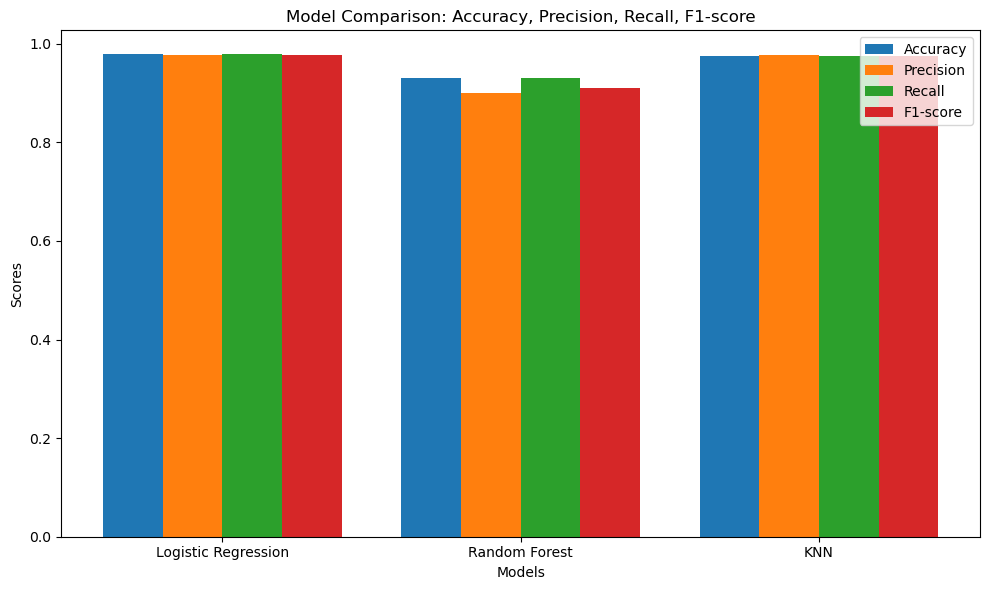

In [437]:
import matplotlib.pyplot as plt
import numpy as np

# Model evaluation metrics
models = ['Logistic Regression', 'Random Forest', 'KNN']

accuracy = [0.9782, 0.9301, 0.9759]
precision = [0.9770, 0.9009, 0.9774]
recall = [0.9782, 0.9301, 0.9759]
f1 = [0.9764, 0.9103, 0.9754]

# figures
x = np.arange(len(models)) 
width = 0.2 

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1, width, label='F1-score')

# Labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [139]:
# ROC curve

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


In [141]:
# Binarize the output for ROC
from sklearn.preprocessing import LabelEncoder

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


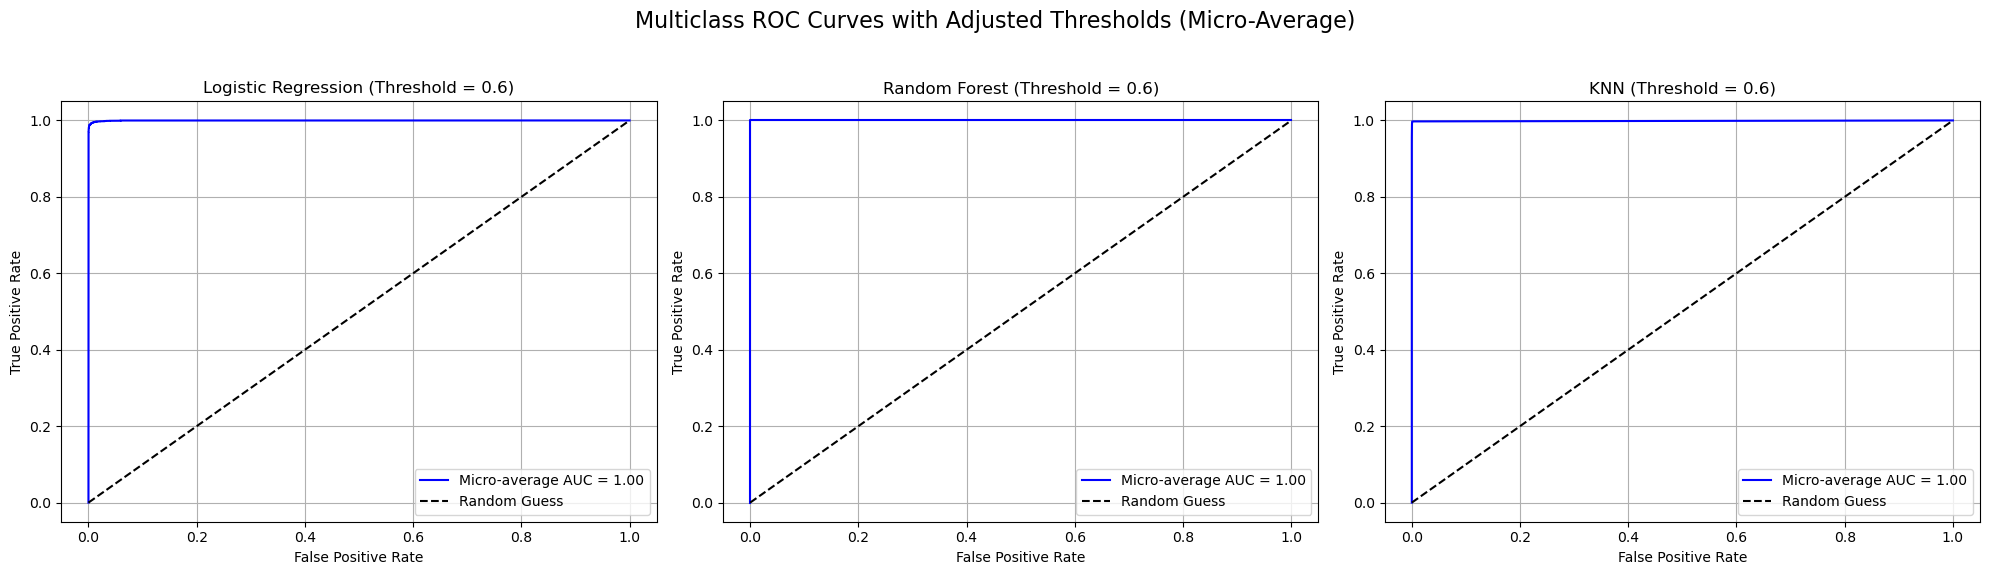

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Binarize the test labels (already done)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Define models
models = {
    'Logistic Regression': lrmodel,
    'Random Forest': rfmodel,
    'KNN': knnmodel
}

# Create subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
threshold = 0.6  # You can still experiment with this for predictions

# ROC for each model
for ax, (name, model) in zip(axes, models.items()):
   
    ovr = OneVsRestClassifier(model)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average AUC = {roc_auc["micro"]:.2f}', color='blue')

    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_title(f'{name} (Threshold = {threshold})')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.suptitle('Multiclass ROC Curves with Adjusted Thresholds (Micro-Average)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [143]:
# Unsupervised learning 

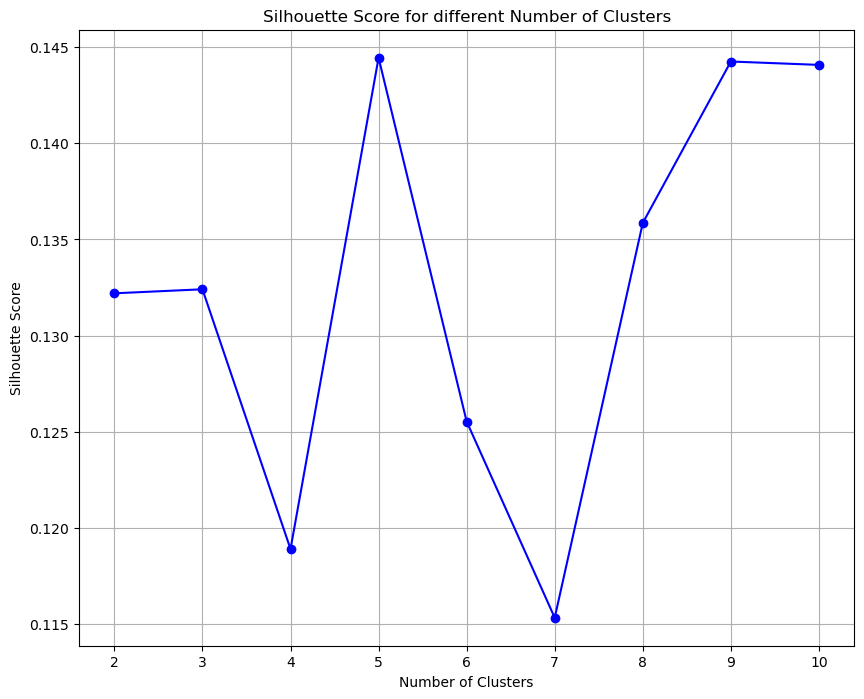

Optimal number of clusters: 5


In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# The range of clusters to test
k_range = range(2, 11)

# scores array
silhouette_scores = []

# Loop through the number of clusters and fit KMeans
for k in k_range:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(X)  
    
    # Calculate the silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 8))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Get the optimal number of clusters (k)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")


In [145]:
# K means 

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [147]:
# Apply KMeans to all data
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
car_full_analysis['Cluster'] = kmeans.fit_predict(X)

In [148]:
def get_cluster_for_predicted_car(predicted_label, car_data):
    company_model = predicted_label
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['Cluster'].values[0]
    return predicted_car_cluster, company_model


In [149]:
def recommend_similar_cars(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car(predicted_label, car_data)
    similar_cars = car_data[car_data['Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)','Annual Income']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [150]:
recommended_cars, company_model = recommend_similar_cars(lrpreds[4431], car_full_analysis)

In [151]:
print(f"Recommended cars based on predicted company_model: - {company_model} ")
print("using Kmeans clustering")
print(recommended_cars)
print(f"Predicted car: {lrpreds[4431]}")

Recommended cars based on predicted company_model: - plymouth_voyager 
using Kmeans clustering
               company_model     score
7420   chevrolet_monte carlo  3.535501
4075     toyota_land cruiser  3.330770
9435           dodge_durango  3.219554
17618      cadillac_escalade  3.213860
6065      pontiac_grand prix  3.208880
Predicted car: plymouth_voyager


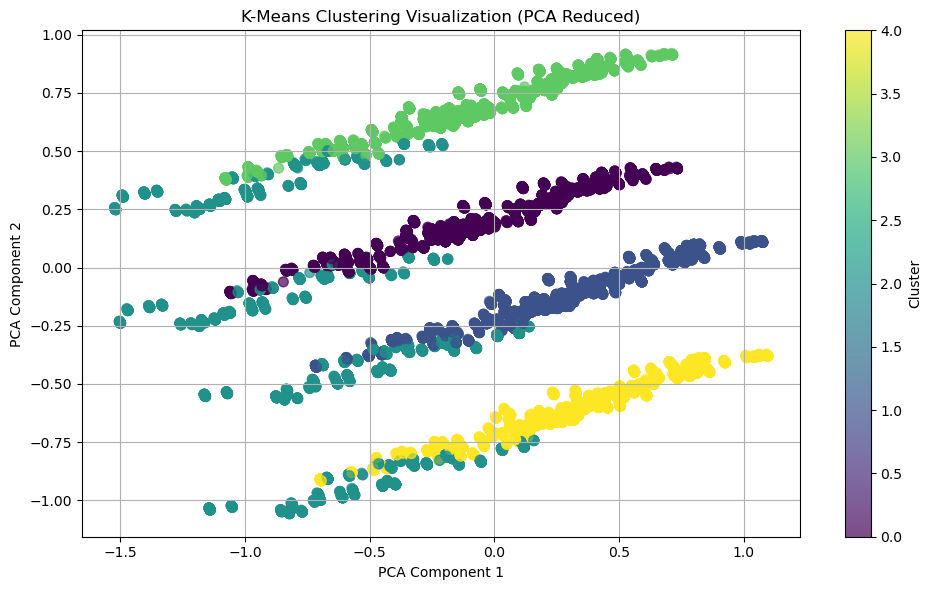

In [152]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to the dataframe
car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [153]:
#  Agglomerative clustering

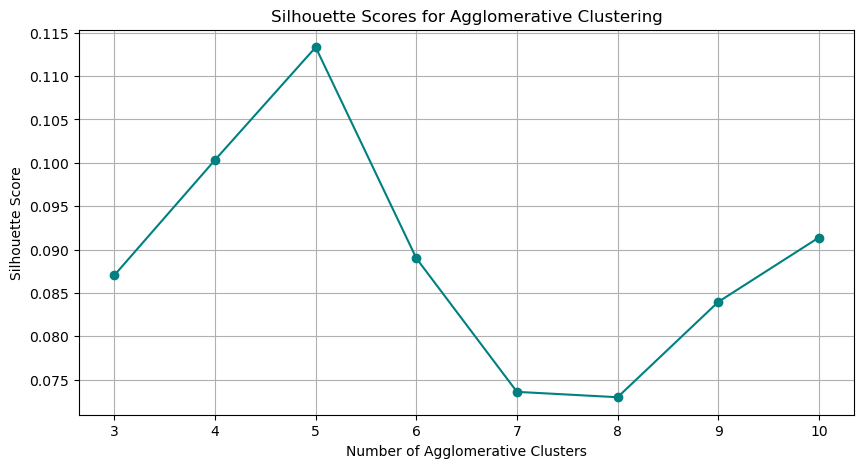

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming X is already scaled

silhouette_scores = []
n_clusters_range = range(3, 11)

for n_clusters in n_clusters_range:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglom.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, silhouette_scores, marker='o', color='teal')
plt.xlabel("Number of Agglomerative Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering")
plt.grid(True)
plt.show()

In [155]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with "5" from silhoutte method
agglo = AgglomerativeClustering(n_clusters=5)
car_full_analysis['Agglo_Cluster'] = agglo.fit_predict(X)

In [156]:
def get_cluster_for_predicted_car_agg(predicted_label, car_data):
    company_model = predicted_label
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['Agglo_Cluster'].values[0]
    return predicted_car_cluster, company_model


In [157]:
def recommend_similar_cars_agg(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car_agg(predicted_label, car_data)
    similar_cars = car_data[car_data['Agglo_Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars_agg = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars_agg[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [158]:
recommended_cars_agg, company_model = recommend_similar_cars_agg(lrpreds[567], car_full_analysis)

In [159]:
print(f"Recommended cars based on predicted company_model:  {company_model} ")
print("using agglomerative clustering")
print(recommended_cars_agg)
print(f"Predicted car: {lrpreds[567]}")

Recommended cars based on predicted company_model:  pontiac_sunfire 
using agglomerative clustering
             company_model     score
7607           ford_taurus  2.418975
661     oldsmobile_cutlass  2.287905
15847  lincoln_continental  2.280191
494          toyota_sienna  2.240989
3776             volvo_c70  2.229040
Predicted car: pontiac_sunfire


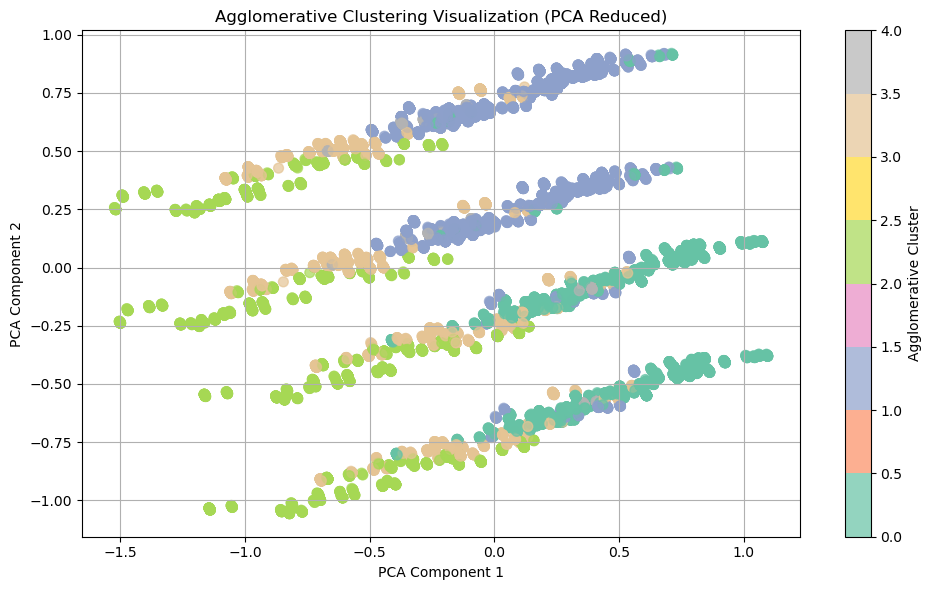

In [160]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 2: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Store PCA values for plotting
car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['Agglo_Cluster'],
    cmap='Set2',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Agglomerative Cluster')
plt.title("Agglomerative Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

    

In [161]:
# GMM clustering

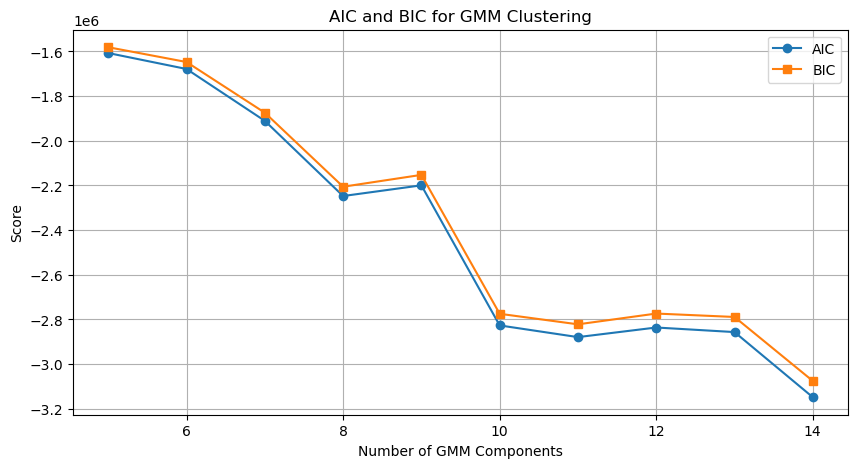

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

aic_scores = []
bic_scores = []
n_components_range = range(5, 15)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

# Plot AIC and BIC to find the optimal number of components
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_scores, marker='o', label='AIC')
plt.plot(n_components_range, bic_scores, marker='s', label='BIC')
plt.xlabel("Number of GMM Components")
plt.ylabel("Score")
plt.title("AIC and BIC for GMM Clustering")
plt.legend()
plt.grid(True)
plt.show()


In [163]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=14, random_state=42)  
car_full_analysis['GMM_Cluster'] = gmm.fit_predict(X)

In [164]:
def get_cluster_for_predicted_car_gmm(predicted_label, car_data):
    company_model = predicted_label
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['GMM_Cluster'].values[0]
    return predicted_car_cluster, company_model


In [165]:
def recommend_similar_cars_gmm(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car_gmm(predicted_label, car_data)
    similar_cars = car_data[car_data['GMM_Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)','Annual Income']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars_gmm = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars_gmm[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [166]:
recommended_cars_gmm, company_model = recommend_similar_cars_gmm(lrpreds[4321], car_full_analysis)

In [167]:
print(f"Recommended cars based on company_model: {company_model}")
print("using GMM clustering")
print(recommended_cars_gmm)
print(f"Predicted car: {lrpreds[4321]}")

Recommended cars based on company_model: chrysler_lhs
using GMM clustering
              company_model     score
7420  chevrolet_monte carlo  3.535501
3729            ford_taurus  3.239956
3425    lincoln_continental  3.099188
5552    ford_crown victoria  3.021670
7421      oldsmobile_aurora  3.004488
Predicted car: chrysler_lhs


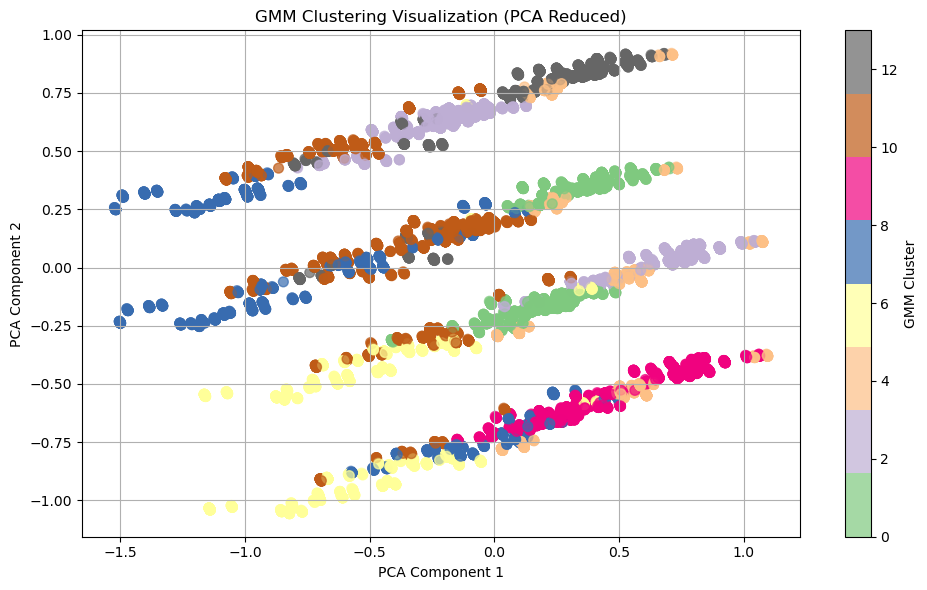

In [168]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]


plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['GMM_Cluster'],
    cmap='Accent',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='GMM Cluster')
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [169]:
# Compare three clustering techniques parameters

In [170]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import numpy as np
from collections import Counter

#  function for Cluster Purity
def cluster_purity(true_labels, predicted_labels):
    cluster_purity_score = 0
    cluster_counts = Counter(predicted_labels)
    
    for cluster in cluster_counts:
        # labels
        cluster_true_labels = true_labels[predicted_labels == cluster]
        
        # Count the majority
        majority_class_count = Counter(cluster_true_labels).most_common(1)[0][1]
        
        # Add the purity of this cluster to the score
        cluster_purity_score += majority_class_count
    
    # Calculate purity
    return cluster_purity_score / len(true_labels)   # used gpt for this function

#  KMeans Evaluation 
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
purity_kmeans = cluster_purity(y, kmeans_labels)

print("KMeans Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"Cluster Purity: {purity_kmeans:.4f}\n")

#  Agglomerative Clustering Evaluation 
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)
silhouette_agglo = silhouette_score(X, agglo_labels)
davies_bouldin_agglo = davies_bouldin_score(X, agglo_labels)
ari_agglo = adjusted_rand_score(y, agglo_labels)
purity_agglo = cluster_purity(y, agglo_labels)

print("Agglomerative Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_agglo:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_agglo:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_agglo:.4f}")
print(f"Cluster Purity: {purity_agglo:.4f}\n")

# Gaussian Mixture Model (GMM) Evaluation
gmm = GaussianMixture(n_components=14, random_state=42)
gmm_labels = gmm.fit_predict(X)
silhouette_gmm = silhouette_score(X, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(X, gmm_labels)
ari_gmm = adjusted_rand_score(y, gmm_labels)
purity_gmm = cluster_purity(y, gmm_labels)

print("GMM Evaluation:")
print(f"Silhouette Score: {silhouette_gmm:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Cluster Purity: {purity_gmm:.4f}")


KMeans Evaluation:
Silhouette Score: 0.1444
Davies-Bouldin Index: 2.1124
Adjusted Rand Index (ARI): 0.0247
Cluster Purity: 0.0555

Agglomerative Clustering Evaluation:
Silhouette Score: 0.1133
Davies-Bouldin Index: 2.2867
Adjusted Rand Index (ARI): 0.0460
Cluster Purity: 0.0907

GMM Evaluation:
Silhouette Score: 0.1241
Davies-Bouldin Index: 2.0682
Adjusted Rand Index (ARI): 0.0950
Cluster Purity: 0.1331


In [171]:
#Milestone 3

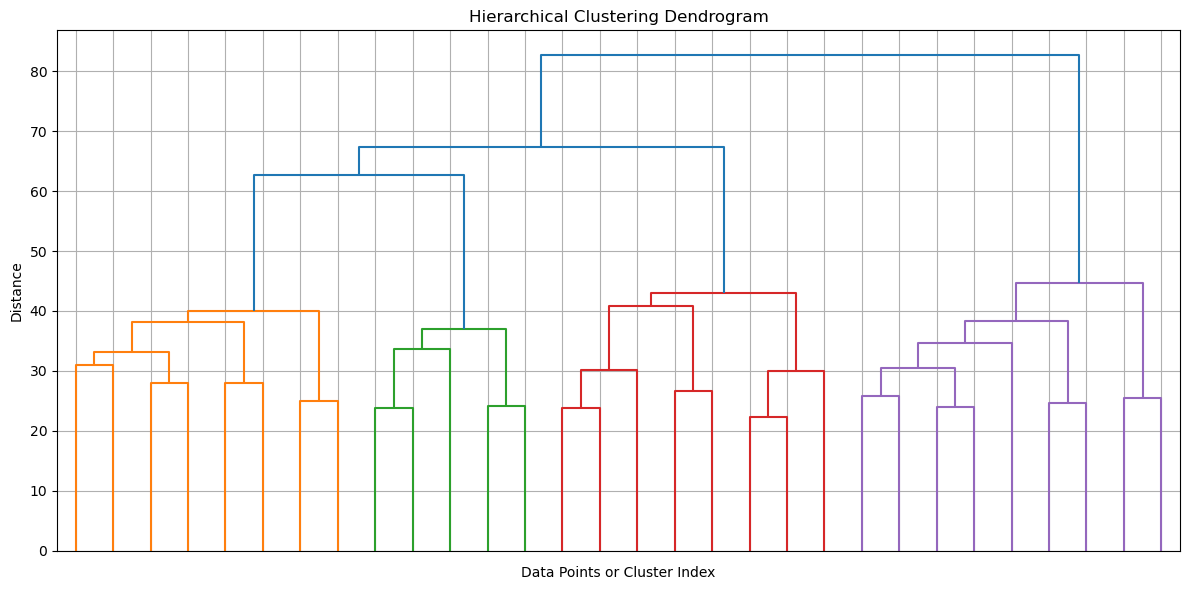

In [172]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')  


plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    truncate_mode='lastp',  
    p=30                    
)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points or Cluster Index")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [173]:
# Supervised Model improvements

In [174]:
# Random Forest Classifier Improvized changed "depth"
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)

#Train model
rfmodel.fit(X_train, y_train)

# Predict output
rfpreds = rfmodel.predict(X_test)

In [175]:
#KNN improvised

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knnmodel = KNeighborsClassifier()

# Define hyperparameters grid to tune the number of neighbors and the distance metric
param_grid = {
    'n_neighbors': [ 7, 8,9, 10],  # Testing different numbers of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knnmodel, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# find the best
best_knn_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the best model
best_knn_model.fit(X_train, y_train)

# Make predictions using the best model
knnpreds = best_knn_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, knnpreds):.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy: 0.9924


In [176]:
# Evaluate each model
evaluate_model(y_test, lrpreds, lrmodel, "Logistic Regression")
evaluate_model(y_test, rfpreds, rfmodel, "Random Forest")
evaluate_model(y_test, knnpreds, best_knn_model, "KNN")

Logistic Regression - Accuracy: 0.9782, Precision: 0.9770, Recall: 0.9782, F1-score: 0.9764
Random Forest - Accuracy: 0.9530, Precision: 0.9336, Recall: 0.9530, F1-score: 0.9401
KNN - Accuracy: 0.9924, Precision: 0.9928, Recall: 0.9924, F1-score: 0.9922


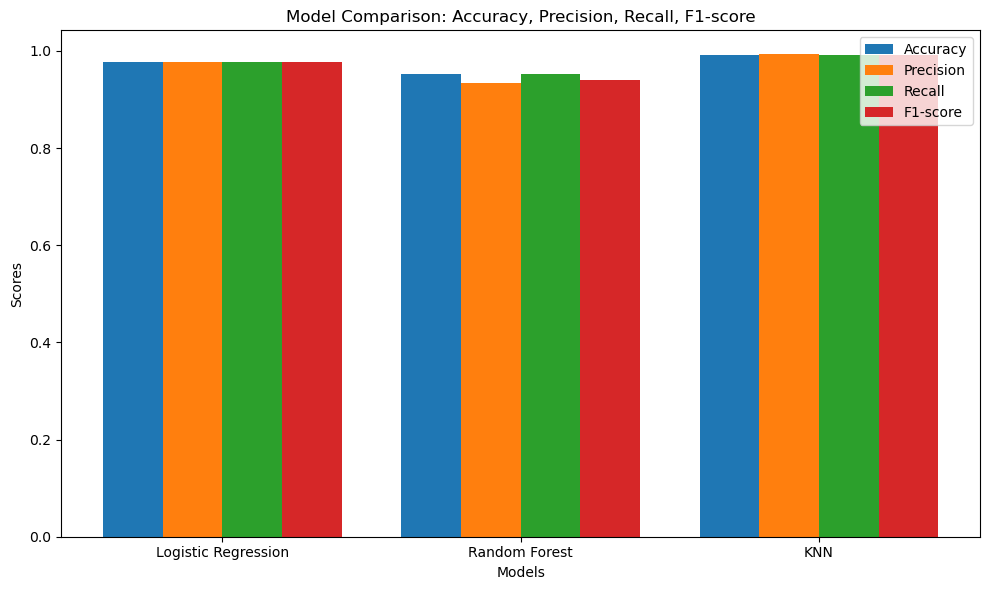

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Model evaluation metrics
models = ['Logistic Regression', 'Random Forest', 'KNN']

accuracy = [0.9782, 0.9530, 0.9924]
precision = [0.9770, 0.9336, 0.9928]
recall = [0.9782, 0.9530, 0.9924]
f1 = [0.9764, 0.9401, 0.9922]

# figures
x = np.arange(len(models)) 
width = 0.2 

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1, width, label='F1-score')

# Labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [178]:
# Clustering enhanced on additional features

In [179]:
def recommend_similar_cars(predicted_label, car_data, top_n=5):
    
    predicted_cluster, company_model = get_cluster_for_predicted_car(predicted_label, car_data)
    
    similar_cars = car_data[car_data['Cluster'] == predicted_cluster].copy()
    similar_cars = similar_cars[similar_cars['company_model'] != company_model]

    feature_cols = [
        'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year',
        'Body_type', 'number_of_seats', 'wheelbase_mm', 'full_weight_kg',
        'max_trunk_capacity_l', 'injection_type', 'engine_type',
        'valves_per_cylinder', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm',
        'engine_hp_rpm', 'drive_wheels', 'turning_circle_m', 'transmission',
        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade',
        'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension',
        'avg_rating', 'max_rating', 'min_rating', 'popularity_score',
        'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder',
        'power_to_weight', 'volume_mm3'
    ]

    similar_cars_scaled = similar_cars[feature_cols]
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)

    recommended_cars = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars[['company_model', 'score']].drop_duplicates('company_model').head(top_n), company_model


In [180]:
def recommend_similar_cars_gmm(predicted_label, car_data, top_n=5):

    predicted_cluster, company_model = get_cluster_for_predicted_car_gmm(predicted_label, car_data)

    similar_cars = car_data[car_data['GMM_Cluster'] == predicted_cluster].copy()
    similar_cars = similar_cars[similar_cars['company_model'] != company_model]

    feature_cols = [
        'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year',
        'Body_type', 'number_of_seats', 'wheelbase_mm', 'full_weight_kg',
        'max_trunk_capacity_l', 'injection_type', 'engine_type',
        'valves_per_cylinder', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm',
        'engine_hp_rpm', 'drive_wheels', 'turning_circle_m', 'transmission',
        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade',
        'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension',
        'avg_rating', 'max_rating', 'min_rating', 'popularity_score',
        'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder',
        'power_to_weight', 'volume_mm3'
    ]

    similar_cars_scaled = similar_cars[feature_cols]
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)

    recommended_cars = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars[['company_model', 'score']].drop_duplicates('company_model').head(top_n), company_model


In [181]:
def recommend_similar_cars_agg(predicted_label, car_data, top_n=5):
  
    predicted_cluster, company_model = get_cluster_for_predicted_car_agg(predicted_label, car_data)

    similar_cars = car_data[car_data['Agglo_Cluster'] == predicted_cluster].copy()
    similar_cars = similar_cars[similar_cars['company_model'] != company_model]
    
    feature_cols = [
        'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year',
        'Body_type', 'number_of_seats', 'wheelbase_mm', 'full_weight_kg',
        'max_trunk_capacity_l', 'injection_type', 'engine_type',
        'valves_per_cylinder', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm',
        'engine_hp_rpm', 'drive_wheels', 'turning_circle_m','transmission','fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade',
        'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension',
        'avg_rating', 'max_rating', 'min_rating', 'popularity_score',
        'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder',
        'power_to_weight', 'volume_mm3'
    ]

    similar_cars_scaled = similar_cars[feature_cols]
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)

    recommended_cars = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars[['company_model', 'score']].drop_duplicates('company_model').head(top_n), company_model


In [182]:
recommended_cars, company_model = recommend_similar_cars(lrpreds[2347], car_full_analysis)
print(f"Recommended cars based on predicted company_model: - {company_model} ")
print("using Kmeans clustering")
print(recommended_cars)
print(f"Predicted car from logistic is: {lrpreds[2347]}")

Recommended cars based on predicted company_model: - lincoln_navigator 
using Kmeans clustering
         company_model      score
6754    toyota_4runner  23.572050
4509           audi_a6  23.098838
6715      nissan_quest  22.901953
1691  chevrolet_camaro  22.784191
5546     toyota_sienna  22.066463
Predicted car from logistic is: lincoln_navigator


In [183]:
recommended_cars_agg, company_model = recommend_similar_cars_agg(lrpreds[678], car_full_analysis)
print(f"Recommended cars based on predicted company_model:  {company_model} ")
print("using agglomerative clustering")
print(recommended_cars_agg)
print(f"Predicted car from logistic is: {lrpreds[678]}")

Recommended cars based on predicted company_model:  nissan_pathfinder 
using agglomerative clustering
          company_model      score
17567  chevrolet_camaro  23.826383
10357     toyota_celica  23.106614
17405     toyota_sienna  23.030215
10338          acura_tl  22.766297
9379   cadillac_deville  22.747500
Predicted car from logistic is: nissan_pathfinder


In [184]:
recommended_cars_gmm, company_model = recommend_similar_cars_gmm(lrpreds[2345], car_full_analysis)
print(f"Recommended cars based on company_model: {company_model}")
print("using GMM clustering")
print(recommended_cars_gmm)
print(f"Predicted car from logistic is: {lrpreds[2345]}")

Recommended cars based on company_model: cadillac_eldorado
using GMM clustering
          company_model      score
2287      toyota_sienna  23.346831
2341   chevrolet_impala  22.569960
5570           acura_tl  22.223226
3476  oldsmobile_aurora  22.213957
2039        buick_regal  22.209031
Predicted car from logistic is: cadillac_eldorado


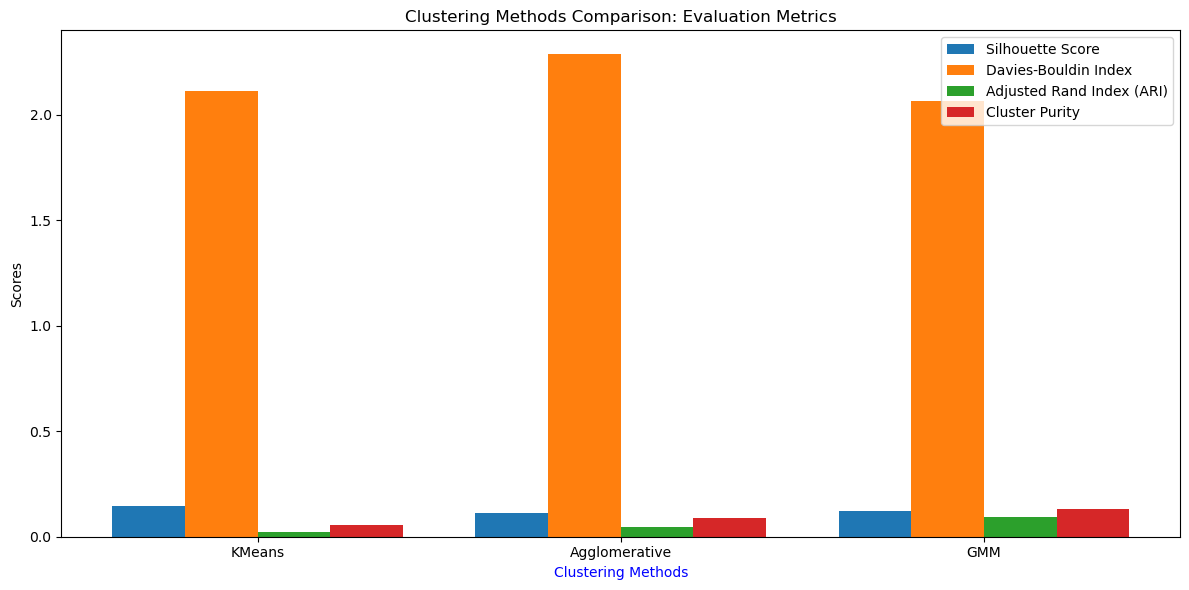

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Clustering methods
methods = ['KMeans', 'Agglomerative', 'GMM']

# Metrics for each clustering method
silhouette = [0.1444, 0.1133, 0.1241]
davies_bouldin = [2.1124, 2.2867, 2.0682]
ari = [0.0247, 0.0460, 0.0950]
purity = [0.0555, 0.0907, 0.1331]

x = np.arange(len(methods))  
width = 0.2  

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - 1.5 * width, silhouette, width, label='Silhouette Score')
rects2 = ax.bar(x - 0.5 * width, davies_bouldin, width, label='Davies-Bouldin Index')
rects3 = ax.bar(x + 0.5 * width, ari, width, label='Adjusted Rand Index (ARI)')
rects4 = ax.bar(x + 1.5 * width, purity, width, label='Cluster Purity')

ax.set_xlabel('Clustering Methods', color='b')
ax.set_ylabel('Scores')
ax.set_title('Clustering Methods Comparison: Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.tight_layout()
plt.show()


In [186]:
# Sample test data testing

In [187]:
X_test

Annual Income  Transmission    Color  Price ($)  Sale_Year  Body_type  \
6591        0.715498           1.0  1.00000   0.627590        0.0   0.885622   
16764       0.519731           0.0  0.63093   0.815304        1.0   0.500000   
2383        0.633687           0.0  1.00000   0.948954        0.0   0.885622   
3045        0.642018           0.0  1.00000   0.761527        0.0   0.885622   
3606        0.537553           0.0  0.00000   0.613807        0.0   0.885622   
...              ...           ...      ...        ...        ...        ...   
1212        0.000000           1.0  1.00000   0.838176        0.0   0.885622   
13566       0.590831           0.0  0.00000   0.827019        1.0   0.500000   
1783        0.545230           1.0  1.00000   0.783165        0.0   0.732487   
16279       0.598130           0.0  0.63093   0.848825        1.0   0.000000   
11065       0.654719           0.0  0.63093   0.923896        1.0   0.885622   

       number_of_seats  wheelbase_mm  full_weight_kg  max_trunk_capacity_l  \
6591          0.706695      0.622796        0.512877              0.300764   
16764         0.706695      0.658550        0.686663              0.812696   
2383          0.863859      0.740004        0.733471              0.539666   
3045          0.706695      0.699213        0.549648              0.360115   
3606          0.706695      0.732273        0.617069              0.508225   
...                ...           ...             ...                   ...   
1212          0.706695      0.700810        0.479488              0.790053   
13566         1.000000      0.889177        0.479488              0.940022   
1783          0.863859      0.707173        0.479488              0.952354   
16279         0.520810      0.579229        0.429651              0.126476   
11065         0.706695      0.649822        0.231126              0.539666   

       ...  front_suspension  avg_rating  max_rating  min_rating  \
6591   ...          0.783732    0.552289         1.0         0.5   
16764  ...          0.889655    0.690778         1.0         0.5   
2383   ...          0.904145    0.652927         1.0         0.5   
3045   ...          0.858366    0.564119         1.0         0.5   
3606   ...          0.326260    0.700547         1.0         0.5   
...    ...               ...         ...         ...         ...   
1212   ...          0.904145    0.686964         1.0         0.5   
13566  ...          0.577885    0.535619         1.0         0.5   
1783   ...          0.989579    0.575834         1.0         0.5   
16279  ...          0.783732    0.733269         1.0         0.5   
11065  ...          0.904145    0.080176         1.0         0.5   

       popularity_score  fuel_eff_score  avg_track_mm  \
6591           0.690613        0.620904      0.292314   
16764          0.890042        0.810608      0.037718   
2383           0.649922        0.663525      0.232419   
3045           0.811274        0.594424      0.422675   
3606           0.673698        0.883421      0.303941   
...                 ...             ...           ...   
1212           0.650080        0.418744      0.232419   
13566          0.720442        0.770225      0.686668   
1783           0.521851        0.671834      0.411428   
16279          0.465770        0.237712      0.368365   
11065          0.233257        0.429364      0.232419   

       displacement_per_cylinder  power_to_weight  volume_mm3  
6591                    0.422521         0.323253    0.166459  
16764                   0.402373         0.090237    0.301381  
2383                    0.563831         0.324930    0.390784  
3045                    0.573734         0.284874    0.290958  
3606                    0.467350         0.515000    0.413790  
...                          ...              ...         ...  
1212                    0.411885         0.288844    0.352492  
13566                   0.586806         0.298518    0.846851  
1783                    0.53834

In [188]:
sample_X = X_test.sample(n=20, random_state=42)

In [189]:
# Predict with Logistic Regression
logistic_preds_test = lrmodel.predict(sample_X)

# Predict with KNN
knn_preds_test = best_knn_model.predict(sample_X)

# Predict with Random Forest
rf_preds_test = rfmodel.predict(sample_X)

print(sample_X)

       Annual Income  Transmission    Color  Price ($)  Sale_Year  Body_type  \
683         0.518385           0.0  0.63093   0.539213        0.0   0.315465   
13504       0.646373           0.0  0.00000   0.646866        1.0   0.885622   
8995        0.000000           0.0  0.00000   0.606614        1.0   0.885622   
4660        0.574135           1.0  0.63093   0.711138        0.0   0.885622   
7459        0.000000           1.0  0.63093   0.838176        0.0   0.885622   
8280        0.632906           0.0  0.63093   0.681194        1.0   0.885622   
17263       0.540351           1.0  0.00000   0.606599        1.0   0.500000   
12269       0.000000           0.0  0.00000   0.720326        1.0   0.500000   
14687       0.000000           0.0  1.00000   0.591482        1.0   0.885622   
11093       0.591660           1.0  0.00000   0.496531        1.0   0.500000   
5433        0.687920           1.0  0.63093   0.741839        0.0   0.885622   
17012       0.708126           0.0  1.00

In [190]:
import pandas as pd

# Combine predictions into a DataFrame
results_df = pd.DataFrame({
    'Logistic Regression': logistic_preds_test,
    'KNN': knn_preds_test,
    'Random Forest': rf_preds_test
})

# Show the predictions
print(results_df)


    Logistic Regression                  KNN        Random Forest
0      pontiac_grand am     pontiac_grand am     pontiac_grand am
1     lincoln_navigator    lincoln_navigator   pontiac_bonneville
2         nissan_sentra        nissan_sentra        nissan_sentra
3   mitsubishi_diamante  mitsubishi_diamante  mitsubishi_diamante
4       pontiac_sunfire      pontiac_sunfire      pontiac_sunfire
5       plymouth_breeze      plymouth_breeze      plymouth_breeze
6    mitsubishi_montero   mitsubishi_montero   mitsubishi_montero
7         nissan_xterra        nissan_xterra        nissan_xterra
8       chevrolet_prizm      chevrolet_prizm      chevrolet_prizm
9       ford_expedition      ford_expedition      ford_expedition
10      pontiac_sunfire      pontiac_sunfire      pontiac_sunfire
11  ford_crown victoria  ford_crown victoria  ford_crown victoria
12             acura_rl             acura_rl             acura_rl
13  ford_crown victoria  ford_crown victoria  ford_crown victoria
14        

In [191]:
# taking the indexes and checking for the raw data

In [192]:
print(X_test.iloc[500:550])

       Annual Income  Transmission    Color  Price ($)  Sale_Year  Body_type  \
11407       0.644212           0.0  0.63093   0.686458        1.0   0.885622   
14577       0.444339           0.0  0.00000   0.686458        1.0   0.732487   
2151        0.688622           1.0  1.00000   0.660619        0.0   0.732487   
6605        0.535909           0.0  0.00000   0.681194        0.0   0.500000   
12741       0.000000           1.0  0.63093   0.539233        1.0   0.885622   
228         0.661333           0.0  0.63093   0.776172        0.0   0.885622   
14273       0.000000           1.0  1.00000   0.658880        1.0   0.732487   
5345        0.656065           1.0  0.63093   0.591482        0.0   0.500000   
1378        0.655394           1.0  0.00000   0.749909        0.0   0.885622   
17665       0.715048           0.0  0.63093   0.646853        1.0   0.732487   
2902        0.654854           1.0  1.00000   0.989677        0.0   0.885622   
7505        0.636465           1.0  0.63

In [193]:
# Predict with Logistic Regression
logistic_preds_test = lrmodel.predict(sample_X)

# Predict with KNN
knn_preds_test = best_knn_model.predict(sample_X)

# Predict with Random Forest
rf_preds_test = rfmodel.predict(sample_X)

In [194]:
# Predict with Logistic Regression
logistic_preds_test = lrmodel.predict(X_test.iloc[500:501])

# Predict with KNN
knn_preds_test = best_knn_model.predict(X_test.iloc[500:501])

# Predict with Random Forest
rf_preds_test = rfmodel.predict(X_test.iloc[500:501])

In [195]:
import pandas as pd

# Combine predictions into a DataFrame
print(f" Result for row {11407} is : ")
results_df = pd.DataFrame({
    'Logistic Regression': logistic_preds_test,
    'KNN': knn_preds_test,
    'Random Forest': rf_preds_test
})

# Show the predictions
print(results_df)


 Result for row 11407 is : 
  Logistic Regression            KNN  Random Forest
0       dodge_avenger  dodge_avenger  dodge_avenger


In [196]:
car_full_analysis

Annual Income  Transmission    Color  Price ($)  Sale_Year  Body_type  \
0           0.000000           0.0  0.00000   0.720326        0.0   0.500000   
1           0.698869           0.0  0.00000   0.646853        0.0   0.500000   
2           0.645656           1.0  1.00000   0.765275        0.0   0.885622   
3           0.000000           1.0  0.63093   0.575321        0.0   0.885622   
4           0.697354           0.0  1.00000   0.706406        0.0   0.885622   
...              ...           ...      ...        ...        ...        ...   
18365       0.000000           0.0  0.63093   0.923896        1.0   0.885622   
18366       0.601842           0.0  1.00000   0.646853        1.0   0.885622   
18367       0.000000           1.0  1.00000   0.539213        1.0   0.732487   
18368       0.624861           0.0  0.00000   0.606599        1.0   0.885622   
18369       0.000000           0.0  0.00000   0.761527        1.0   0.630930   

       number_of_seats  wheelbase_mm  full_weight_kg  max_trunk_capacity_l  \
0             1.000000      0.889177        0.479488              0.940022   
1             0.863859      0.782715        0.954655              0.831629   
2             0.706695      0.665979        0.479488              0.539666   
3             0.520810      0.605571        0.271280              0.539666   
4             0.706695      0.679065        0.479488              0.539666   
...                ...           ...             ...                   ...   
18365         0.706695      0.770408        0.479488              0.367285   
18366         0.706695      0.649822        0.231126              0.539666   
18367         1.000000      0.778256        0.479488              0.998576   
18368         0.706695      0.544956        0.479488              0.251991   
18369         0.706695      0.633430        0.000000              0.436541   

       ...  avg_track_mm  displacement_per_cylinder  power_to_weight  \
0      ...      0.686668                   0.586806         0.298518   
1      ...      0.500426                   0.806149         0.289332   
2      ...      0.232419                   0.563085         0.325477   
3      ...      0.232419                   0.290858         0.319880   
4      ...      0.473959                   0.578654         0.265805   
...    ...           ...                        ...              ...   
18365  ...      0.469529                   0.331428         0.150428   
18366  ...      0.232419                   0.406187         0.135206   
18367  ...      0.473959                   0.402373         0.086566   
18368  ...      0.132743                   0.289593         0.160964   
18369  ...      0.232419                   0.738671         0.000000   

       volume_mm3      company_model  Cluster      PCA1      PCA2  \
0        0.846851    ford_expedition        4 -0.698430 -0.907989   
1        0.611861      dodge_durango        2 -0.667713 -0.908860   
2        0.330714  cadillac_eldorado        0 -0.057134  0.160217   
3        0.012239      toyota_celica        0  0.558716  0.404773   
4        0.335340           acura_tl        4  0.323573 -0.604230   
...           ...                ...      ...       ...       ...   
18365    0.408350  buick_park avenue        2 -0.632013 -0.492783   
18366    0.150683       ford_contour        1  0.114466 -0.239277   
18367    0.566382   plymouth_voyager        2 -1.142956  0.272626   
18368    0.042762    chevrolet_prizm        1  0.113604 -0.192521   
18369    0.072703    chevrolet_metro        2  0.009000 -0.288674   

       Agglo_Cluster  GMM_Cluster  
0                  3           11  
1                  2            6  
2                  1           10  
3                  0            0  
4                  0            9  
...              ...          ...  
18365              2            6  
18366              3            1  
18367              2            8  
18368              3            1  
18369              

In [197]:
# bias check

In [198]:
car_raw

Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18365  C_CND_023900 2023-12-31          Yuna    Male          13500   
18366  C_CND_023901 2023-12-31        Nathan  Female         771000   
18367  C_CND_023902 2023-12-31        Martin    Male          13500   
18368  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18369  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1                         C & M Motors Inc  DoubleÂ Overhead Camshaft   
2                              Capitol KIA          Overhead Camshaft   
3                   Chrysler of Tri-Cities          Overhead Camshaft   
4                        Chrysler Plymouth  DoubleÂ Overhead Camshaft   
...                                    ...                        ...   
18365                            U-Haul CO  DoubleÂ Overhead Camshaft   
18366  Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
18367                     C & M Motors Inc          Overhead Camshaft   
18368       Ryder Truck Rental and Leasing  DoubleÂ Overhead Camshaft   
18369                    Chrysler Plymouth  DoubleÂ Overhead Camshaft   

      Transmission       Color  Price ($)  ... min_rating num_reviews  \
0             Auto       Black      26000  ...        1.0      1111.0   
1             Auto       Black      19000  ...        1.0      1316.0   
2           Manual         Red      31500  ...        1.0        55.0   
3           Manual  Pale White      14000  ...        1.0       456.0   
4             Auto         Red      24500  ...        1.0      1819.0   
...            ...         ...        ...  ...        ...         ...   
18365         Auto  Pale White      62000  ...        1.0      4755.0   
18366         Auto         Red      19000  ...        1.0        44.0   
18367       Manual         Red      12000  ...        1.0        13.0   
18368         Auto       Black      16000  ...        1.0       146.0   
18369         Auto       Black      31000  ...        2.0        38.0   

       has_reviews popularity_score  fuel_eff_score  avg_track_mm  \
0                1        26.988739           12.25        1712.0   
1                1        28.235742           13.75        1625.0   
2                1        16.686912            8.30        1507.5   
3                1        26.204512            9.05        1507.5   
4                1        31.280905           11.05        1613.0   
...            ...              ...             ...           ...   
18365            1        33.336224            9.40        1611.0   
18366            1        12.112108            8.40        1507.5   
18367            1         8.120176           10.35        1613.0   
18368            1        19.073023            8.80        1466.0   
18369            1        14.268609            5.50        1507.5   

      displacement_per_cylinder power_to_weight    volume_mm3  \
0                    582.666667        0.151491  2.219620e+10   
1                    706.750000        0.148693  1.769695e+10   
2                    570.625000        0.159743  1.349566e+10   
3                    449.000000        0.158025  9.928017e+09   
4                    578.500000        0.141557  1.355599e+10   
...                         ...             ...           ...   
18365                465.333333        0.107200  1.454444e+10   
18366                497.000000        0.102745  1.134549

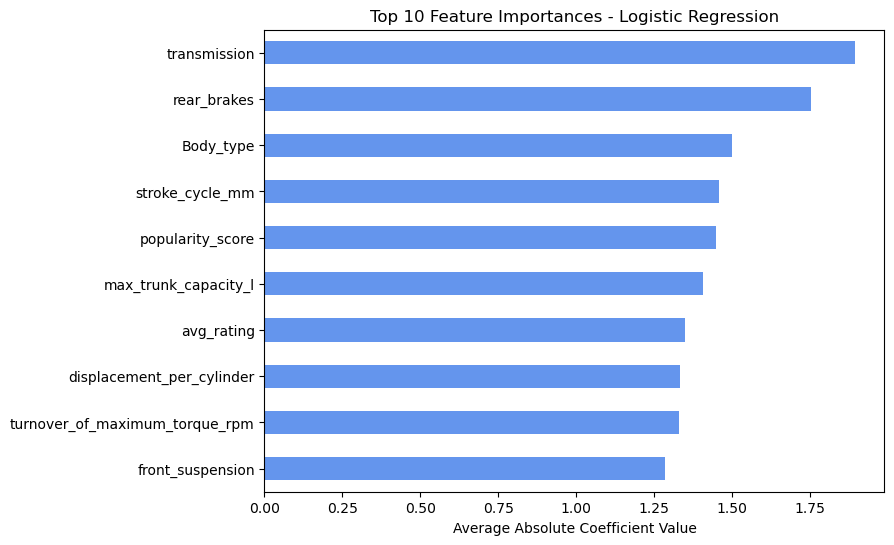

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


coefficients = pd.Series(np.abs(lrmodel.coef_).mean(axis=0), index=X_train.columns)

# Get Top 10 Important Features
top_features = coefficients.nlargest(10)

# Plot
plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='cornflowerblue')
plt.title("Top 10 Feature Importances - Logistic Regression")
plt.xlabel("Average Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.show()


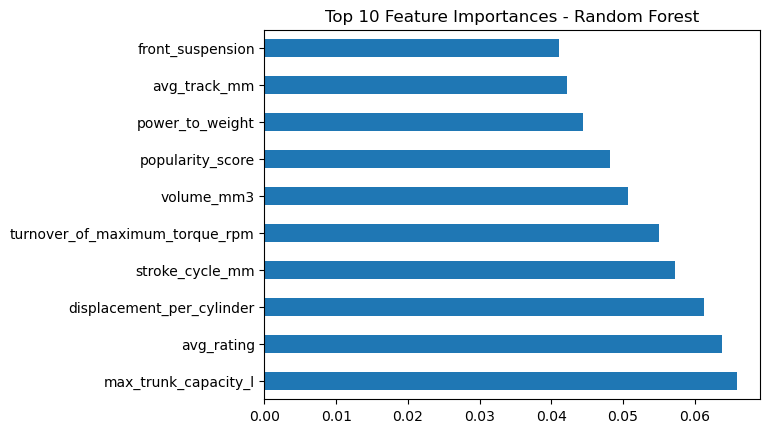

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rfmodel is your trained Random Forest
feature_importances = pd.Series(rfmodel.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


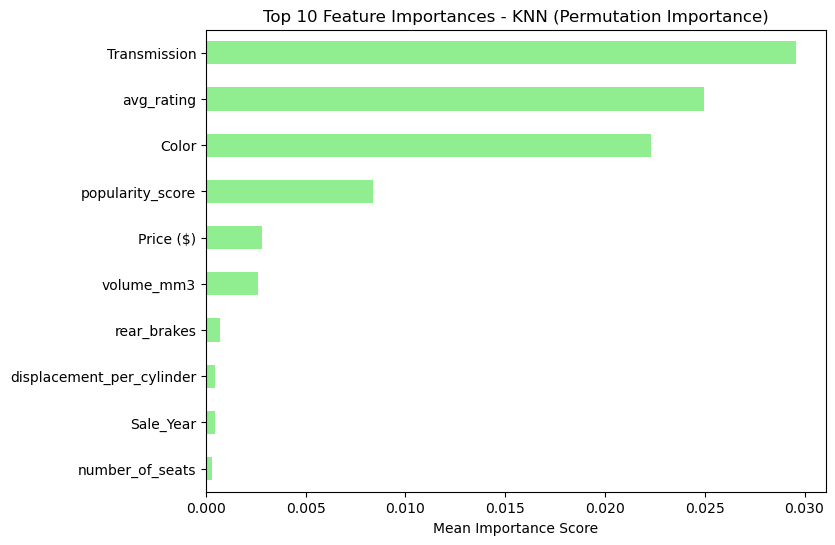

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.Series(result.importances_mean, index=X_test.columns)
top_features_knn = perm_importances.nlargest(10)

plt.figure(figsize=(8,6))
top_features_knn.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Feature Importances - KNN (Permutation Importance)")
plt.xlabel("Mean Importance Score")
plt.gca().invert_yaxis()
plt.show()



 Logistic regression Classification Report:
                          precision    recall  f1-score   support

           acura_integra       1.00      1.00      1.00        14
                acura_rl       0.64      0.90      0.75       112
                acura_tl       1.00      1.00      1.00        81
                 audi_a4       1.00      1.00      1.00        31
                 audi_a6       1.00      1.00      1.00        99
                 audi_a8       1.00      0.45      0.62        11
           buick_century       1.00      1.00      1.00        13
           buick_lesabre       1.00      1.00      1.00        12
       buick_park avenue       1.00      1.00      1.00        61
             buick_regal       1.00      1.00      1.00        46
         cadillac_catera       1.00      1.00      1.00        27
        cadillac_deville       1.00      1.00      1.00        24
       cadillac_eldorado       1.00      1.00      1.00        70
       cadillac_escalade      

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


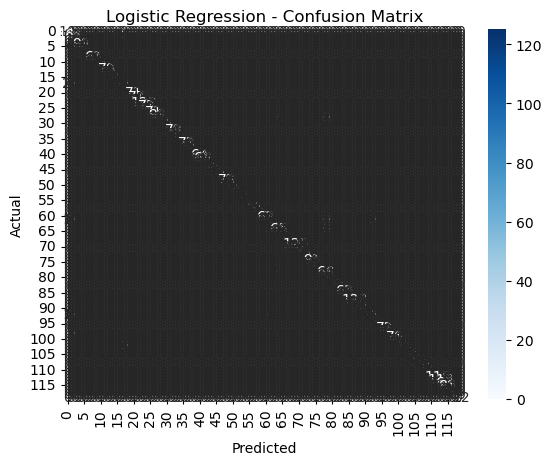

In [202]:
# Classification Report
print("\n Logistic regression Classification Report:")
print(classification_report(y_test, lrpreds))

# Confusion Matrix
cm = confusion_matrix(y_test, lrpreds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Random Forest - Classification Report:
                          precision    recall  f1-score   support

           acura_integra       1.00      1.00      1.00        14
                acura_rl       0.97      1.00      0.98       112
                acura_tl       1.00      1.00      1.00        81
                 audi_a4       1.00      1.00      1.00        31
                 audi_a6       1.00      1.00      1.00        99
                 audi_a8       1.00      1.00      1.00        11
           buick_century       1.00      1.00      1.00        13
           buick_lesabre       0.00      0.00      0.00        12
       buick_park avenue       1.00      1.00      1.00        61
             buick_regal       1.00      1.00      1.00        46
         cadillac_catera       1.00      1.00      1.00        27
        cadillac_deville       0.00      0.00      0.00        24
       cadillac_eldorado       1.00      1.00      1.00        70
       cadillac_escalade       1.00

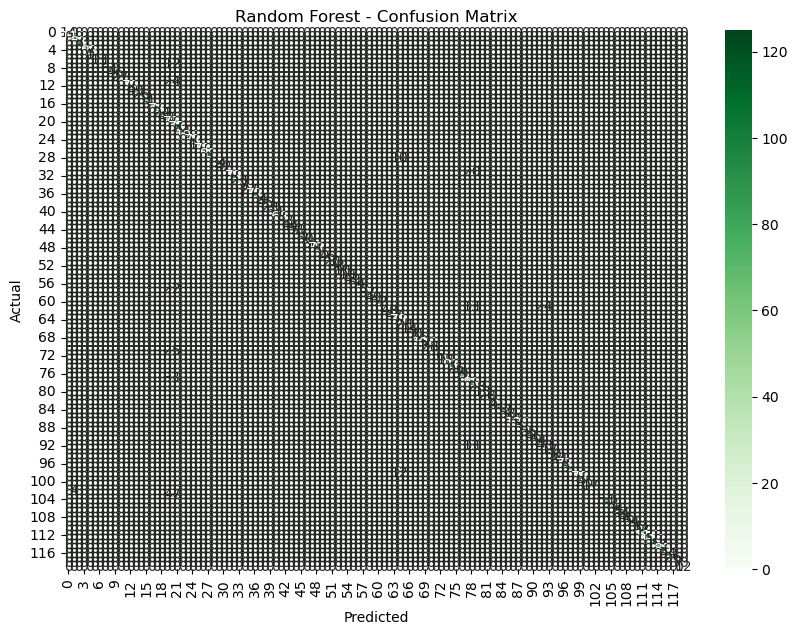

In [203]:
# RANDOM FOREST - Classification Report
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rfpreds, zero_division=0))

# RANDOM FOREST - Confusion Matrix
cm_rf = confusion_matrix(y_test, rfpreds)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



K-Nearest Neighbors - Classification Report:
                          precision    recall  f1-score   support

           acura_integra       1.00      1.00      1.00        14
                acura_rl       0.86      0.99      0.92       112
                acura_tl       1.00      1.00      1.00        81
                 audi_a4       1.00      1.00      1.00        31
                 audi_a6       1.00      1.00      1.00        99
                 audi_a8       1.00      0.64      0.78        11
           buick_century       1.00      1.00      1.00        13
           buick_lesabre       1.00      1.00      1.00        12
       buick_park avenue       1.00      1.00      1.00        61
             buick_regal       1.00      1.00      1.00        46
         cadillac_catera       1.00      1.00      1.00        27
        cadillac_deville       1.00      1.00      1.00        24
       cadillac_eldorado       1.00      1.00      1.00        70
       cadillac_escalade     

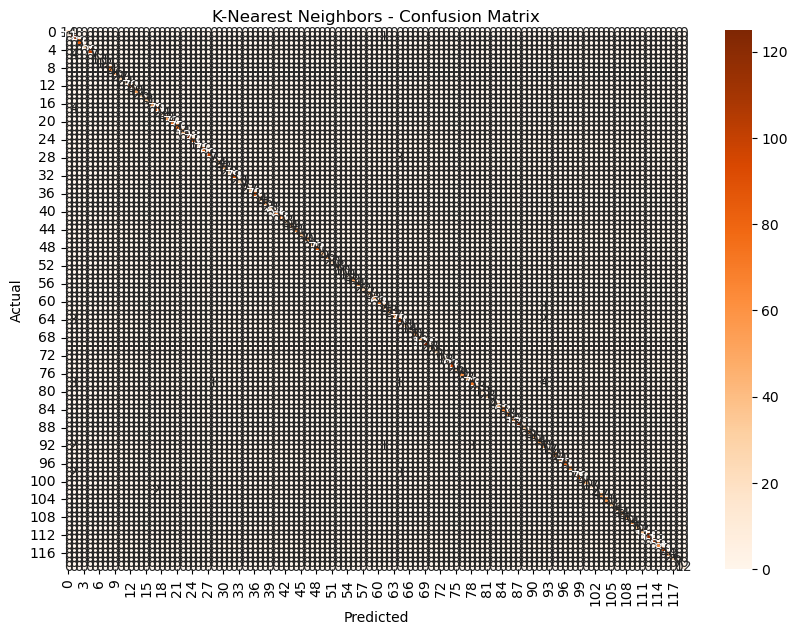

In [204]:
# KNN - Classification Report
print("\nK-Nearest Neighbors - Classification Report:")
print(classification_report(y_test, knnpreds, zero_division=0))

# KNN - Confusion Matrix
cm_knn = confusion_matrix(y_test, knnpreds)
plt.figure(figsize=(10,7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [205]:
#unsupervised

Number of Cars in Each KMeans Cluster:
Cluster
0    3247
1    4363
2    3201
3    4030
4    3529
Name: count, dtype: int64


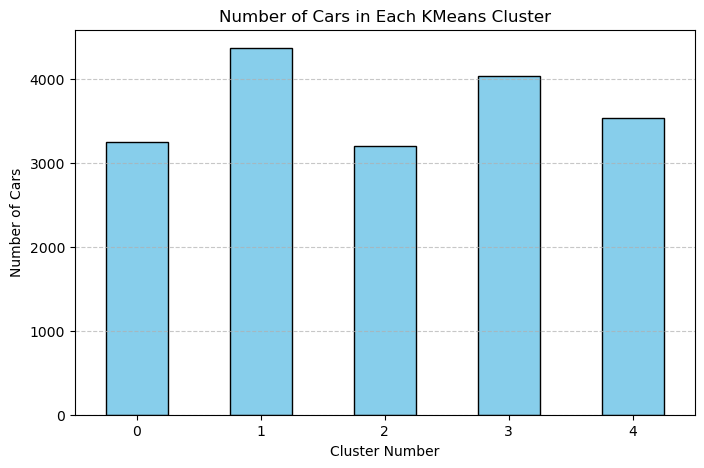

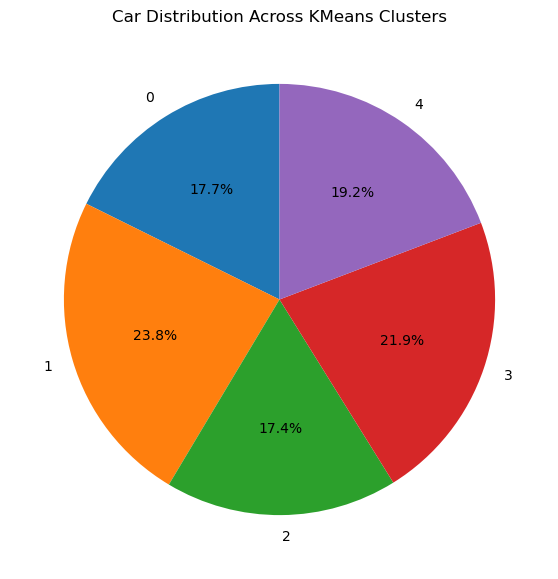


 Cluster 0 - Top 5 Car Models:
company_model
acura_rl               146
chevrolet_prizm        120
mitsubishi_diamante     96
audi_a6                 91
lincoln_continental     84
Name: count, dtype: int64


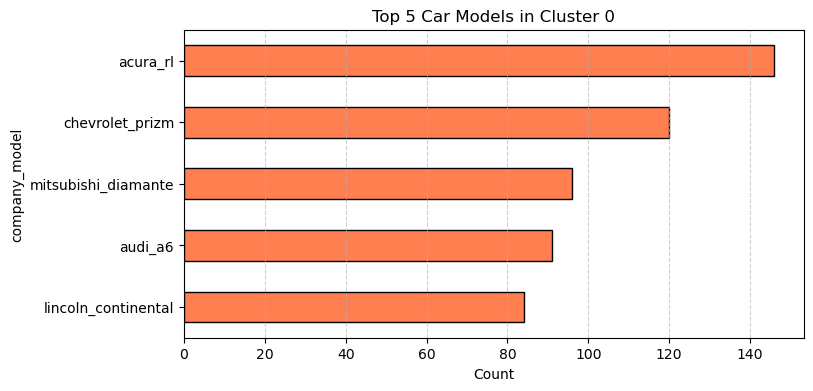


 Cluster 1 - Top 5 Car Models:
company_model
chrysler_lhs         150
volkswagen_passat    144
volkswagen_jetta     139
chrysler_300m        129
ford_explorer        124
Name: count, dtype: int64


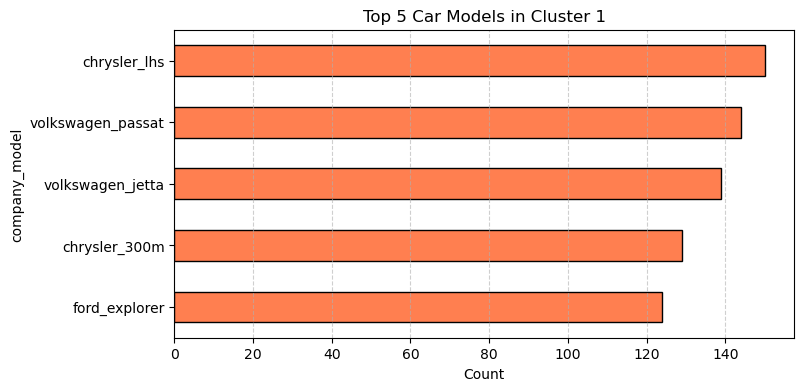


 Cluster 2 - Top 5 Car Models:
company_model
oldsmobile_silhouette    411
dodge_durango            262
chevrolet_metro          258
buick_park avenue        202
plymouth_voyager         181
Name: count, dtype: int64


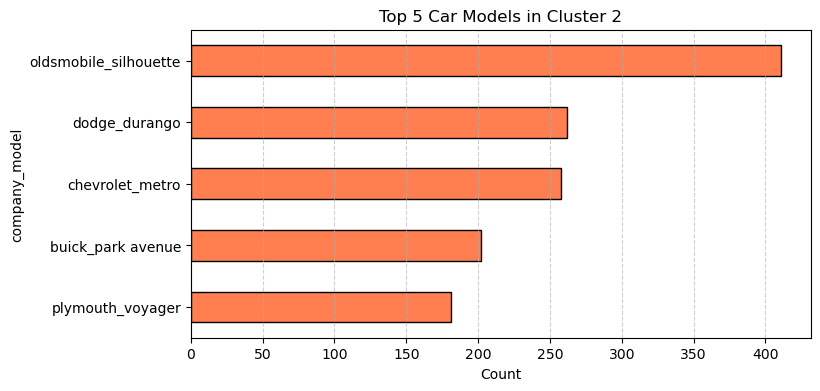


 Cluster 3 - Top 5 Car Models:
company_model
acura_rl               171
chevrolet_prizm        137
audi_a6                126
lincoln_continental    122
mitsubishi_diamante    117
Name: count, dtype: int64


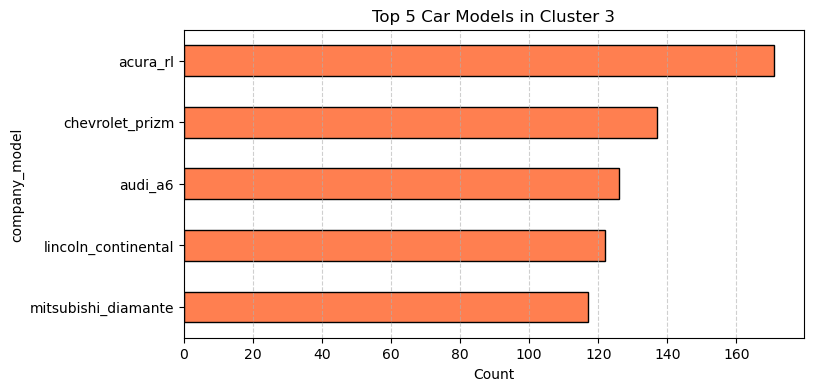


 Cluster 4 - Top 5 Car Models:
company_model
volkswagen_jetta     141
volkswagen_passat    116
chrysler_300m        114
chrysler_lhs         107
ford_explorer        101
Name: count, dtype: int64


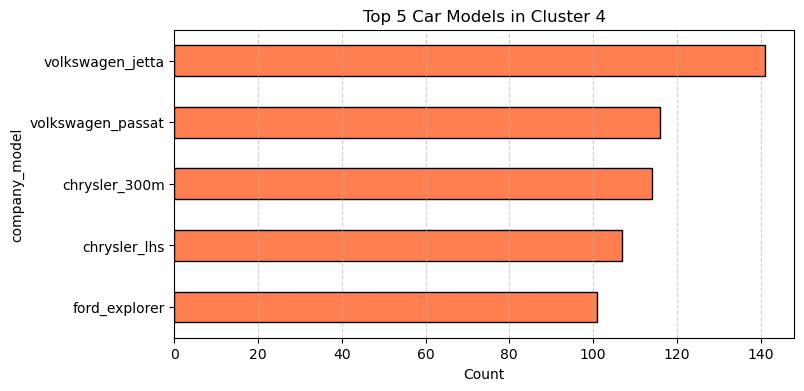

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans_counts = car_full_analysis['Cluster'].value_counts().sort_index()
print("Number of Cars in Each KMeans Cluster:")
print(kmeans_counts)

# Bar Plot
plt.figure(figsize=(8,5))
kmeans_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Cars in Each KMeans Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
kmeans_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Car Distribution Across KMeans Clusters')
plt.ylabel('')
plt.show()

unique_clusters = sorted(car_full_analysis['Cluster'].unique())

for cluster_num in unique_clusters:
    print(f"\n Cluster {cluster_num} - Top 5 Car Models:")
    top_models = car_full_analysis[car_full_analysis['Cluster'] == cluster_num]['company_model'].value_counts().head(5)
    print(top_models)

    # Visualize Top Models
    plt.figure(figsize=(8,4))
    top_models.plot(kind='barh', color='coral', edgecolor='black')
    plt.title(f'Top 5 Car Models in Cluster {cluster_num}')
    plt.xlabel('Count')
    plt.gca().invert_yaxis()  
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


Number of Cars in Each Agglomerative Cluster:
Agglo_Cluster
0    6092
1    5696
2    3145
3    2979
4     458
Name: count, dtype: int64


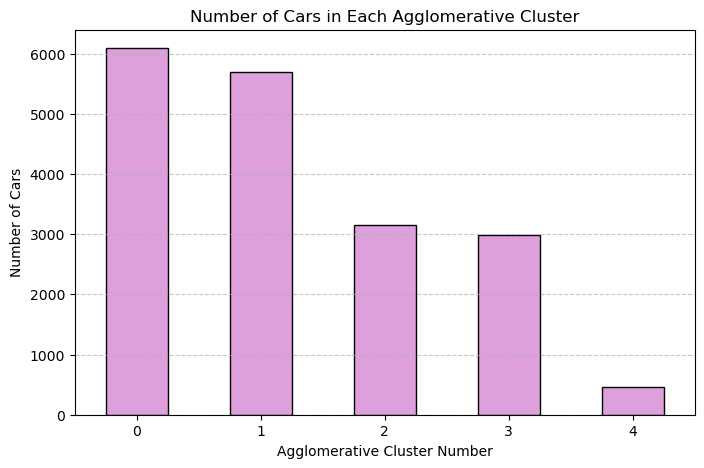

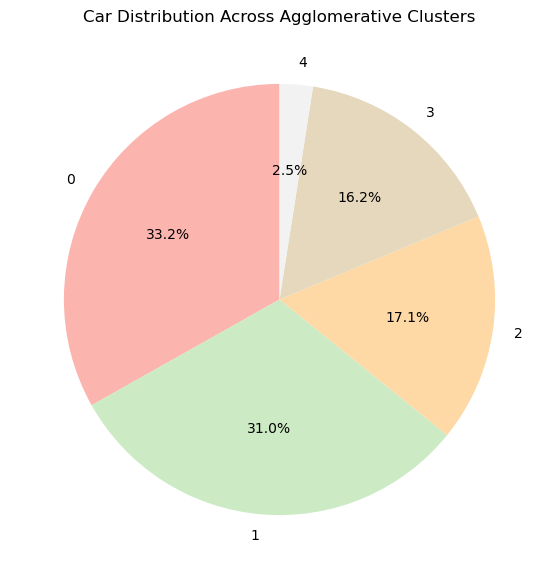


 Agglomerative Cluster 0 - Top 5 Car Models:
company_model
volkswagen_jetta     280
volkswagen_passat    260
chrysler_lhs         257
chrysler_300m        243
ford_explorer        225
Name: count, dtype: int64


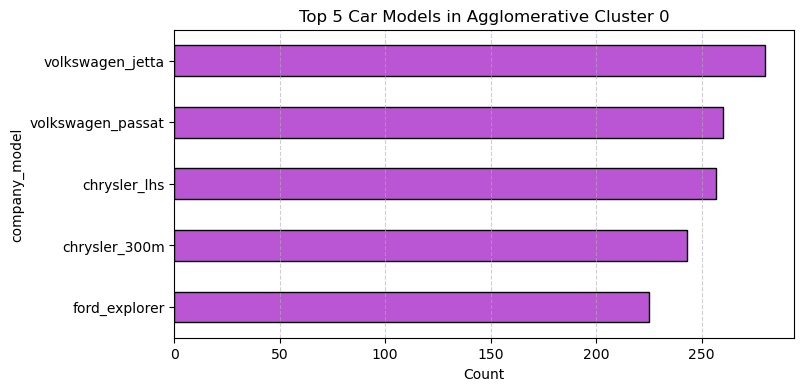


 Agglomerative Cluster 1 - Top 5 Car Models:
company_model
acura_rl               317
chevrolet_prizm        257
volvo_c70              210
lincoln_continental    206
nissan_frontier        195
Name: count, dtype: int64


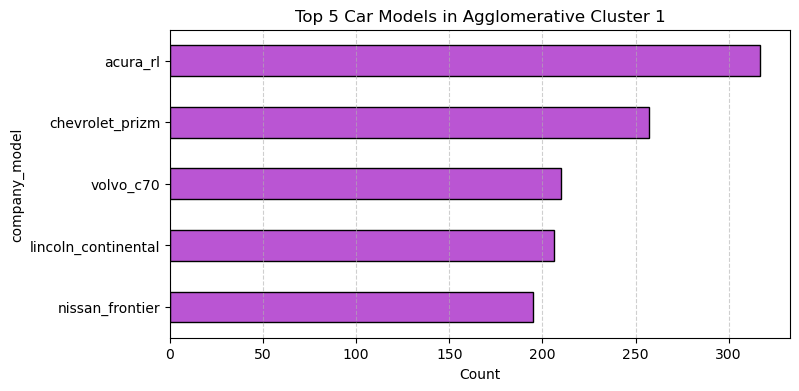


 Agglomerative Cluster 2 - Top 5 Car Models:
company_model
oldsmobile_silhouette    411
dodge_durango            262
chevrolet_metro          258
buick_park avenue        202
plymouth_voyager         181
Name: count, dtype: int64


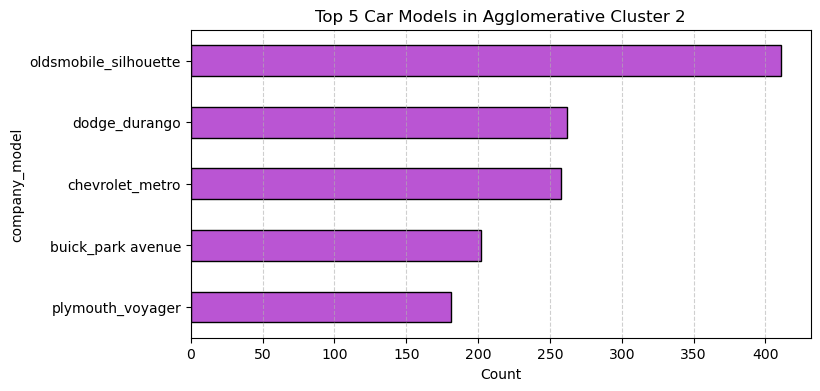


 Agglomerative Cluster 3 - Top 5 Car Models:
company_model
mitsubishi_diamante         418
audi_a6                     329
mitsubishi_montero sport    302
chrysler_concorde           237
ford_expedition             215
Name: count, dtype: int64


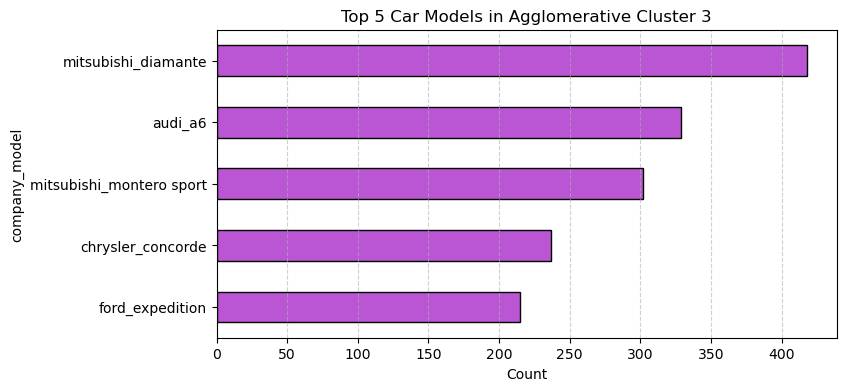


 Agglomerative Cluster 4 - Top 5 Car Models:
company_model
dodge_viper         240
chevrolet_lumina    162
pontiac_firebird     56
Name: count, dtype: int64


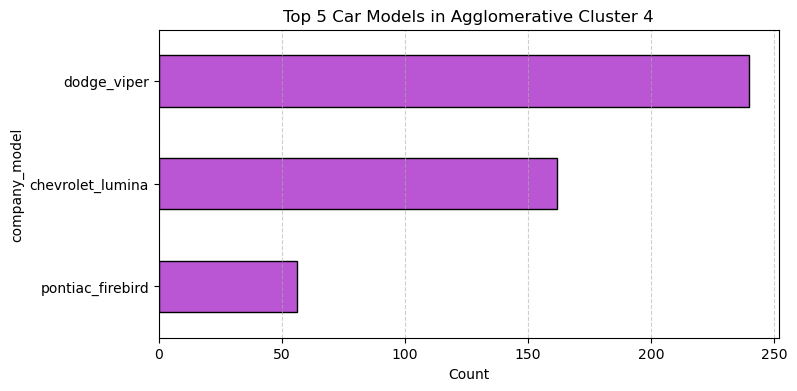

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

agglo_counts = car_full_analysis['Agglo_Cluster'].value_counts().sort_index()
print("Number of Cars in Each Agglomerative Cluster:")
print(agglo_counts)

# Bar Plot
plt.figure(figsize=(8,5))
agglo_counts.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Number of Cars in Each Agglomerative Cluster')
plt.xlabel('Agglomerative Cluster Number')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
agglo_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel1')
plt.title('Car Distribution Across Agglomerative Clusters')
plt.ylabel('')
plt.show()

unique_agglo_clusters = sorted(car_full_analysis['Agglo_Cluster'].unique())

for cluster_num in unique_agglo_clusters:
    print(f"\n Agglomerative Cluster {cluster_num} - Top 5 Car Models:")
    top_models = car_full_analysis[car_full_analysis['Agglo_Cluster'] == cluster_num]['company_model'].value_counts().head(5)
    print(top_models)

    # Visualize Top Models
    plt.figure(figsize=(8,4))
    top_models.plot(kind='barh', color='mediumorchid', edgecolor='black')
    plt.title(f'Top 5 Car Models in Agglomerative Cluster {cluster_num}')
    plt.xlabel('Count')
    plt.gca().invert_yaxis()  # Highest at top
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


Number of Cars in Each GMM Cluster:
GMM_Cluster
0     1113
1     1800
2     1453
3     1641
4     1339
5      240
6     1510
7     1139
8      970
9     2336
10    1175
11    1838
12     417
13    1399
Name: count, dtype: int64


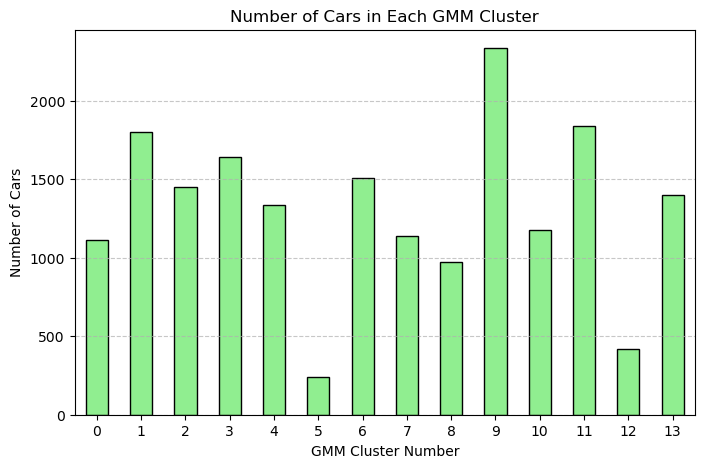

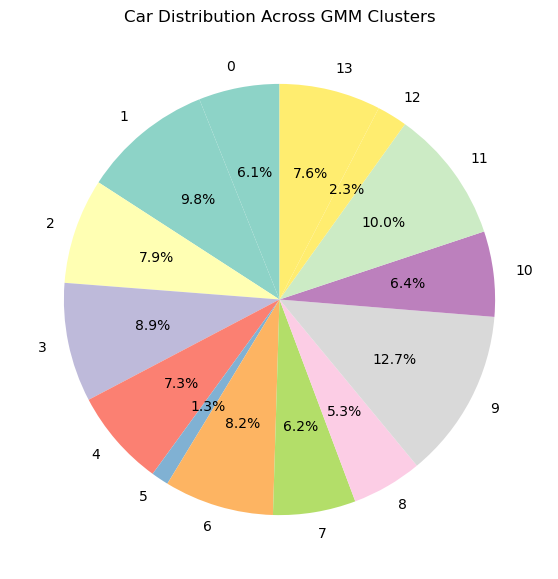


 GMM Cluster 0 - Top 5 Car Models:
company_model
acura_rl                 146
volvo_s40                 70
ford_focus                67
mercury_grand marquis     65
nissan_frontier           63
Name: count, dtype: int64


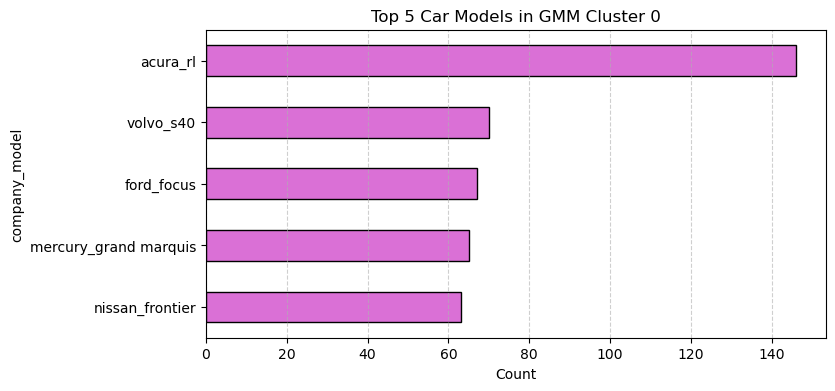


 GMM Cluster 1 - Top 5 Car Models:
company_model
chrysler_lhs       150
chrysler_300m      129
ford_explorer      124
acura_tl           102
chevrolet_prizm     94
Name: count, dtype: int64


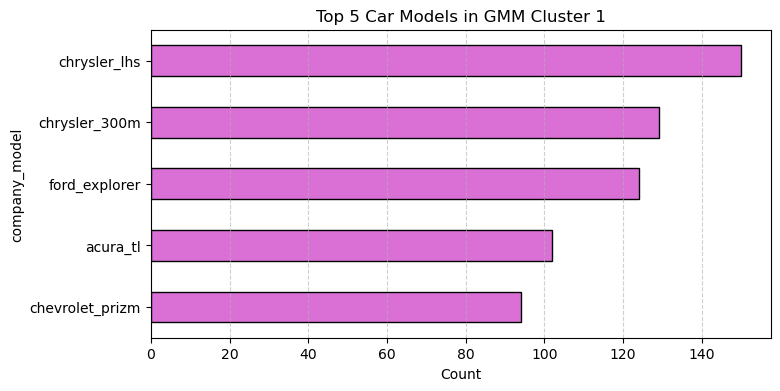


 GMM Cluster 2 - Top 5 Car Models:
company_model
volkswagen_passat     144
volkswagen_jetta      139
nissan_pathfinder      97
subaru_forester        96
chevrolet_corvette     89
Name: count, dtype: int64


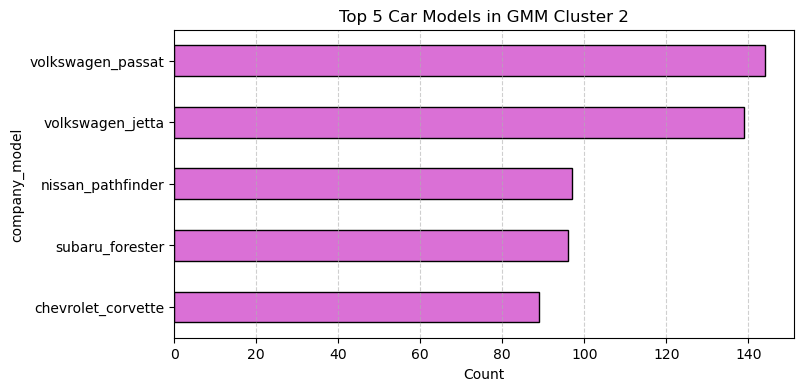


 GMM Cluster 3 - Top 5 Car Models:
company_model
chevrolet_prizm        137
lincoln_continental    122
chevrolet_cavalier      97
chevrolet_malibu        97
volvo_c70               86
Name: count, dtype: int64


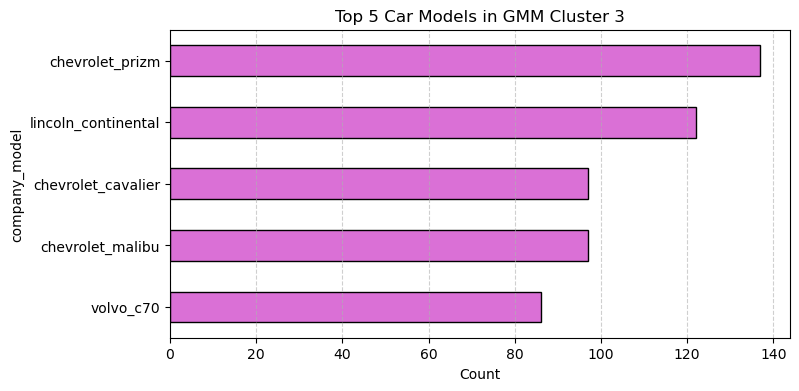


 GMM Cluster 4 - Top 5 Car Models:
company_model
pontiac_sunfire       241
oldsmobile_cutlass    194
chevrolet_metro       191
plymouth_neon         182
pontiac_grand am      167
Name: count, dtype: int64


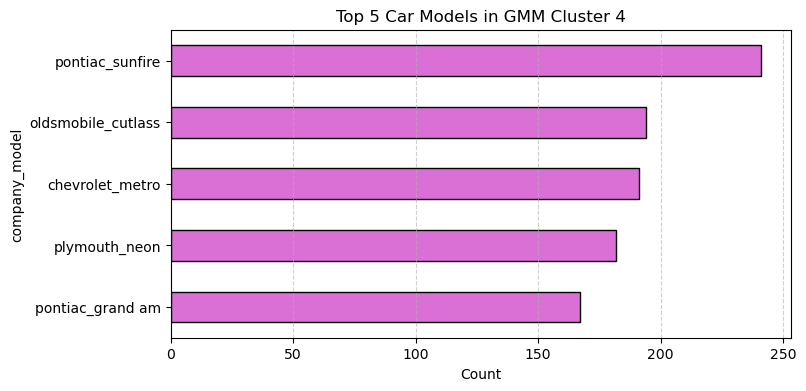


 GMM Cluster 5 - Top 5 Car Models:
company_model
dodge_viper    240
Name: count, dtype: int64


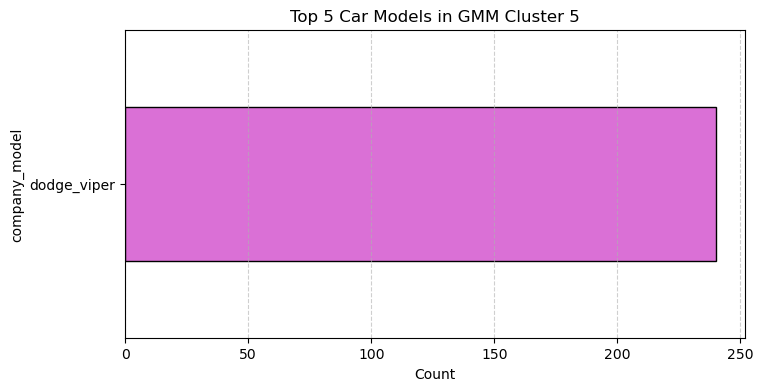


 GMM Cluster 6 - Top 5 Car Models:
company_model
oldsmobile_silhouette    153
pontiac_grand prix       147
dodge_durango            142
mercury_sable            119
cadillac_escalade        111
Name: count, dtype: int64


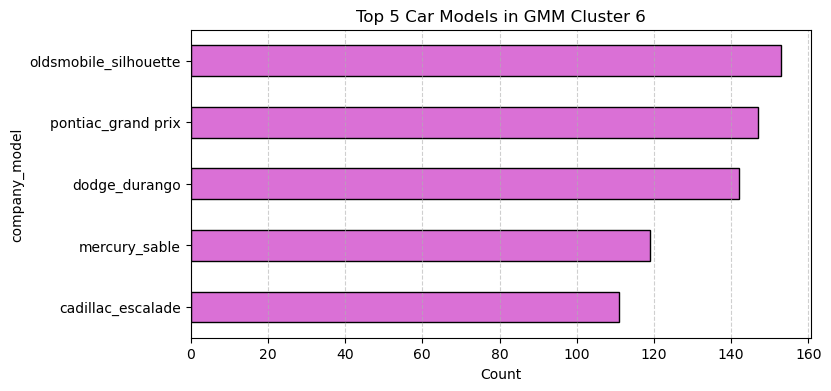


 GMM Cluster 7 - Top 5 Car Models:
company_model
mitsubishi_diamante         190
chevrolet_prizm             180
mitsubishi_montero sport    147
audi_a6                     145
chrysler_concorde           112
Name: count, dtype: int64


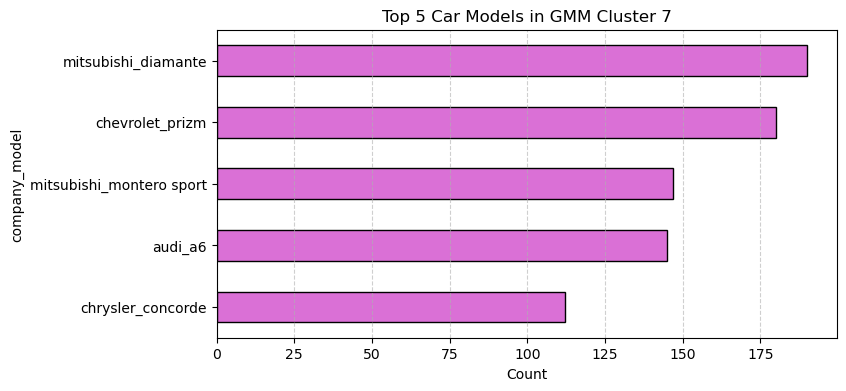


 GMM Cluster 8 - Top 5 Car Models:
company_model
oldsmobile_silhouette    258
plymouth_voyager         143
dodge_durango            120
ford_f-series            110
mercury_villager          95
Name: count, dtype: int64


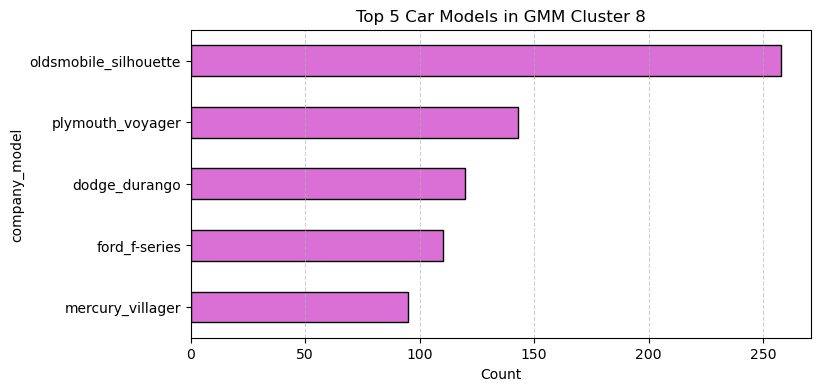


 GMM Cluster 9 - Top 5 Car Models:
company_model
volkswagen_jetta     141
volkswagen_passat    116
chrysler_300m        114
chrysler_lhs         107
ford_explorer        101
Name: count, dtype: int64


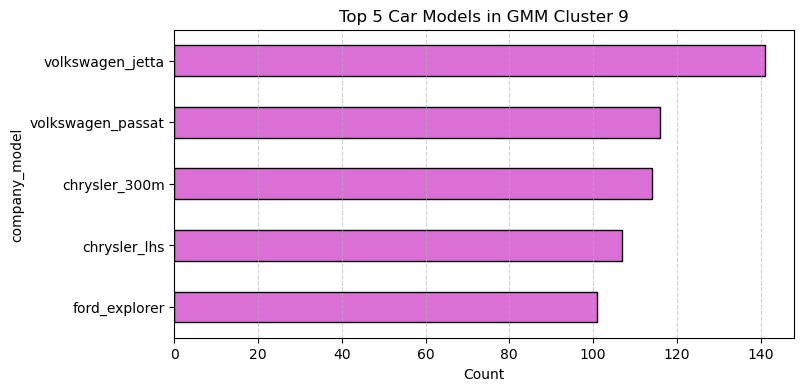


 GMM Cluster 10 - Top 5 Car Models:
company_model
lincoln_continental    84
hyundai_sonata         78
chevrolet_malibu       74
chevrolet_cavalier     73
ford_taurus            64
Name: count, dtype: int64


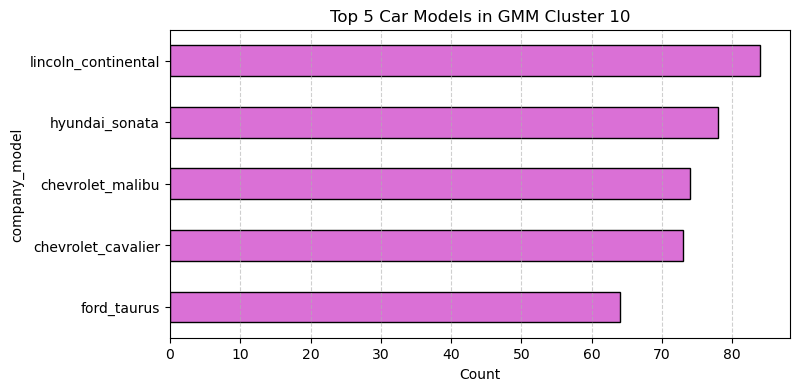


 GMM Cluster 11 - Top 5 Car Models:
company_model
mitsubishi_diamante    228
ford_expedition        215
audi_a6                184
jaguar_s-type          180
toyota_tacoma          179
Name: count, dtype: int64


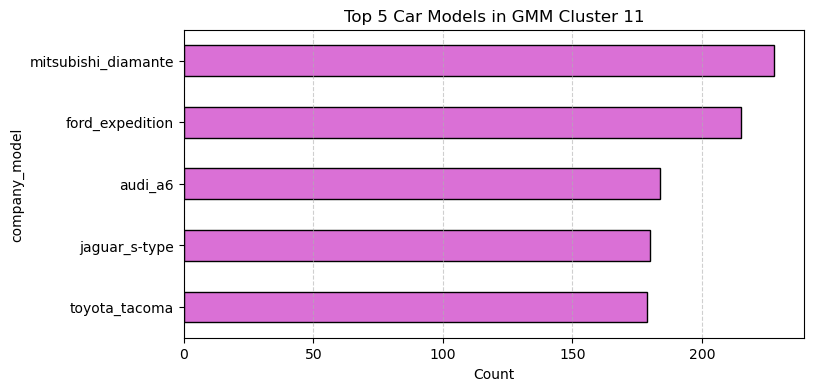


 GMM Cluster 12 - Top 5 Car Models:
company_model
chevrolet_lumina    162
lincoln_town car     82
chevrolet_metro      67
pontiac_firebird     56
ford_escort          45
Name: count, dtype: int64


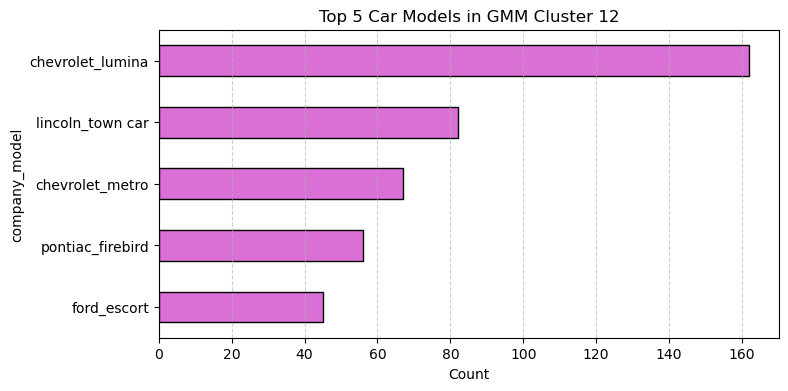


 GMM Cluster 13 - Top 5 Car Models:
company_model
acura_rl                 171
volvo_s40                109
mercury_grand marquis     98
ford_focus                79
volkswagen_passat         79
Name: count, dtype: int64


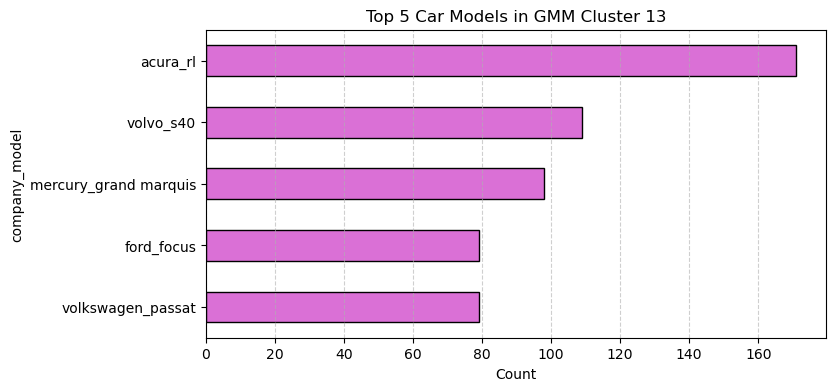

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

gmm_counts = car_full_analysis['GMM_Cluster'].value_counts().sort_index()
print("Number of Cars in Each GMM Cluster:")
print(gmm_counts)


# Bar Plot
plt.figure(figsize=(8,5))
gmm_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Cars in Each GMM Cluster')
plt.xlabel('GMM Cluster Number')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
gmm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Car Distribution Across GMM Clusters')
plt.ylabel('')
plt.show()


unique_gmm_clusters = sorted(car_full_analysis['GMM_Cluster'].unique())

for cluster_num in unique_gmm_clusters:
    print(f"\n GMM Cluster {cluster_num} - Top 5 Car Models:")
    top_models = car_full_analysis[car_full_analysis['GMM_Cluster'] == cluster_num]['company_model'].value_counts().head(5)
    print(top_models)

    # Visualize Top Models
    plt.figure(figsize=(8,4))
    top_models.plot(kind='barh', color='orchid', edgecolor='black')
    plt.title(f'Top 5 Car Models in GMM Cluster {cluster_num}')
    plt.xlabel('Count')
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


In [209]:
# export models,encoder,scaler and cluster information

In [210]:
# export the models 

import joblib

# Save the trained models to files
joblib.dump(best_knn_model, 'knn_model.pkl')
joblib.dump(rfmodel, 'rf_model.pkl')
joblib.dump(lrmodel, 'logistic_regression_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(agglo,'agglo_model.pkl')
joblib.dump(gmm,'gmm_model.pkl')


['gmm_model.pkl']

In [211]:
# export the dataframe as it contains cluster information

car_full_analysis.to_csv('clusteringanddata.csv')

In [212]:
# Save the scaler to a file
joblib.dump(scaler_m, 'scaler.pkl')

# dump encoders

import pickle

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [213]:
# Get raw file(with these columns) for documentation purpose

In [214]:
main_cols = [
        'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year',
        'Body_type', 'number_of_seats', 'wheelbase_mm', 'full_weight_kg',
        'max_trunk_capacity_l', 'injection_type', 'engine_type',
        'valves_per_cylinder', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm',
        'engine_hp_rpm', 'drive_wheels', 'turning_circle_m','transmission','fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade',
        'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension',
        'avg_rating', 'max_rating', 'min_rating', 'popularity_score',
        'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder',
        'power_to_weight', 'volume_mm3','company_model'
    ]

In [215]:
car_raw =car_raw[main_cols].copy()

In [216]:
car_raw.to_csv('car_rawww.csv')